In [1]:
import os
import sys
from pathlib import Path
from pprint import pprint
import pickle
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

from interpretable_tsne.tsne import TSNE


##  Figure 1

In [2]:
_pallete = sns.color_palette("tab10", 7)

cmap2 = {}
cmap2['random'] = 'black'
cmap2['top_attr'] = _pallete[3]
cmap2['top_attr_unif_class'] = cmap2['top_attr']
cmap2['top_attr_unif'] = cmap2['top_attr']
cmap2['feat_size'] = _pallete[0]
cmap2['top_feat'] = cmap2['feat_size']
cmap2['top_feat_class'] = cmap2['feat_size']
cmap2['top_attr_ge_0'] = _pallete[5]
cmap2['attr_feat'] = _pallete[4]
cmap2['top_attr_times_feat_unif_class'] = cmap2['attr_feat']
cmap2['top_attr_times_feat_unif'] = cmap2['attr_feat']
cmap2['top_ls'] = _pallete[2]
cmap2['top_ls_p_matrix'] = cmap2['top_ls']
cmap2['top_ls_q_matrix'] = cmap2['top_ls']
cmap2['top_ls_class'] = cmap2['top_ls']
cmap2['top_ls_class_p_matrix'] = cmap2['top_ls']
cmap2['top_ls_class_q_matrix'] = cmap2['top_ls']
cmap2['top_fs'] = _pallete[6]
cmap2['top_pc'] = _pallete[1]

In [3]:
#from make_figures import make_boxplots
def make_boxplots(df, levels, level_names, fig_path, to_plot):
    
    cmap = {}
    colors = []
    for level in levels:
        cmap[level] = cmap2[level]
        colors.append(cmap2[level])

    fig, ax = plt.subplots(figsize=(20, 10))

    legend_elements = [Patch(facecolor=color, edgecolor='black', label='Color Patch') for color in colors]

    # Create the figure
    _ = sns.boxplot(x='% Corrupted', y=to_plot, data=df, hue='Index', ax=ax, palette=cmap, dodge=True, hue_order=levels)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    _ = plt.legend(handles=legend_elements, prop={'size': 20}, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,
                   labels=level_names,
                   framealpha=1)
    fig.savefig(fig_path, dpi=600, bbox_inches='tight')
    
def make_lineplots(df, levels, level_names, fig_path, to_plot):

    cmap = {}
    colors = []
    for level in levels:
        cmap[level] = cmap2[level]
        colors.append(cmap2[level])

    fig, ax = plt.subplots(figsize=(20, 10))

    legend_elements = [Patch(facecolor=color, edgecolor='black', label='Color Patch') for color in colors]

    # Create the figure
    _ = sns.lineplot(x='% Corrupted', y=to_plot, data=df, hue='Index', ax=ax, palette=cmap, hue_order=levels, err_style="bars")
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    _ = plt.legend(handles=legend_elements, prop={'size': 20}, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,
                   labels=level_names,
                   framealpha=1)
    fig.savefig(fig_path, dpi=600, bbox_inches='tight')

In [4]:
def plot_graphs(level, method, grad_style):
    if level == 'class':
        levels_index=['random', 'top_ls_class_p_matrix', 'top_ls_class_q_matrix', 'top_attr_unif_class', 'top_feat_class', 'top_attr_times_feat_unif_class']
        level_names=['Random', 'Top Laplace Score Per Class (using P)', 'Top Laplace Score Per Class (using Q)', 'Top Attribution Per Class', 'Top Feature Value Per Class', 'Top Attribution $\cdot$ Feature Value Per Class']
        rseeds = range(30, 40)
        lname = level
    elif level == 'global':
        levels_index=['random', 'top_fs', 'top_pc', 'top_ls_p_matrix', 'top_ls_q_matrix', 'top_feat', 'top_attr_unif', 'top_attr_times_feat_unif']
        level_names=['Random', 'Top Fisher Score', 'Top PC', 'Top Laplace Score (Using P)', 'Top Laplace Score (Using Q)', 'Top Feature Value', 'Attribution', 'Attribution $\cdot$ Feature Value'] 
        rseeds = range(30, 40)
        lname = level
    elif level == 'individual':
        levels_index=['random', 'top_attr_ge_0', 'top_attr', 'feat_size', 'attr_feat']
        level_names=['Random', 'Attribution $>0$', 'Attribution', 'Feature Value', 'Attribution $\cdot$ Feature Value']
        rseeds = range(20, 30)
        lname = 'indv'
    df = pd.read_csv('../results/{}_feats_method={}_grad_style={}/attr_exp_results_{}_feats_full.csv'.format(lname, method, grad_style, level), index_col=0)
    os.makedirs('../figures/{}_feats_method={}_grad_style={}'.format(lname, method, grad_style),
                exist_ok=True)
    make_boxplots(df,
                  levels=levels_index,
                  level_names=level_names,
                  fig_path='../figures/{}_feats_method={}_grad_style={}/{}_correlation.png'.format(lname, method, grad_style, level), 
                  to_plot='Correlation')
    make_lineplots(df,
                  levels=levels_index, 
                  level_names=level_names, 
                  fig_path='../figures/{}_feats_method={}_grad_style={}/{}_knn.png'.format(lname, method, grad_style, level), 
                  to_plot='knn_preservation')
    make_boxplots(df,
                  levels=levels_index,
                  level_names=level_names,
                  fig_path='../figures/{}_feats_method={}_grad_style={}/{}_ari.png'.format(lname, method, grad_style, level), 
                  to_plot='ari')

## Using Mean and Remove Feature Corruption

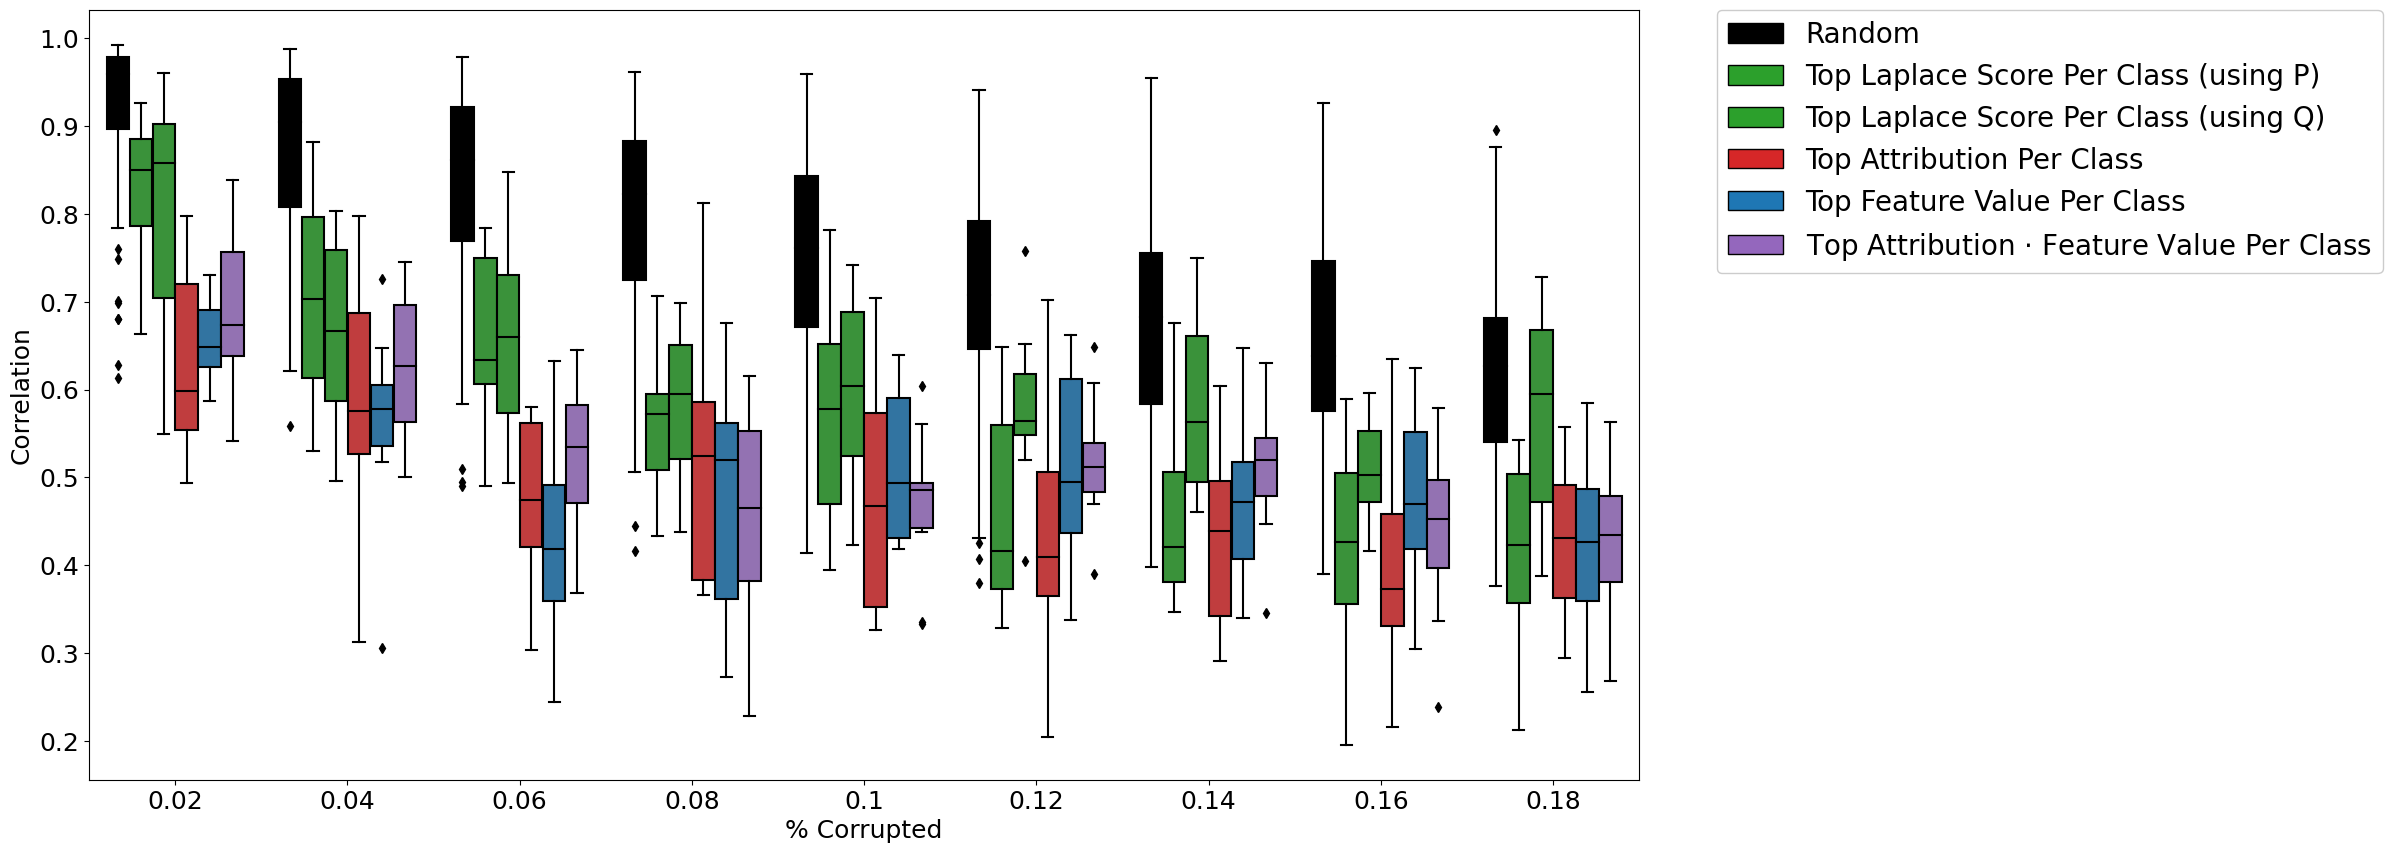

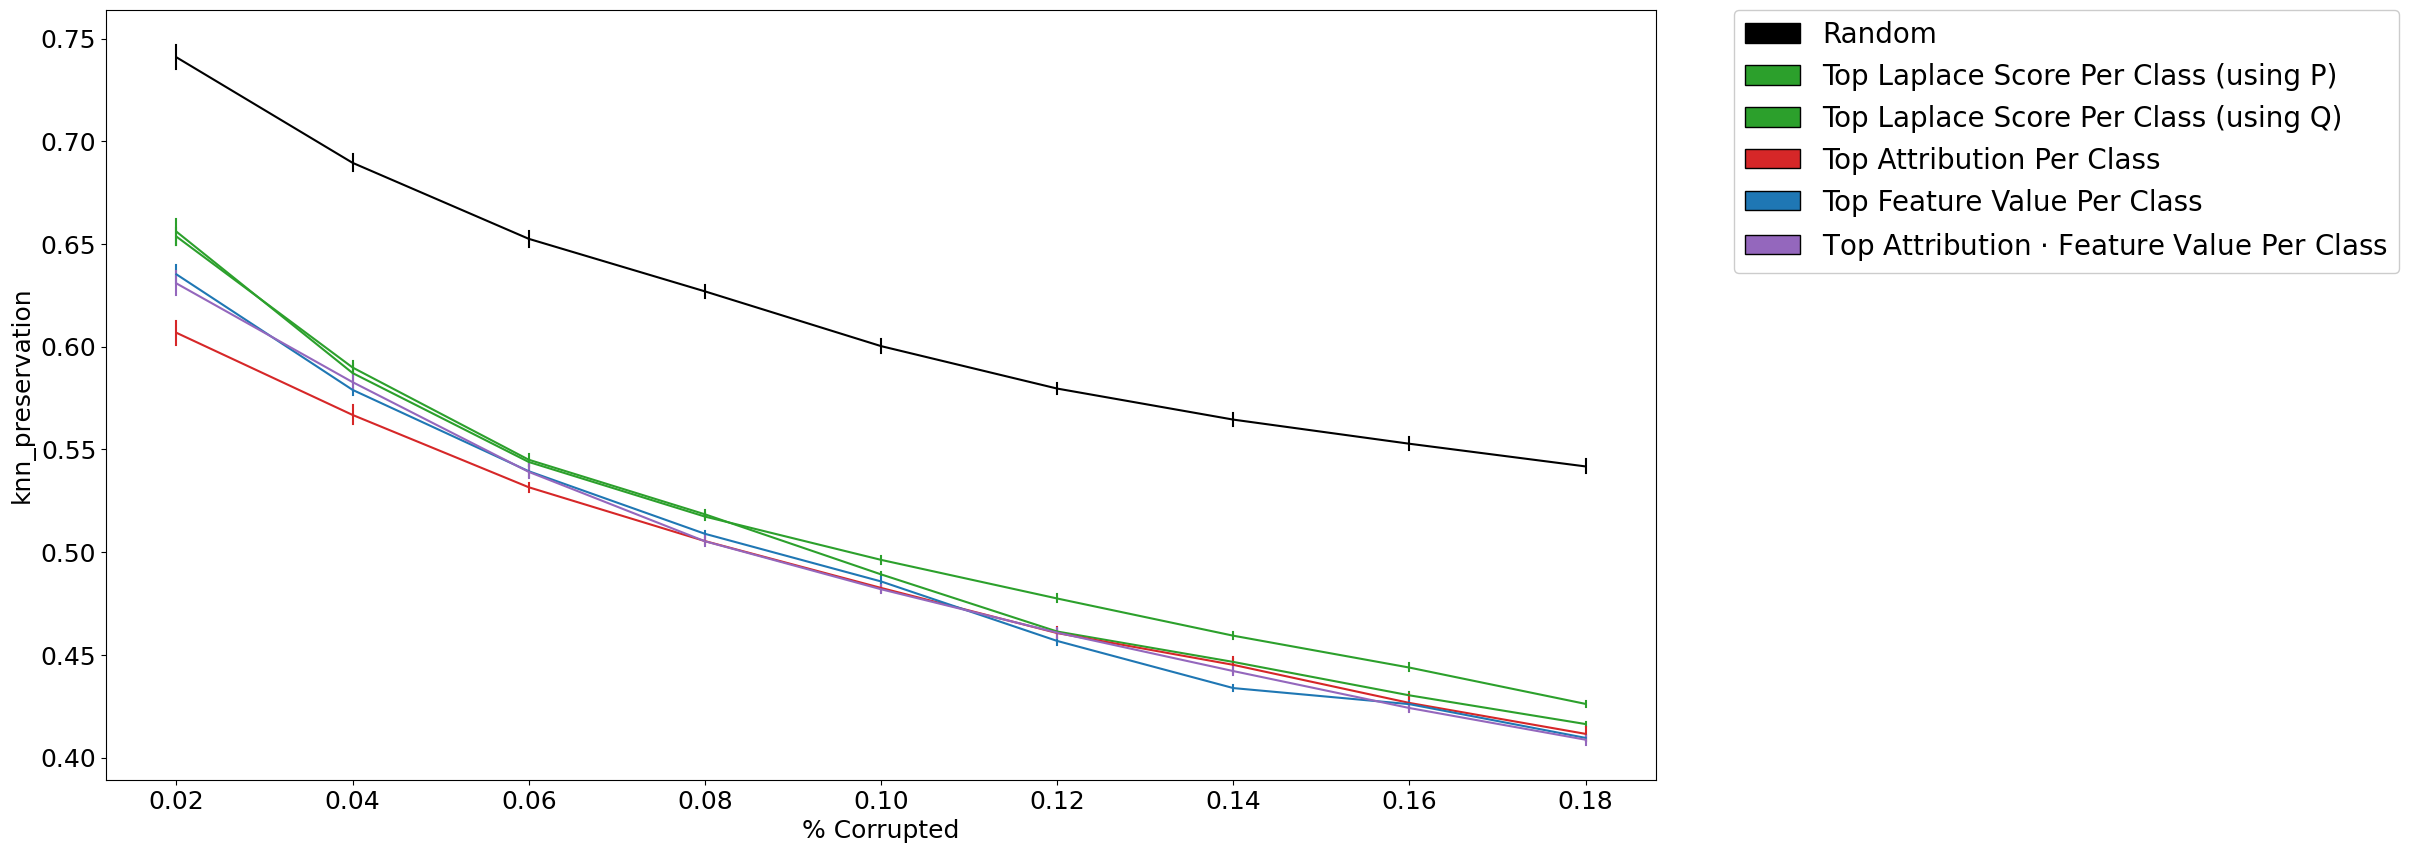

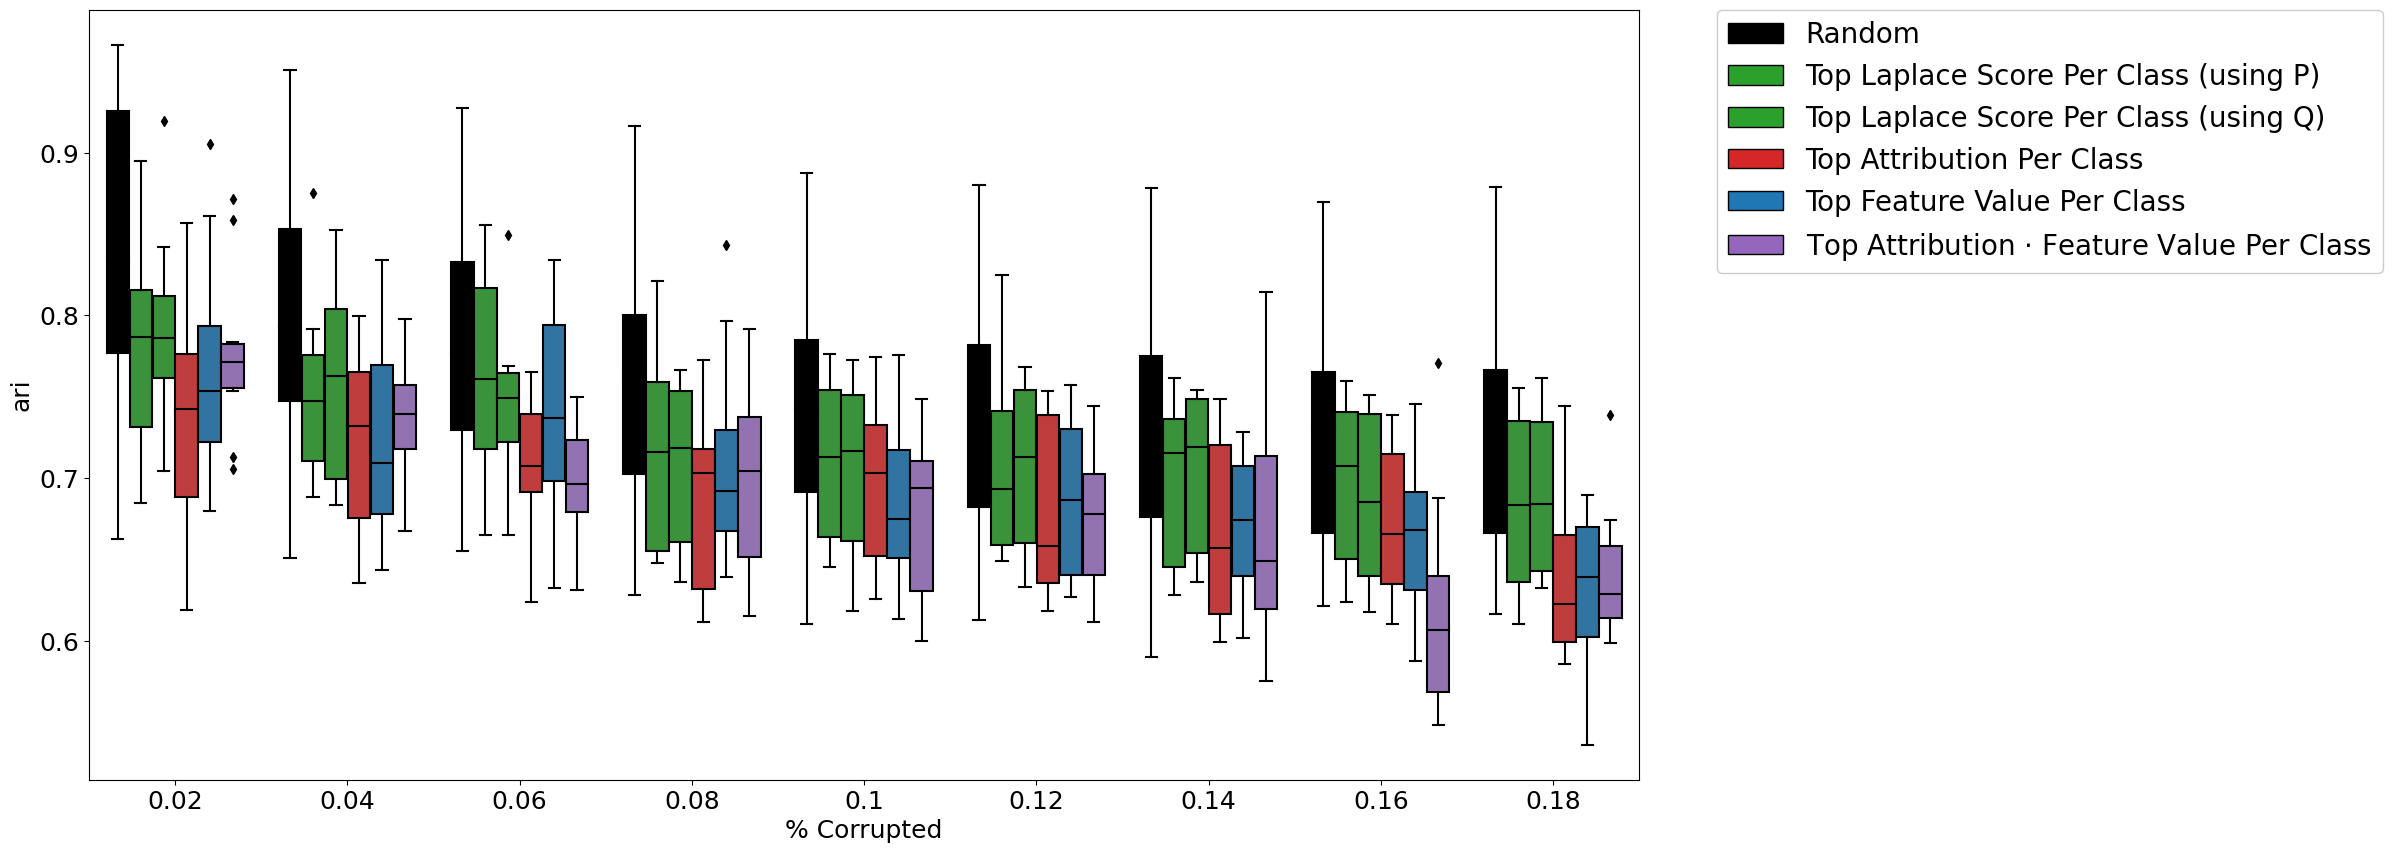

In [5]:
plot_graphs('class', 'mean', 'grad_norm')

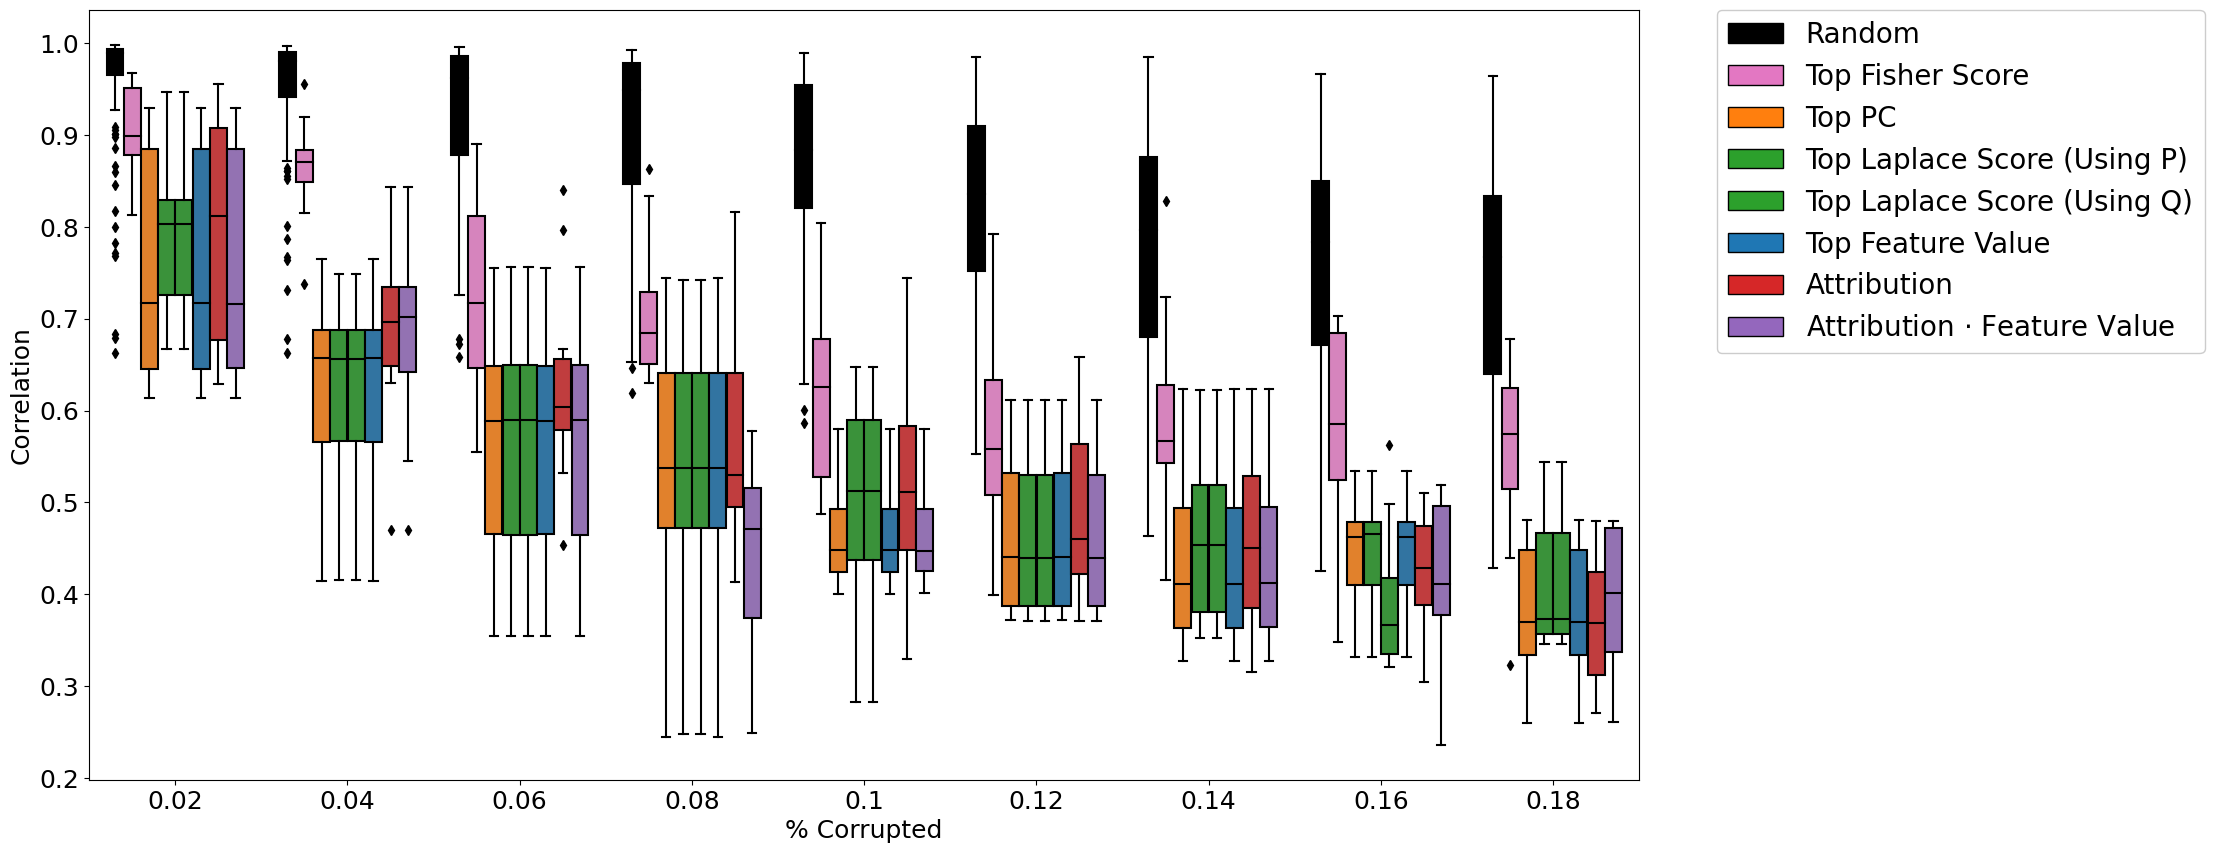

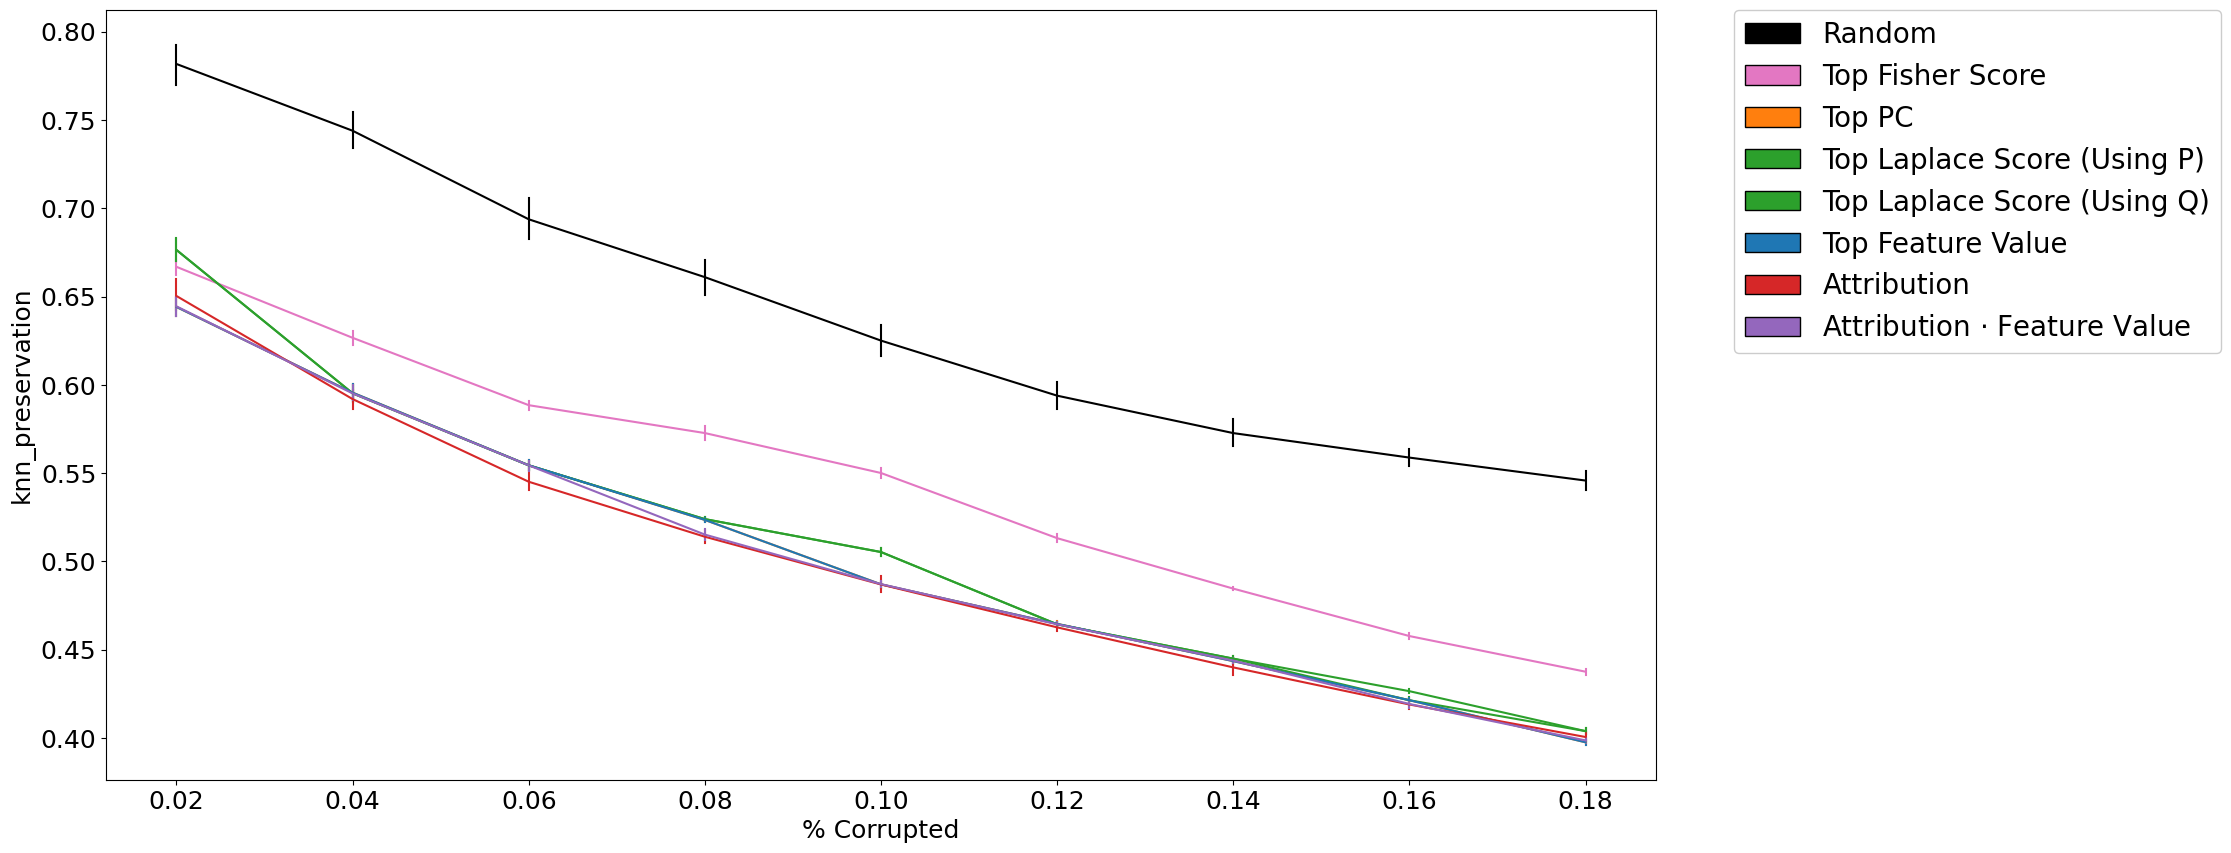

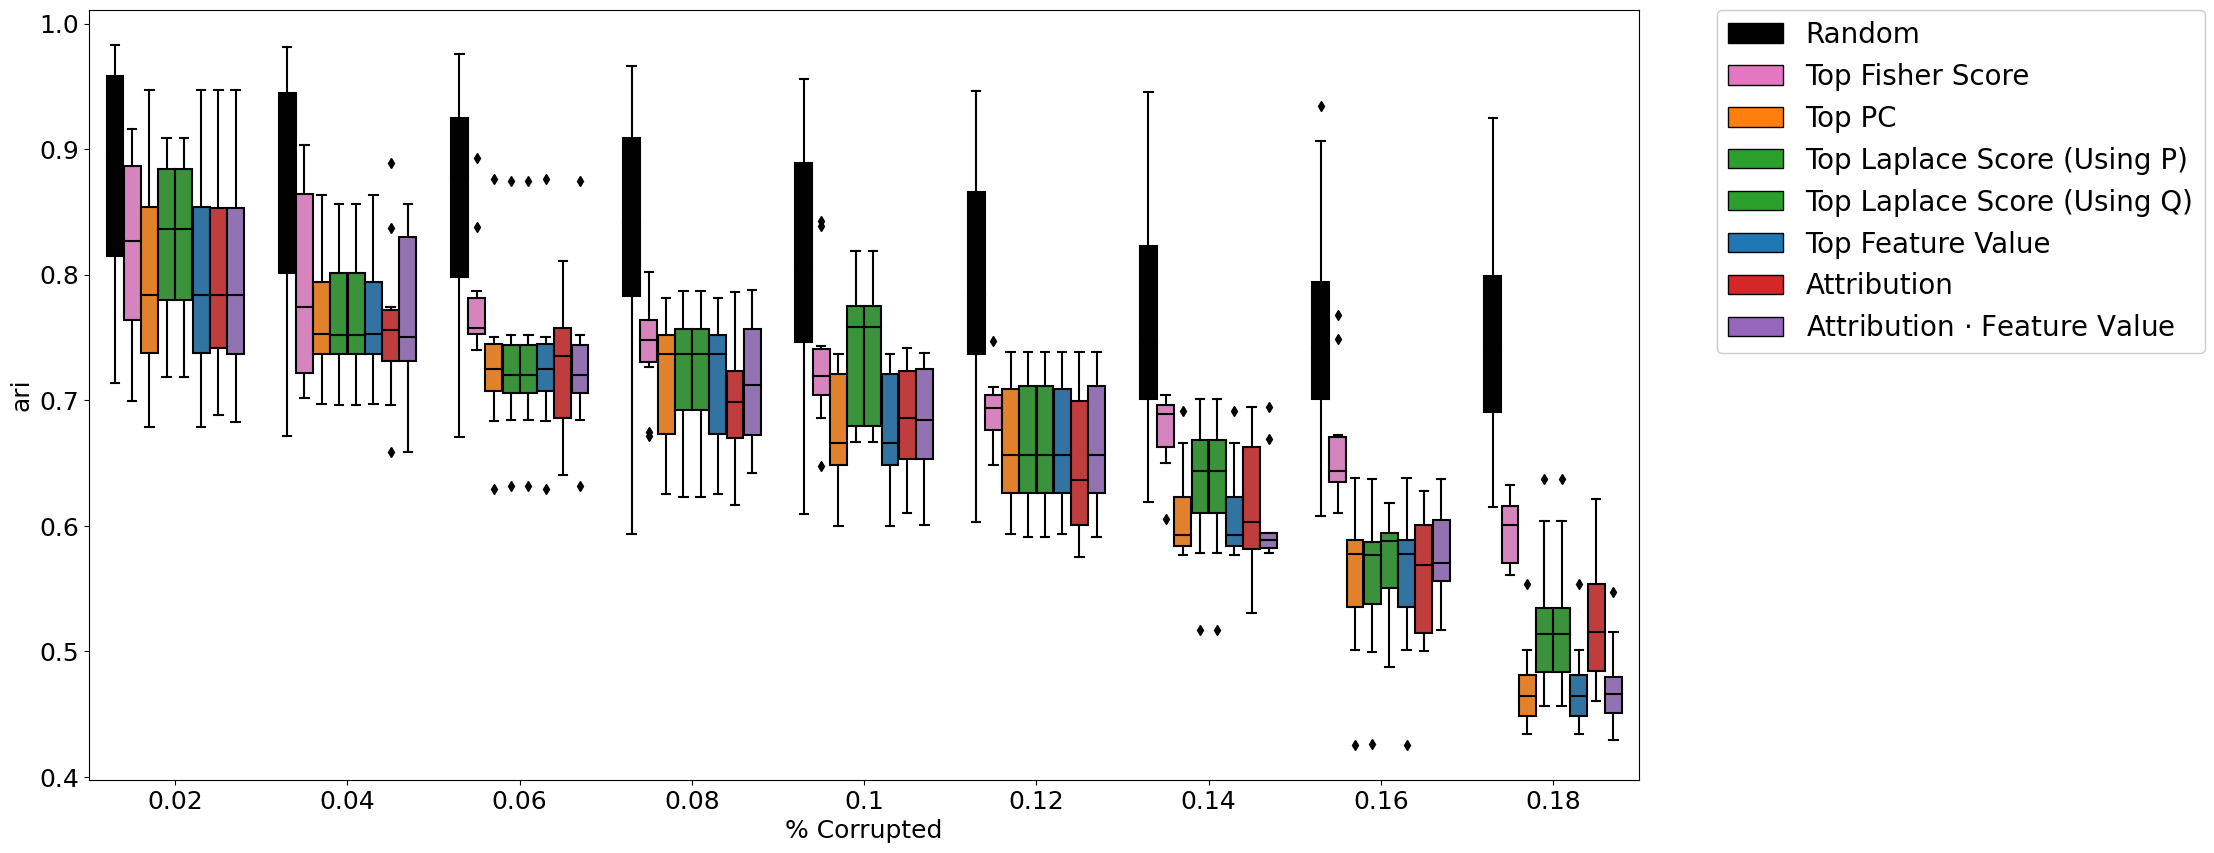

In [6]:
plot_graphs('global', 'remove', 'grad_norm')

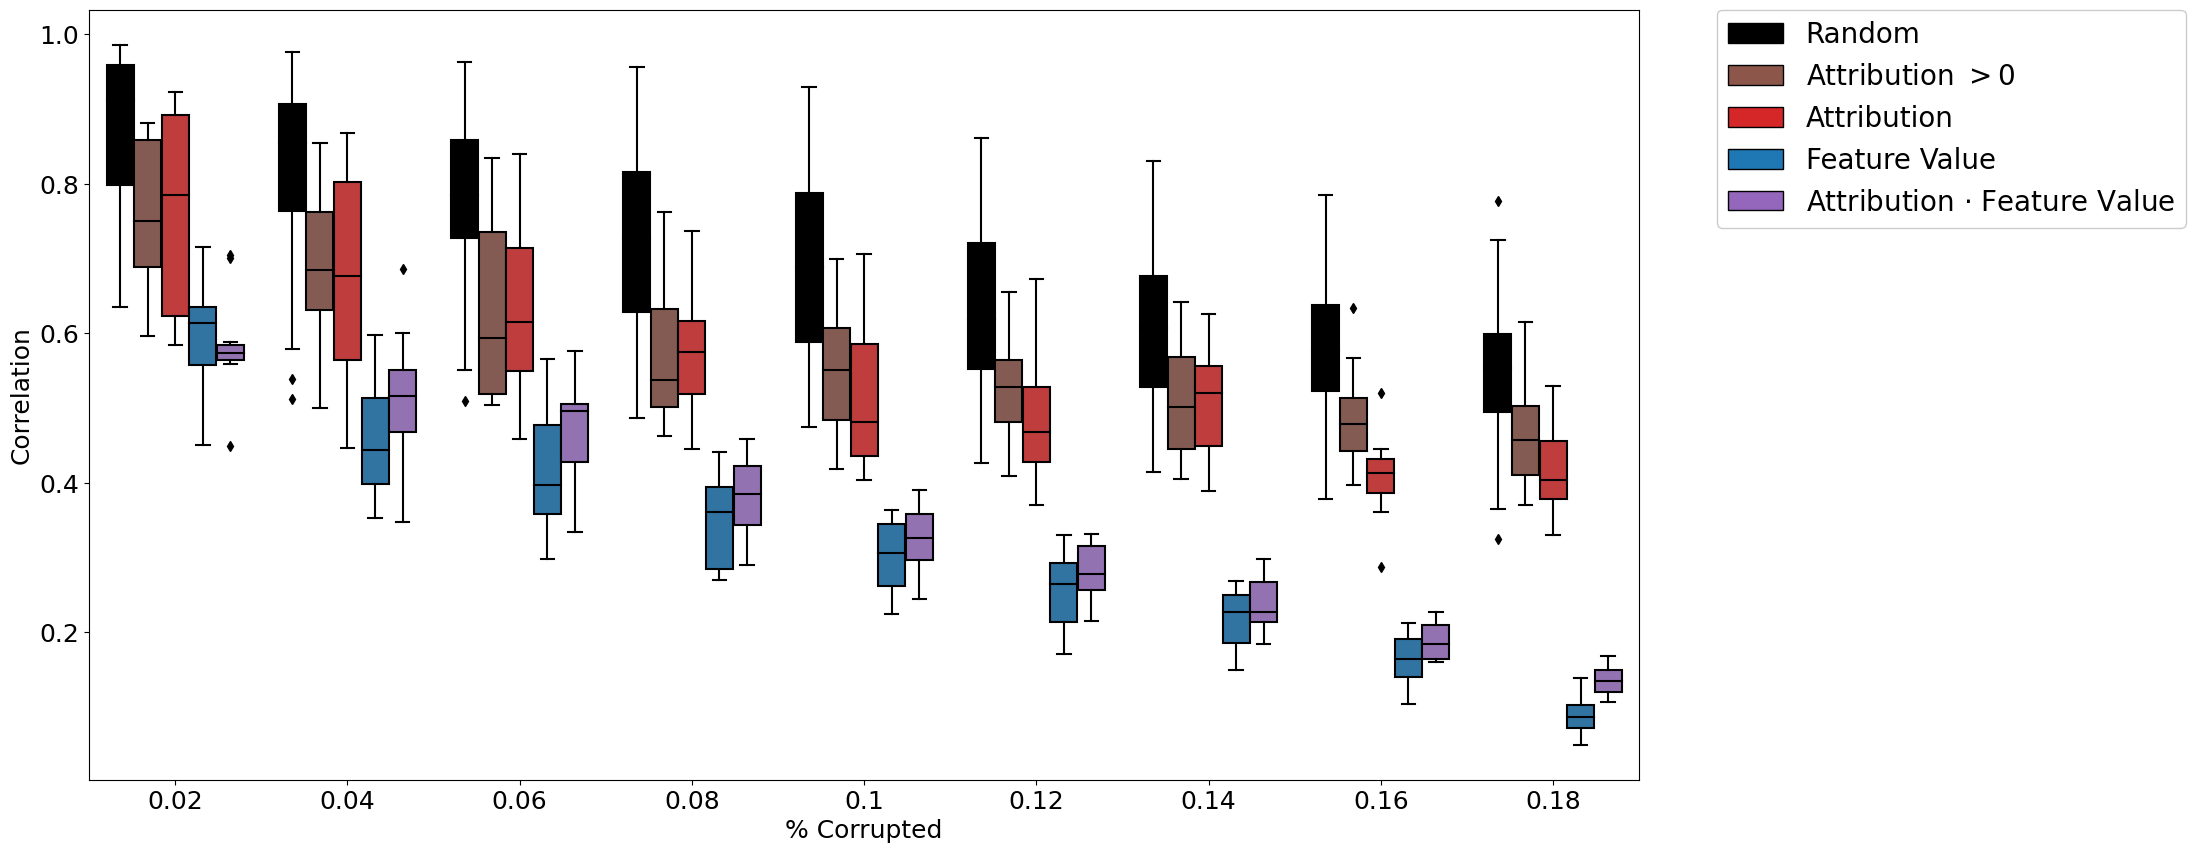

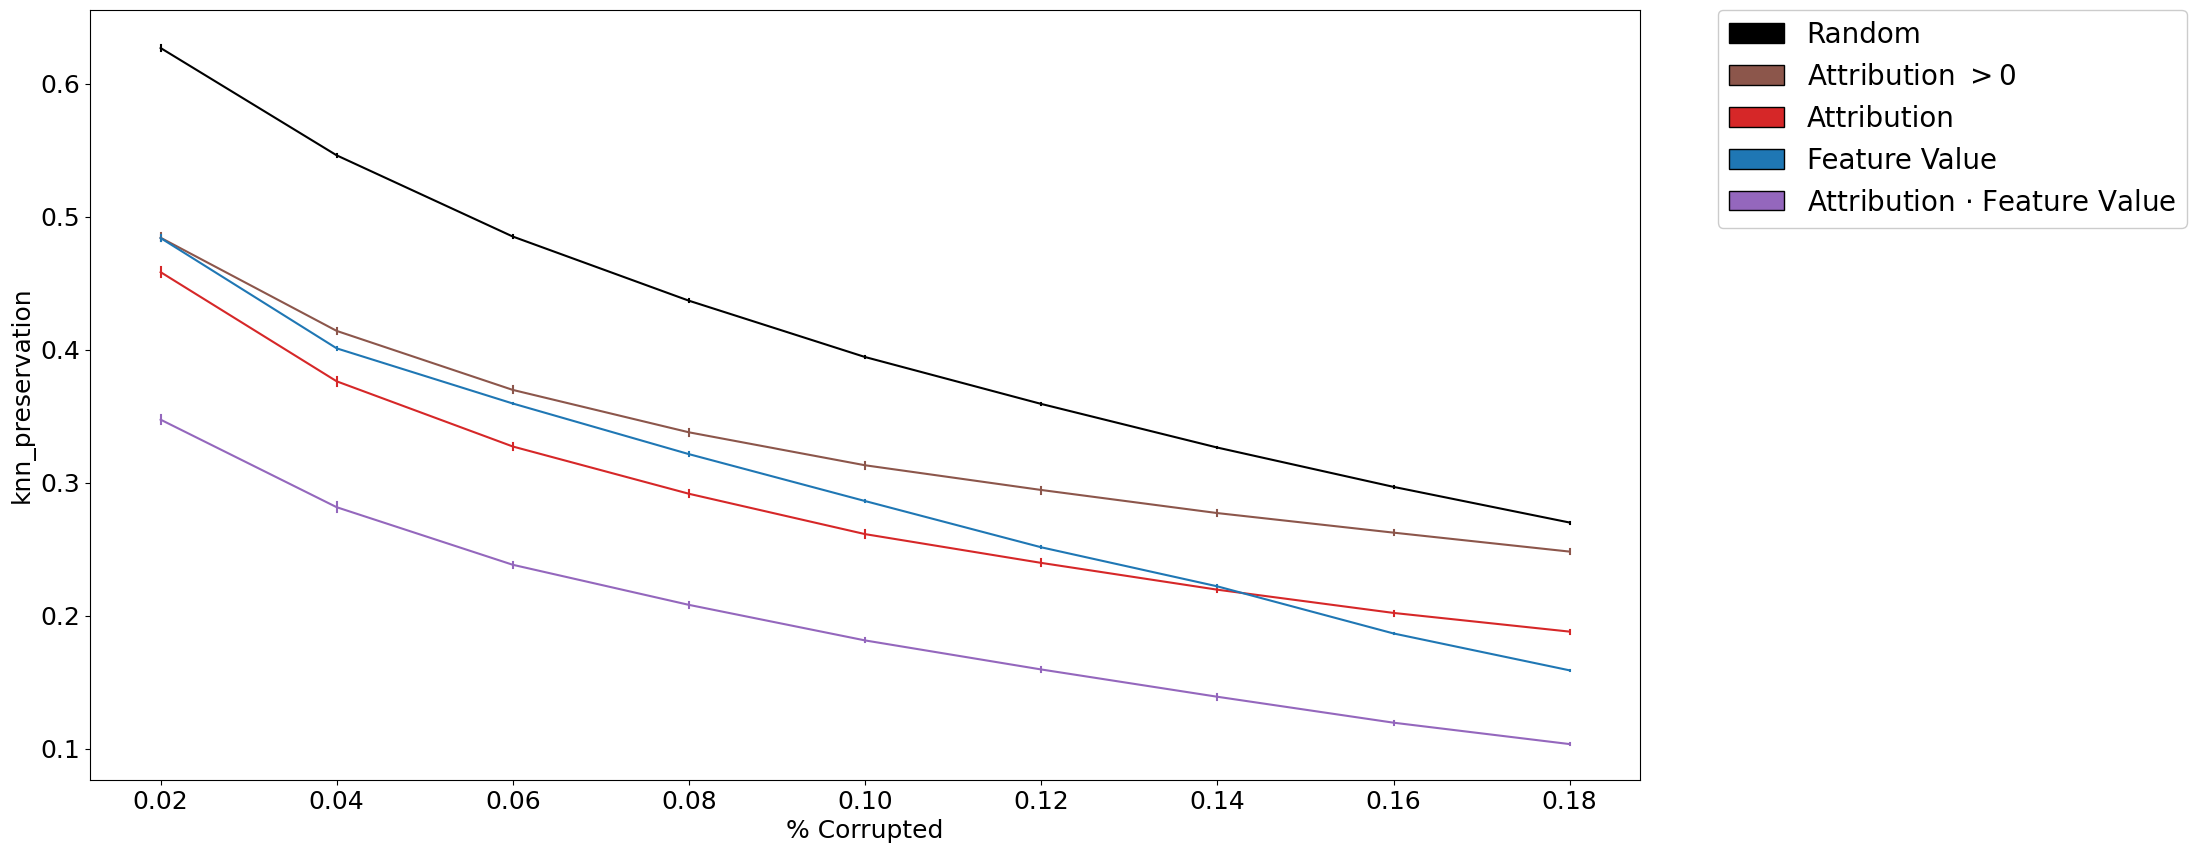

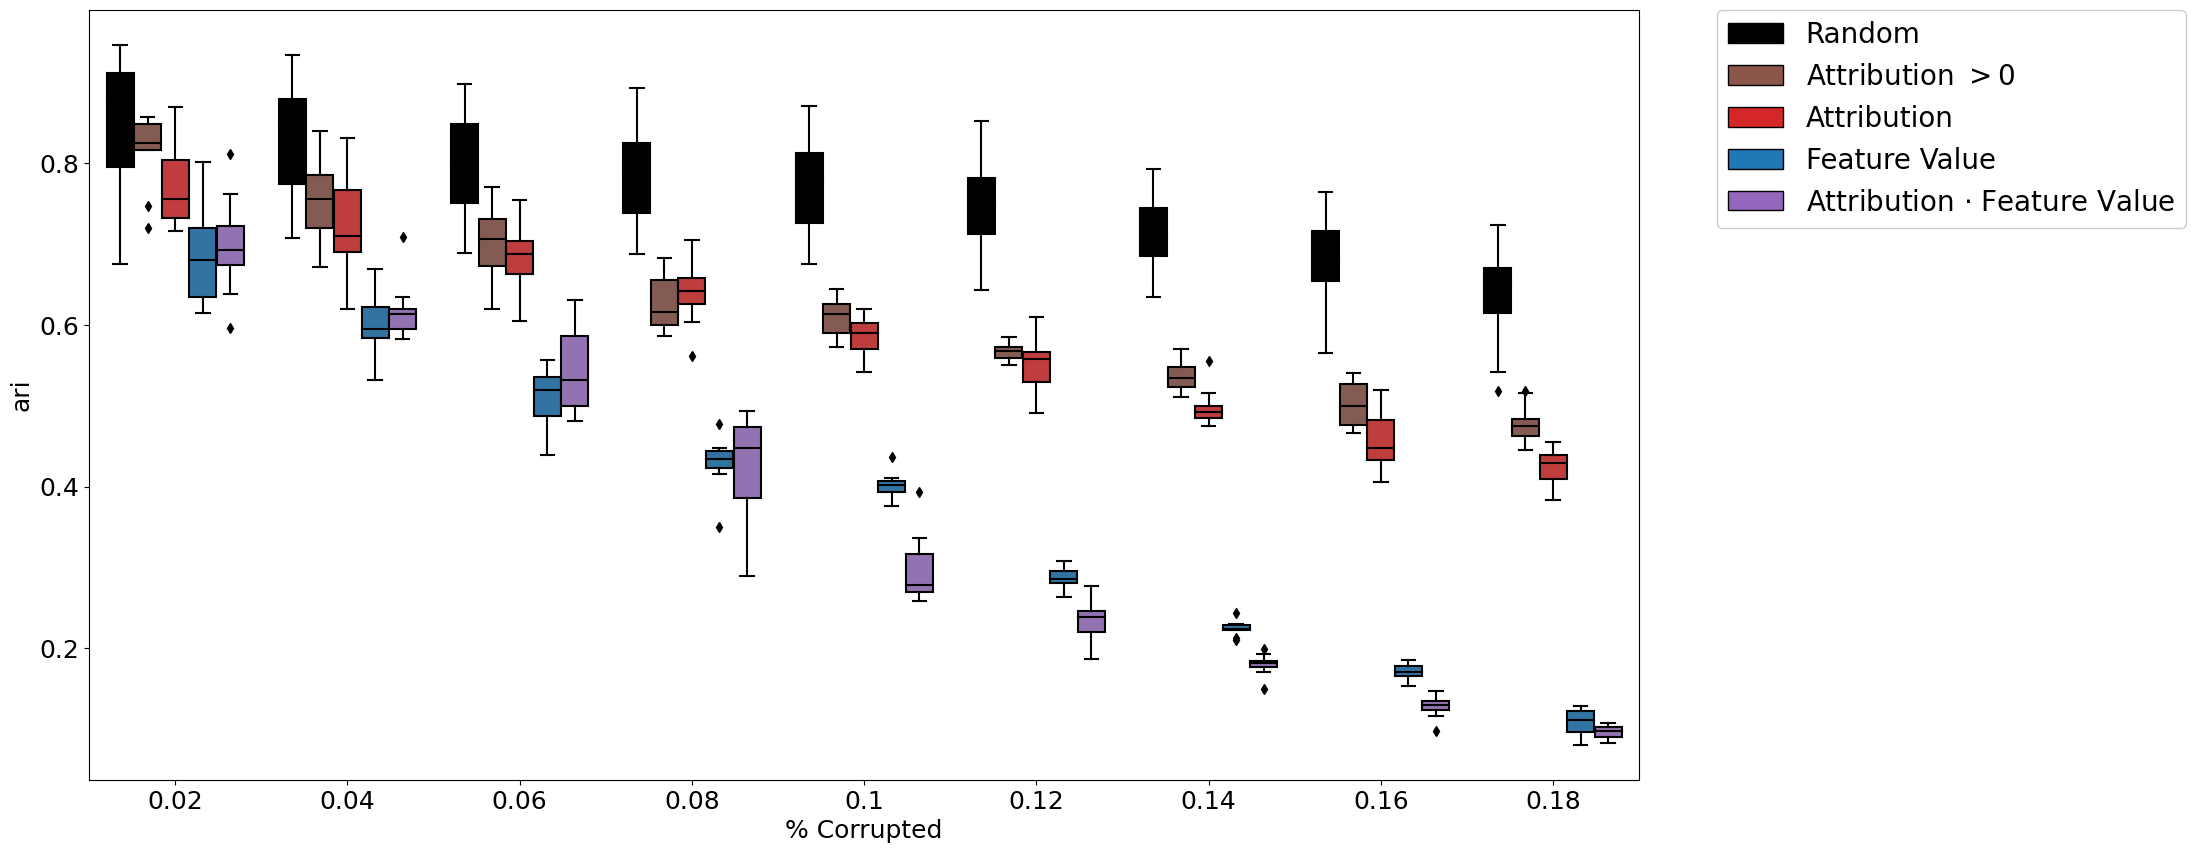

In [7]:
plot_graphs('individual', 'mean', 'grad_norm')

## Using Permutation Corruption

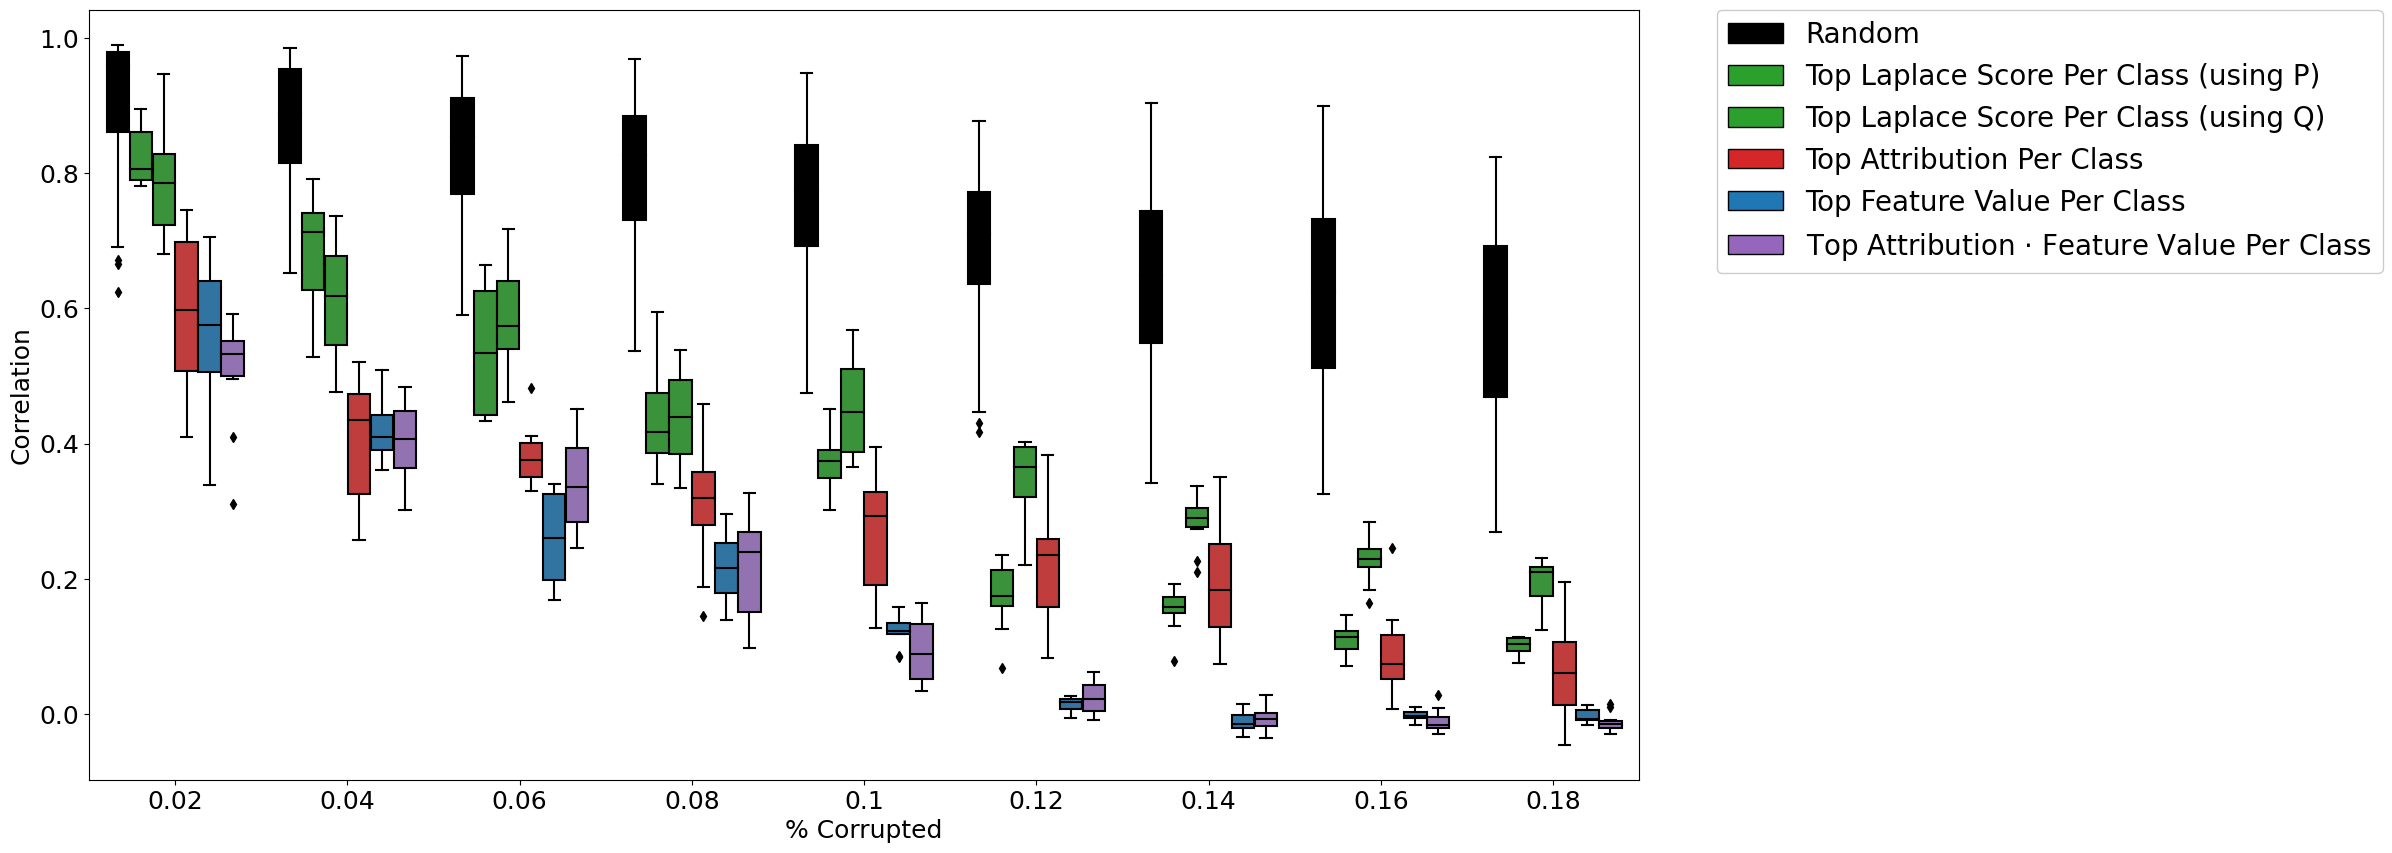

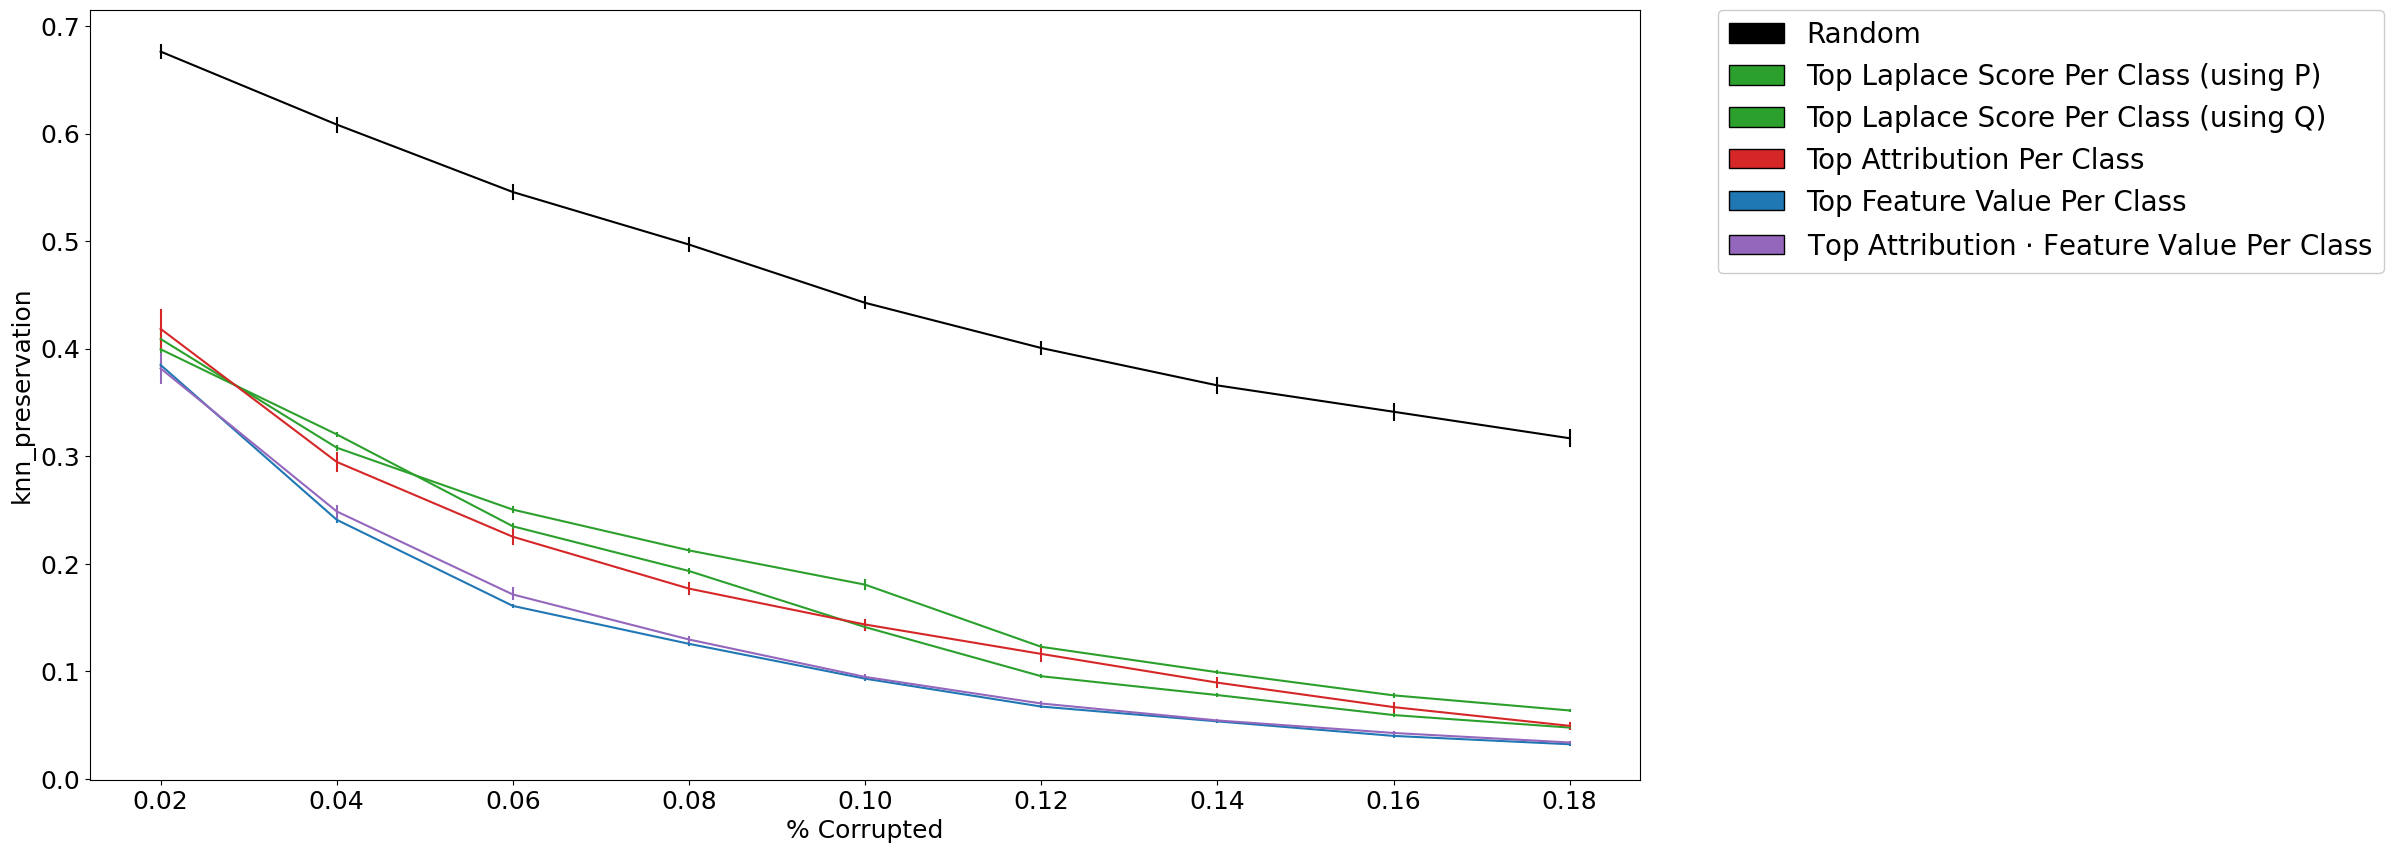

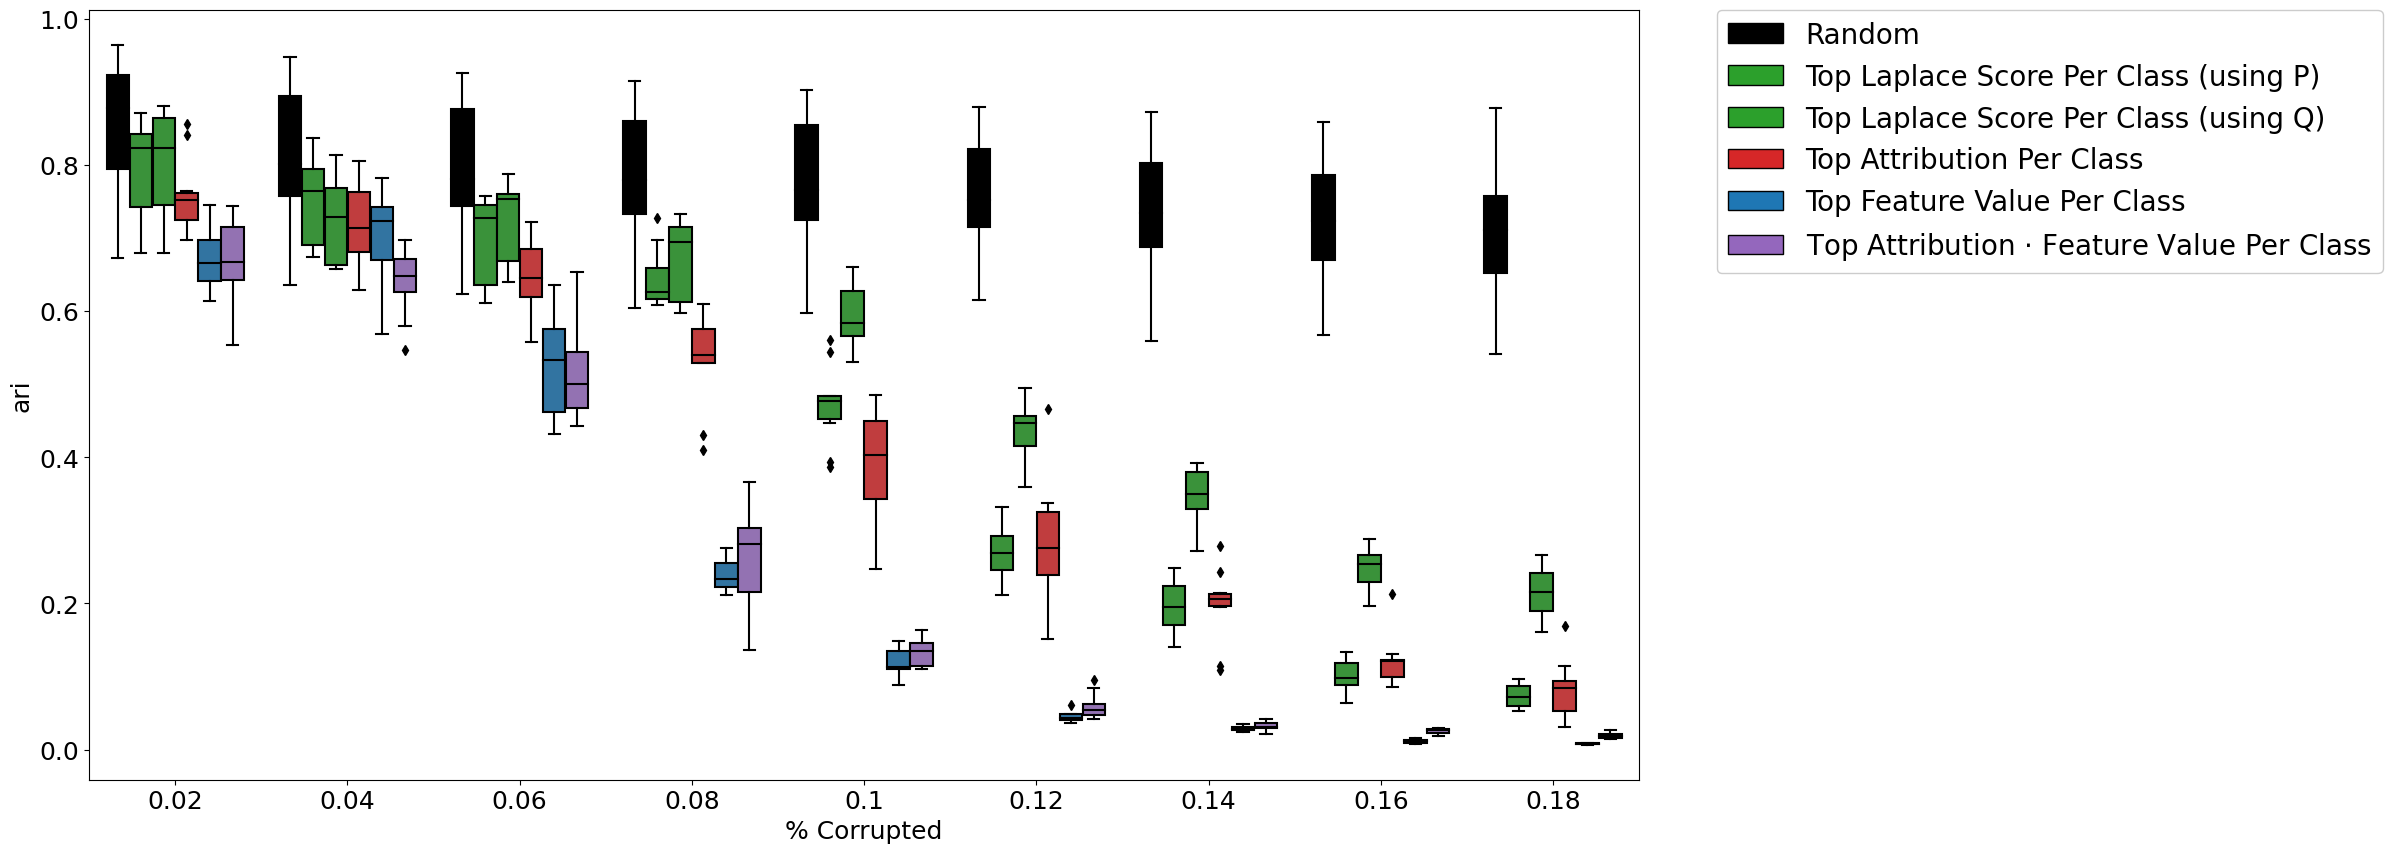

In [8]:
plot_graphs('class', 'permute', 'grad_norm')

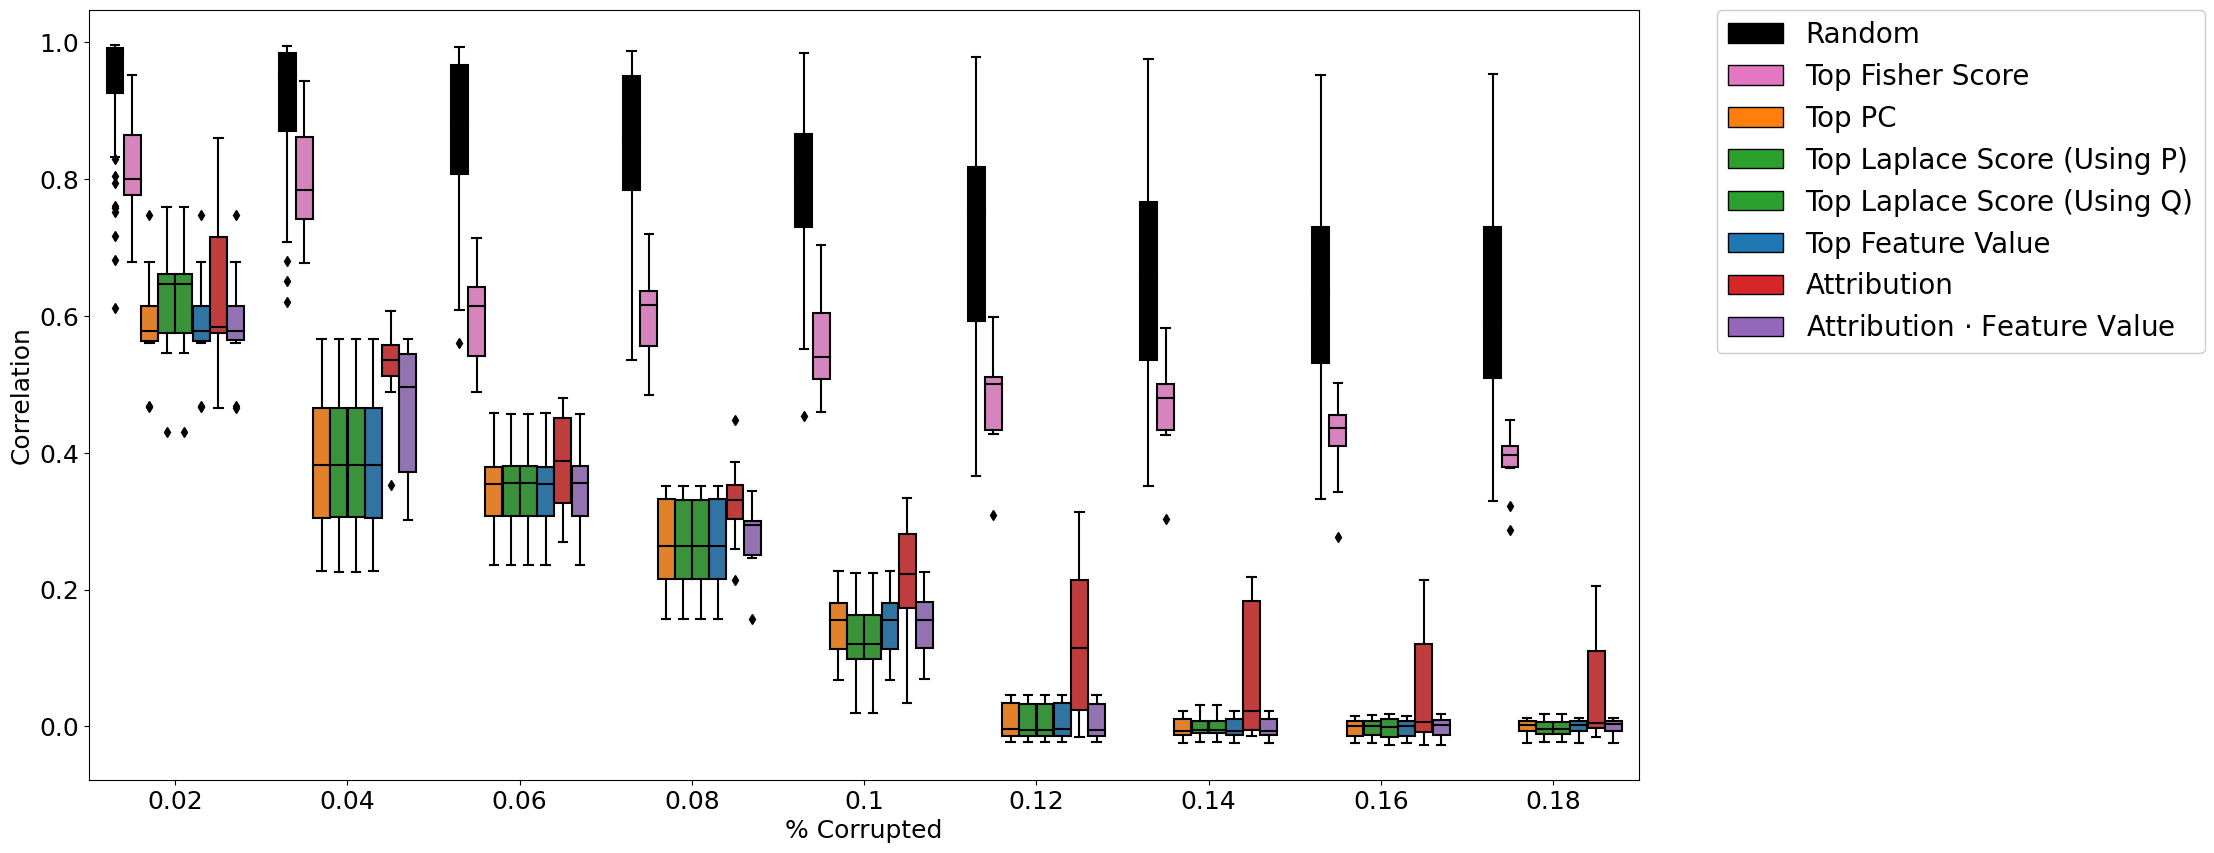

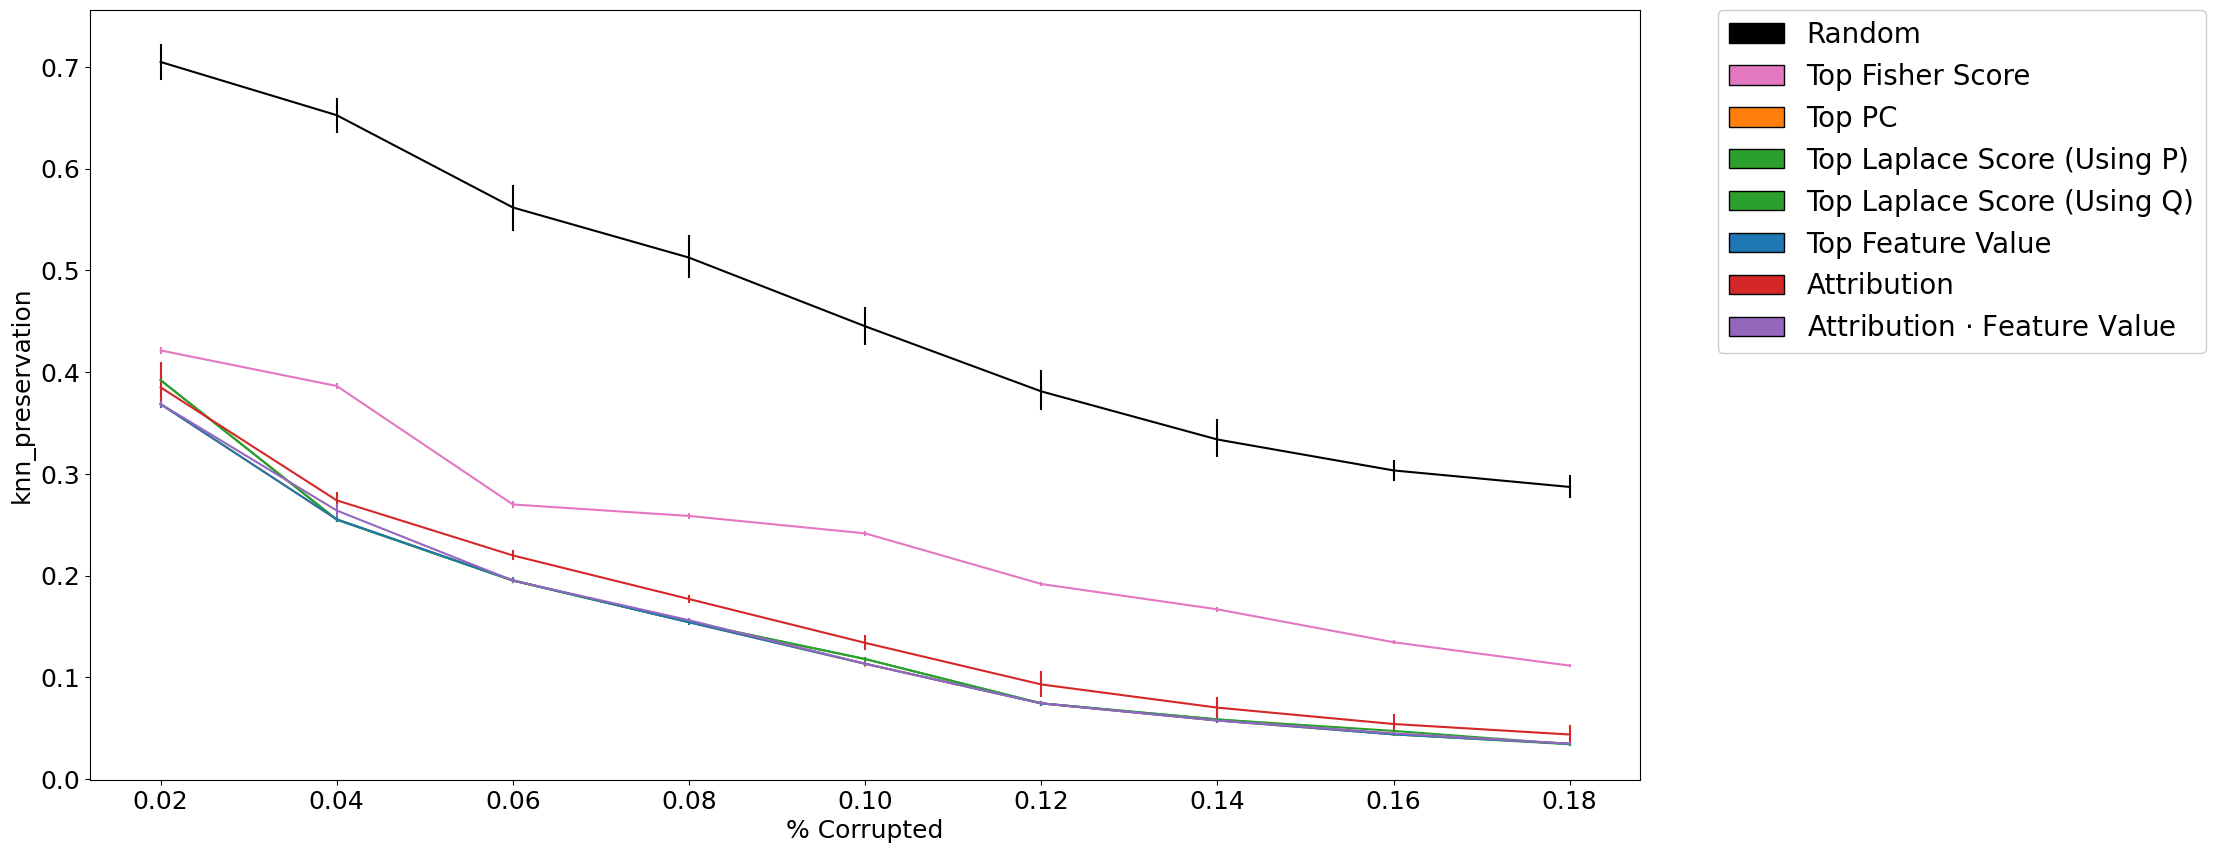

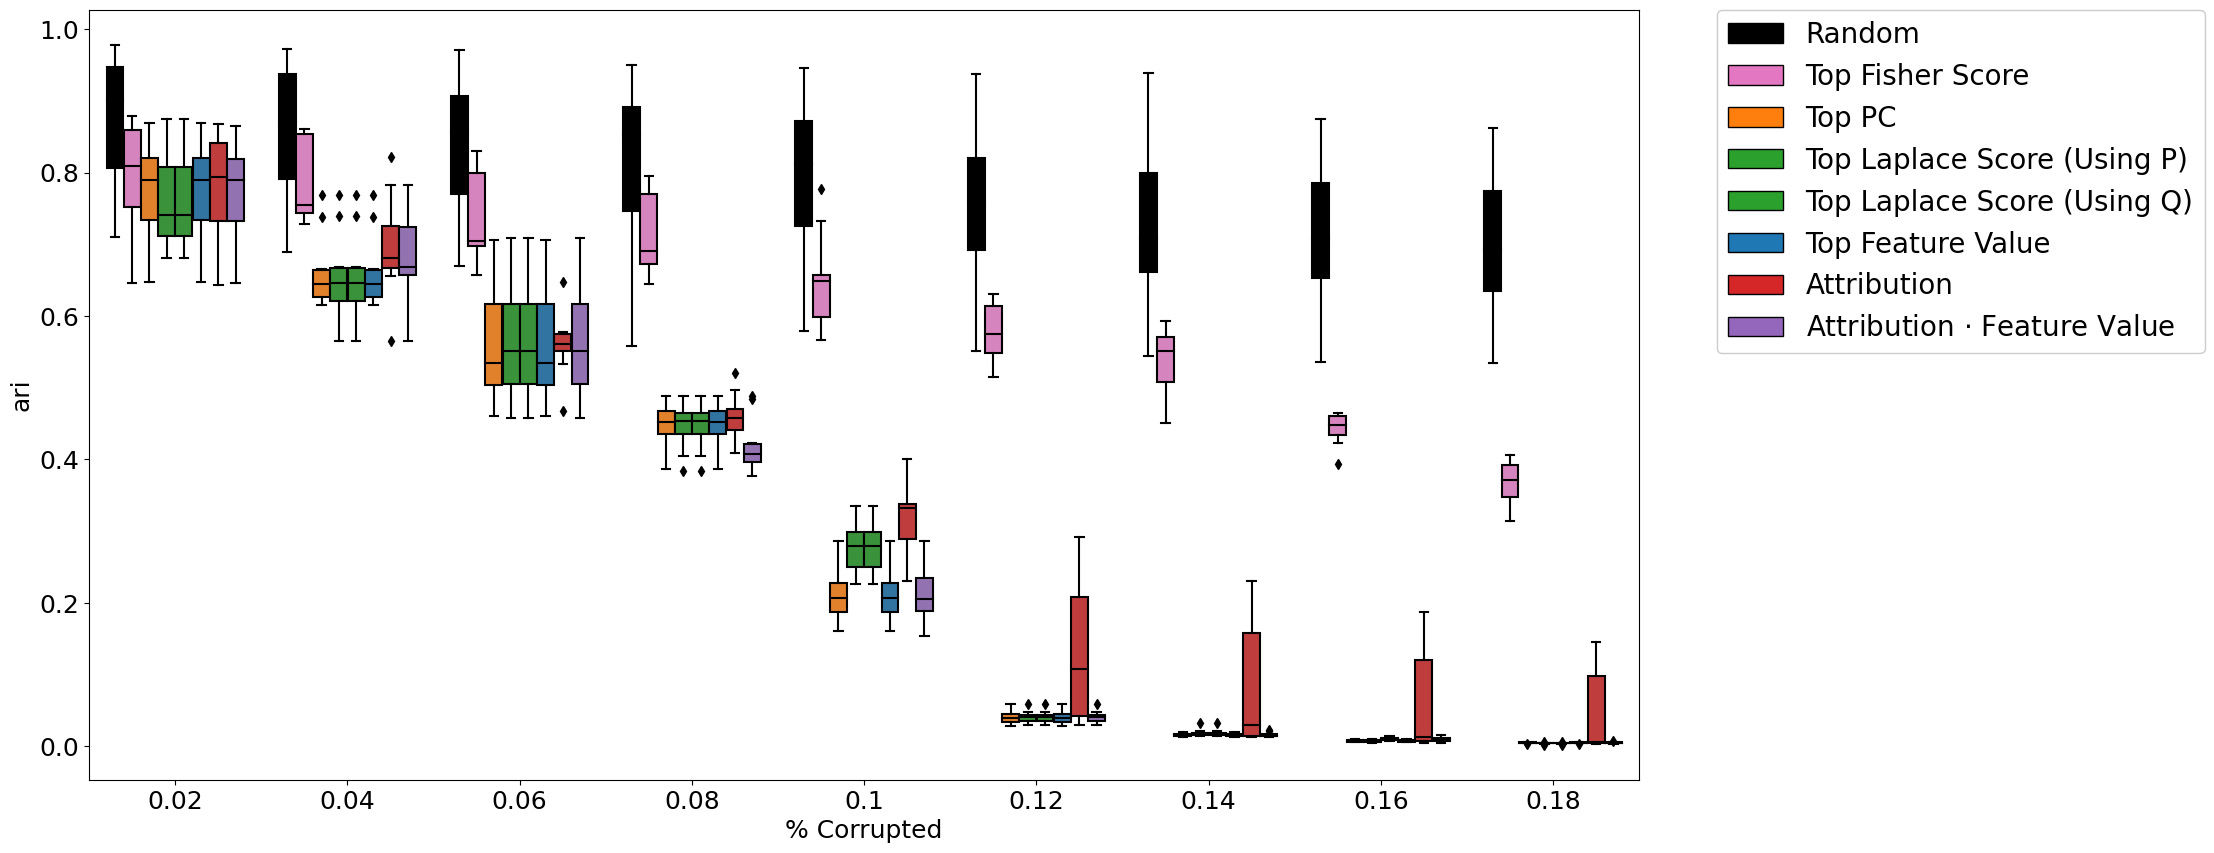

In [9]:
plot_graphs('global', 'permute', 'grad_norm')

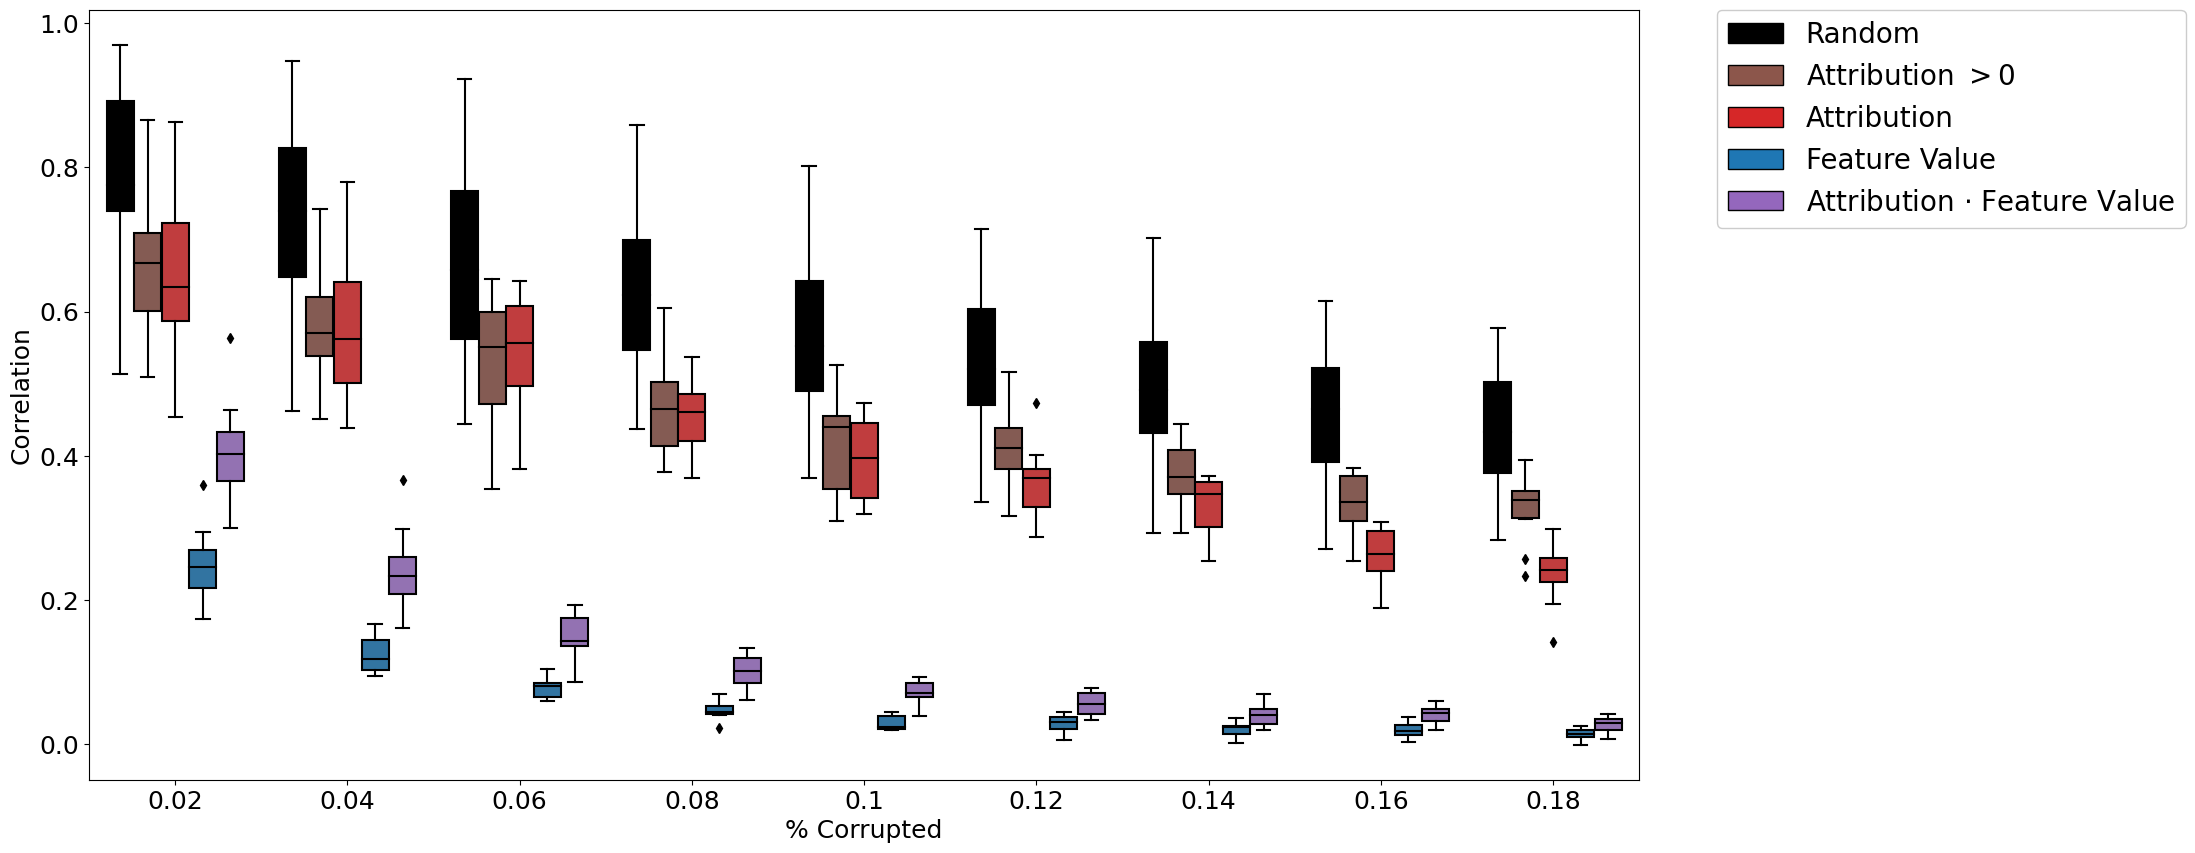

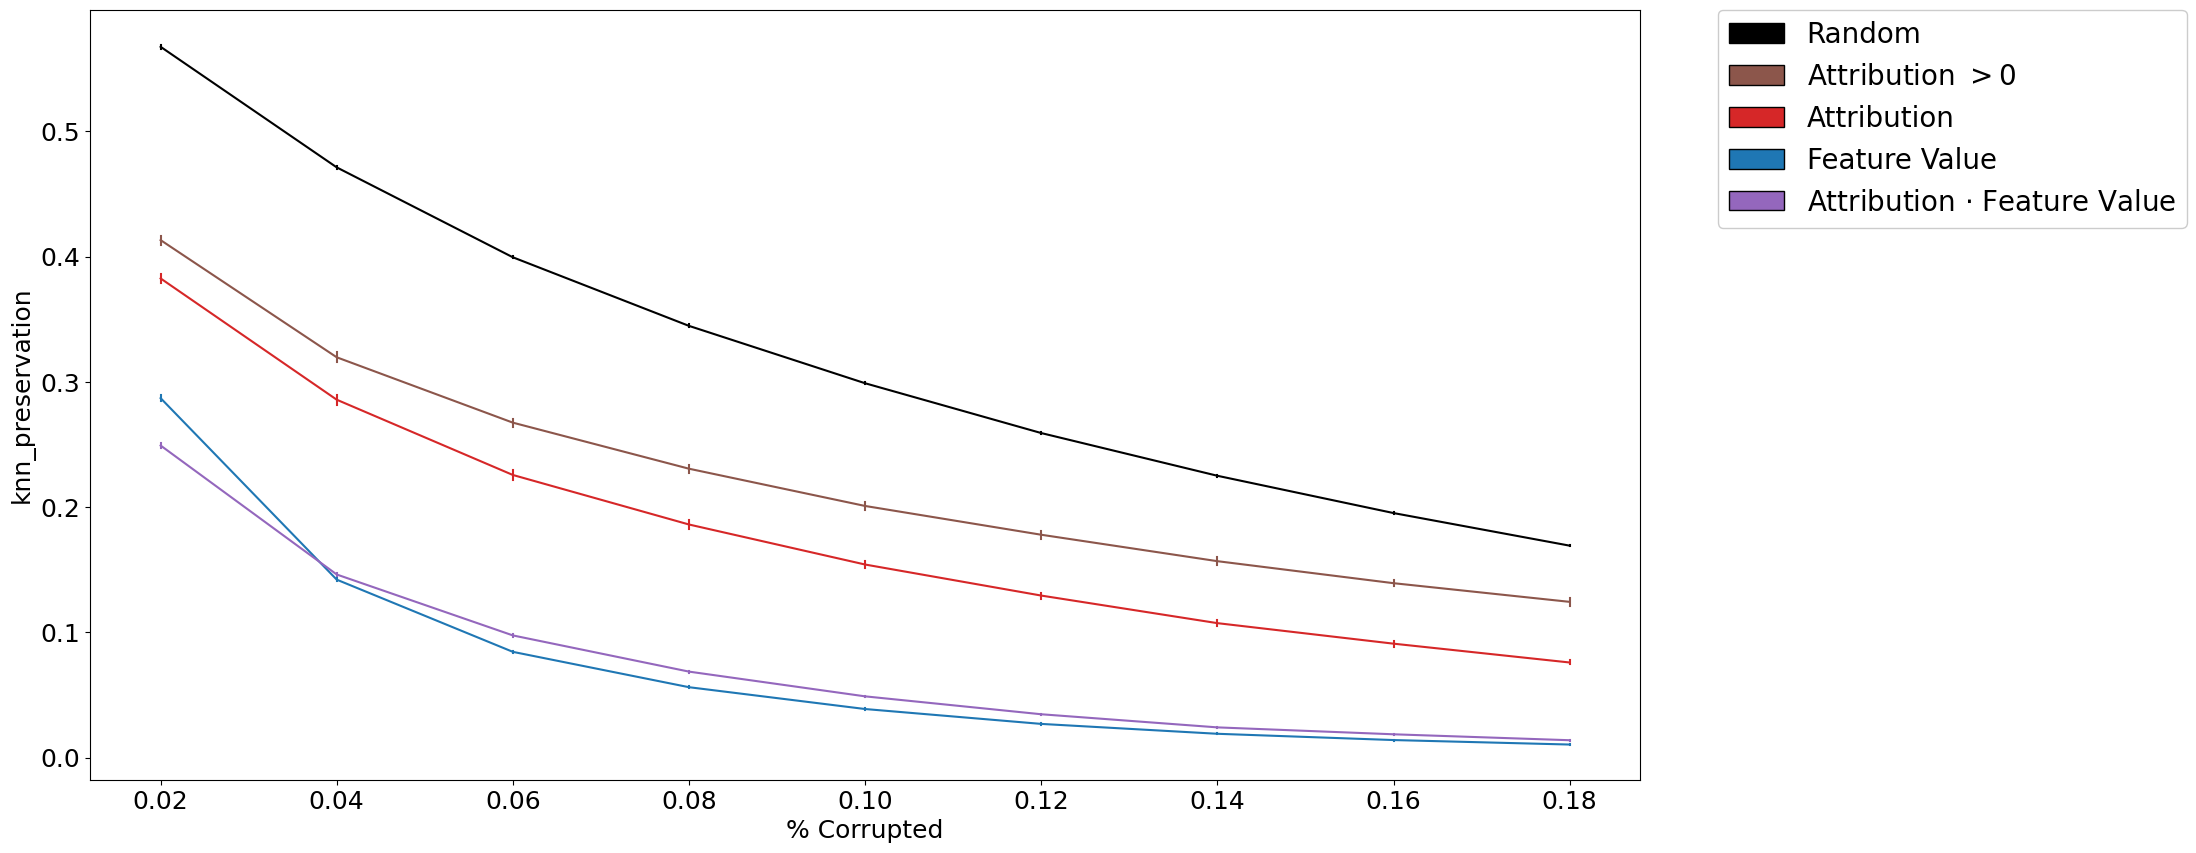

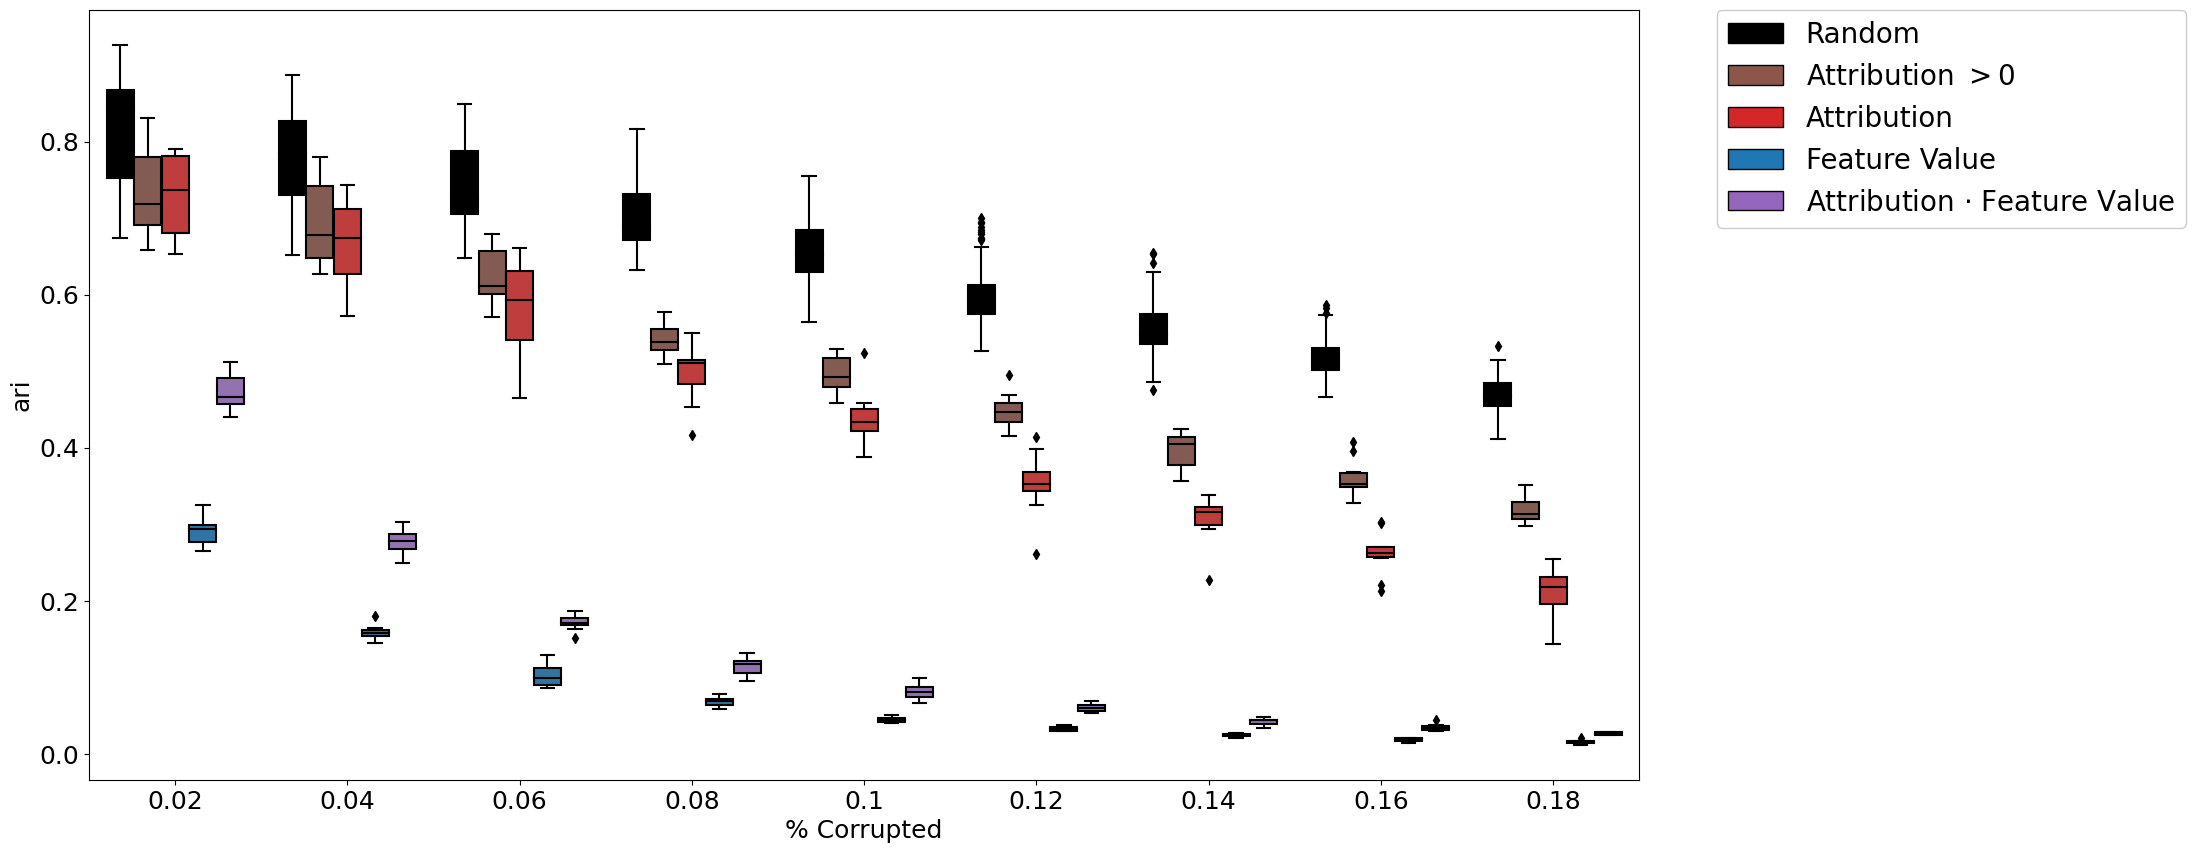

In [10]:
plot_graphs('individual', 'permute', 'grad_norm')

### KL obj experiments

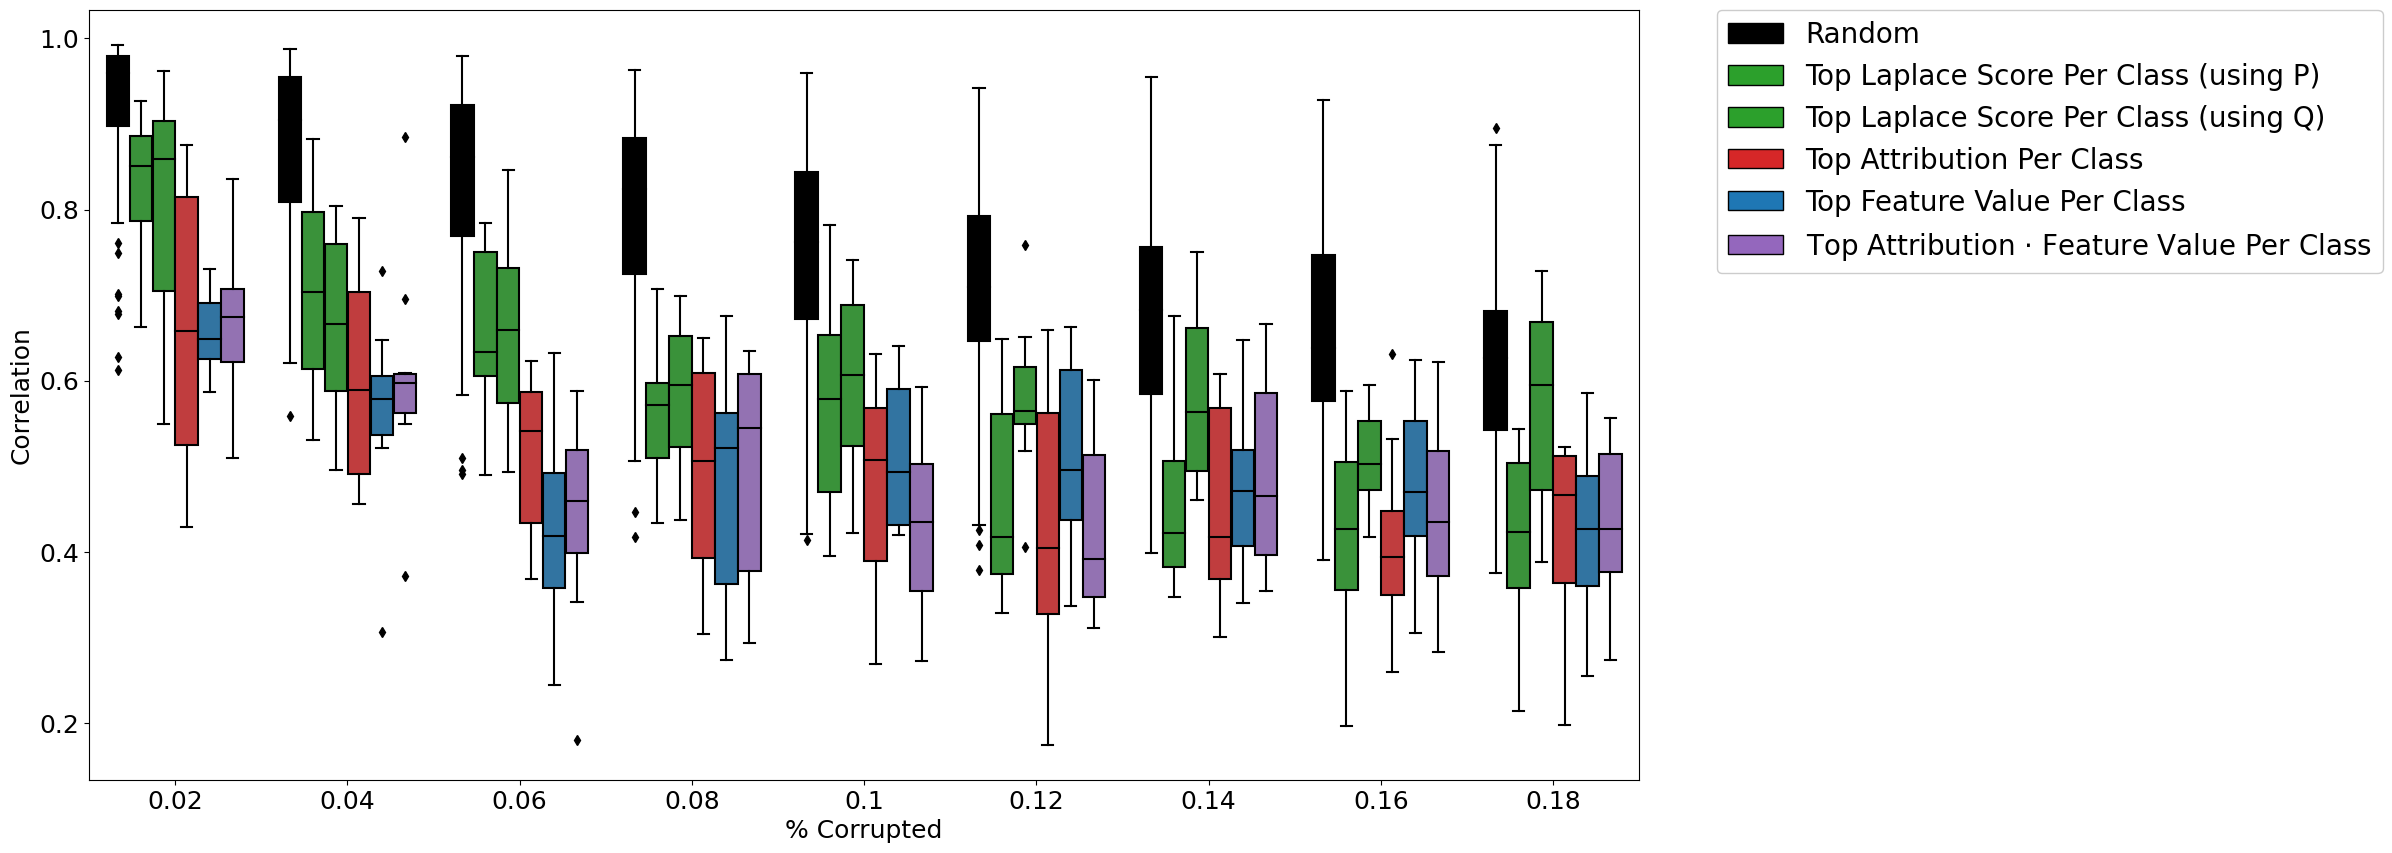

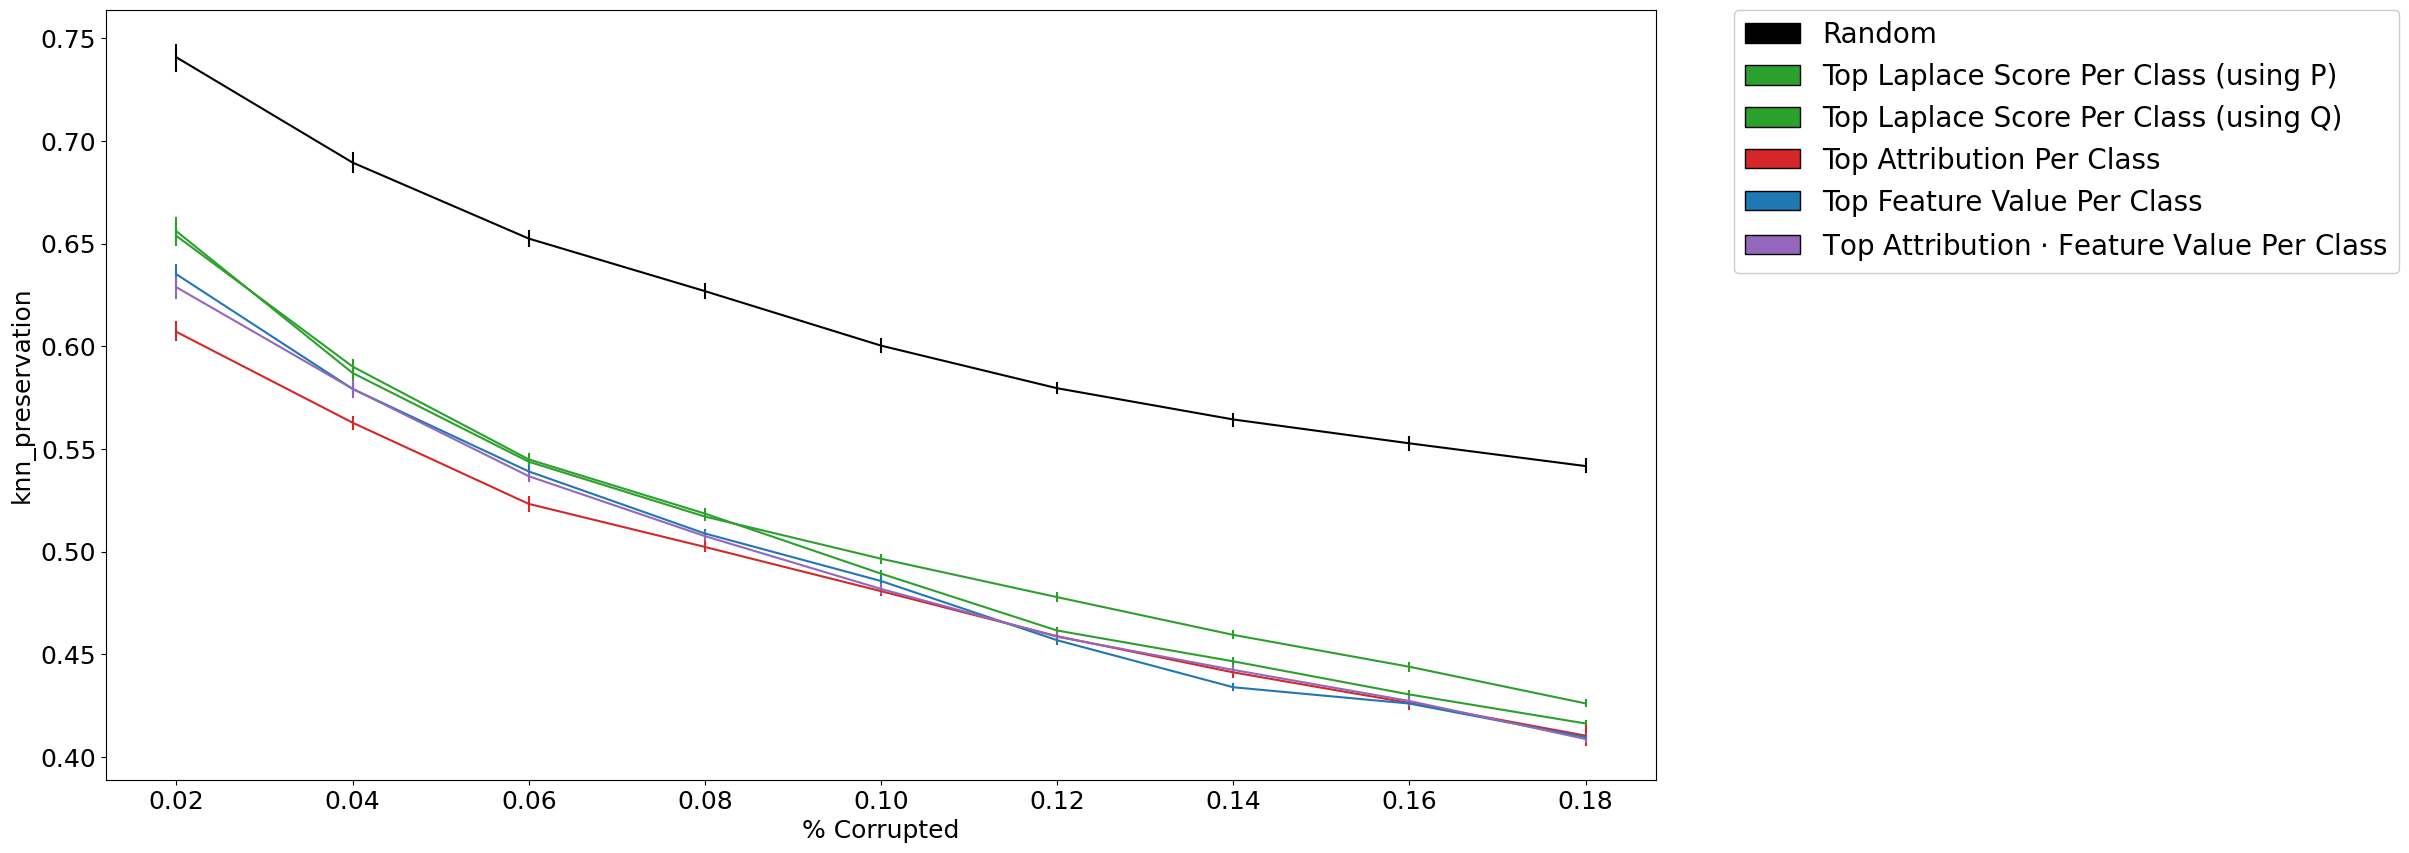

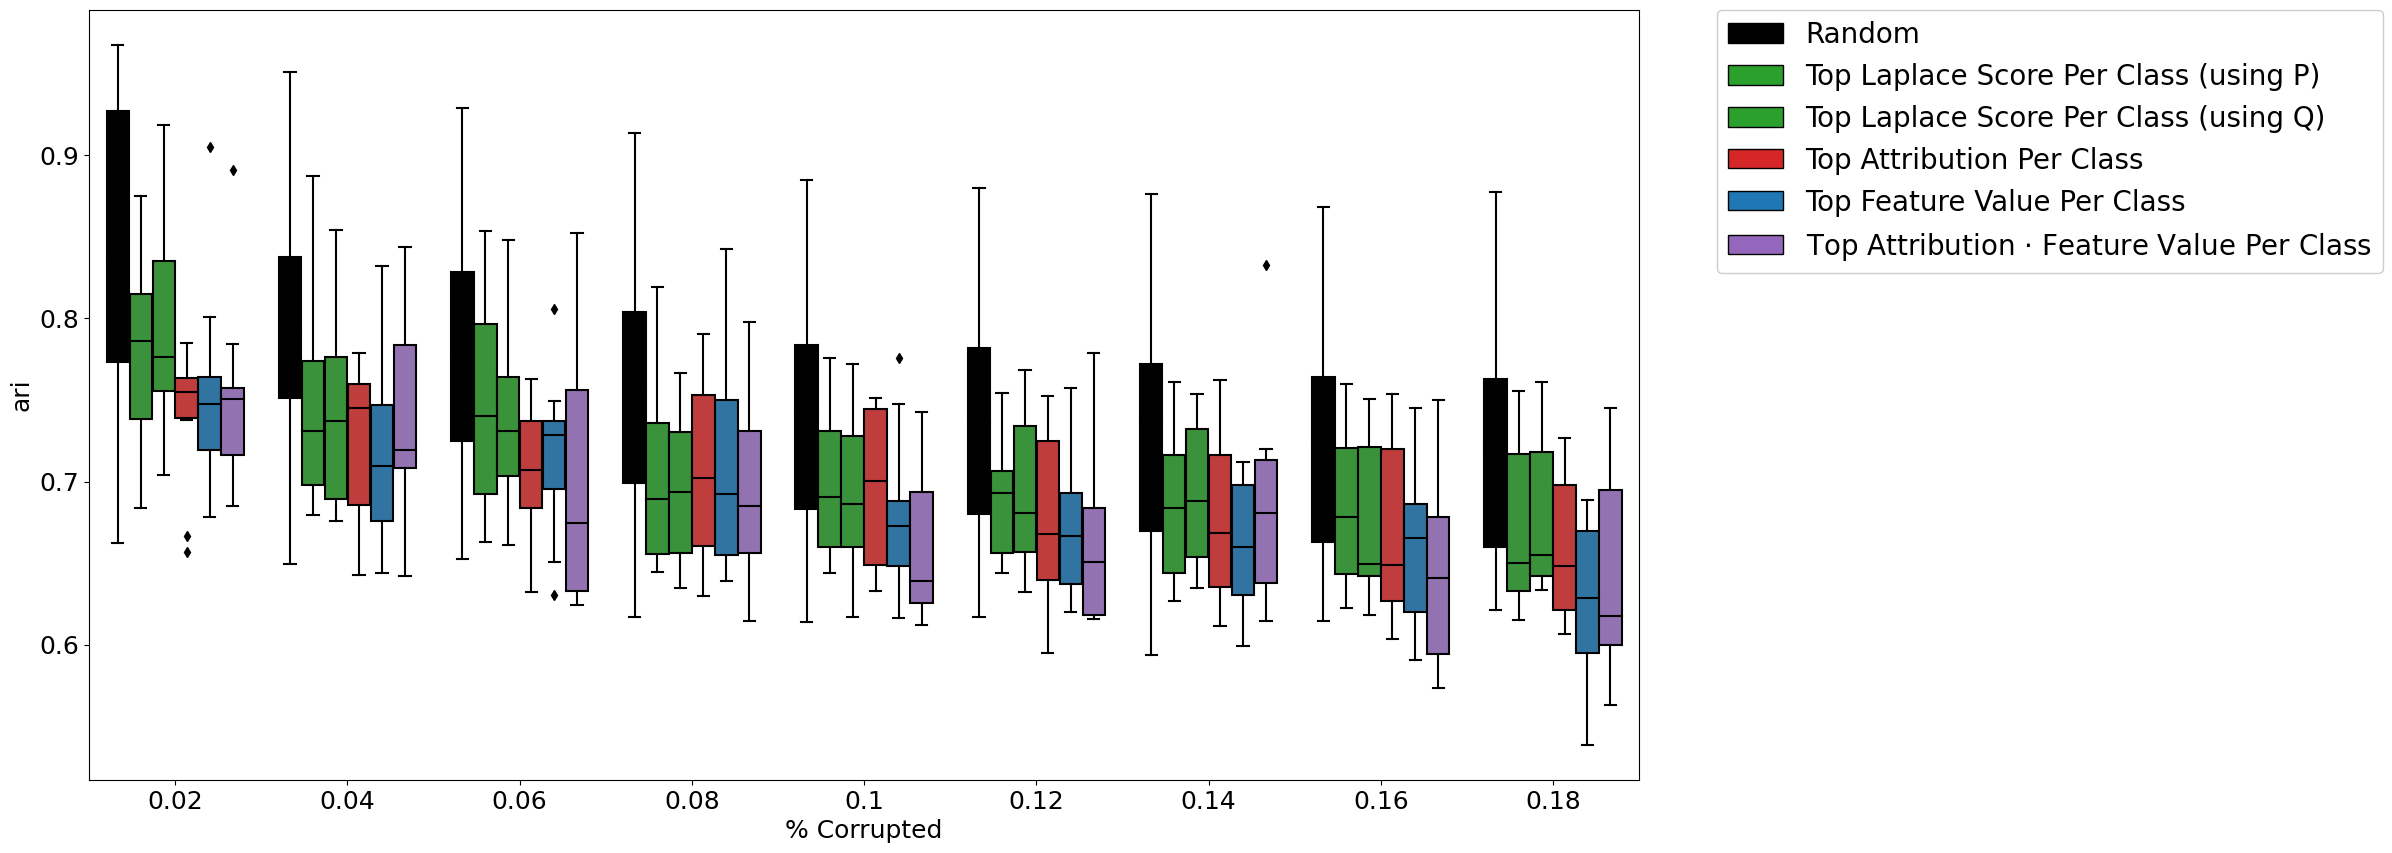

In [11]:
plot_graphs('class', 'mean', 'kl_obj')

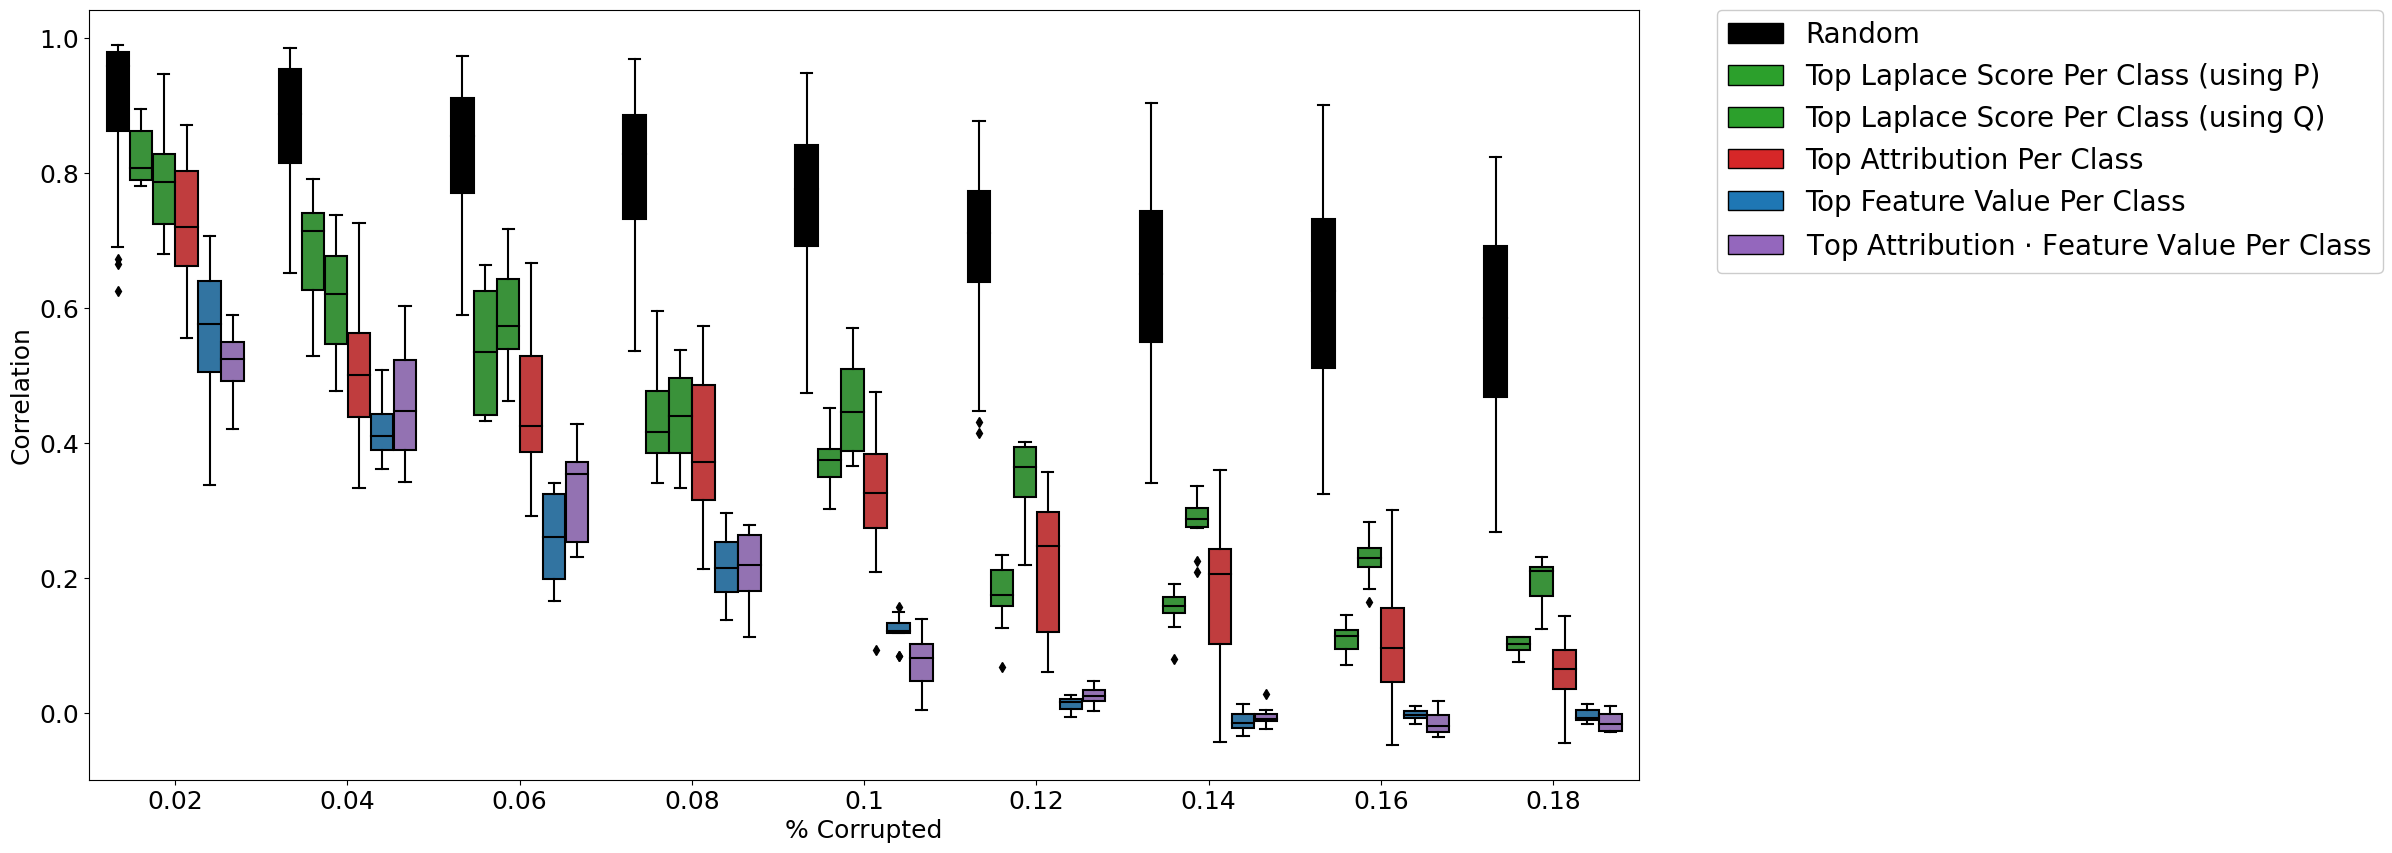

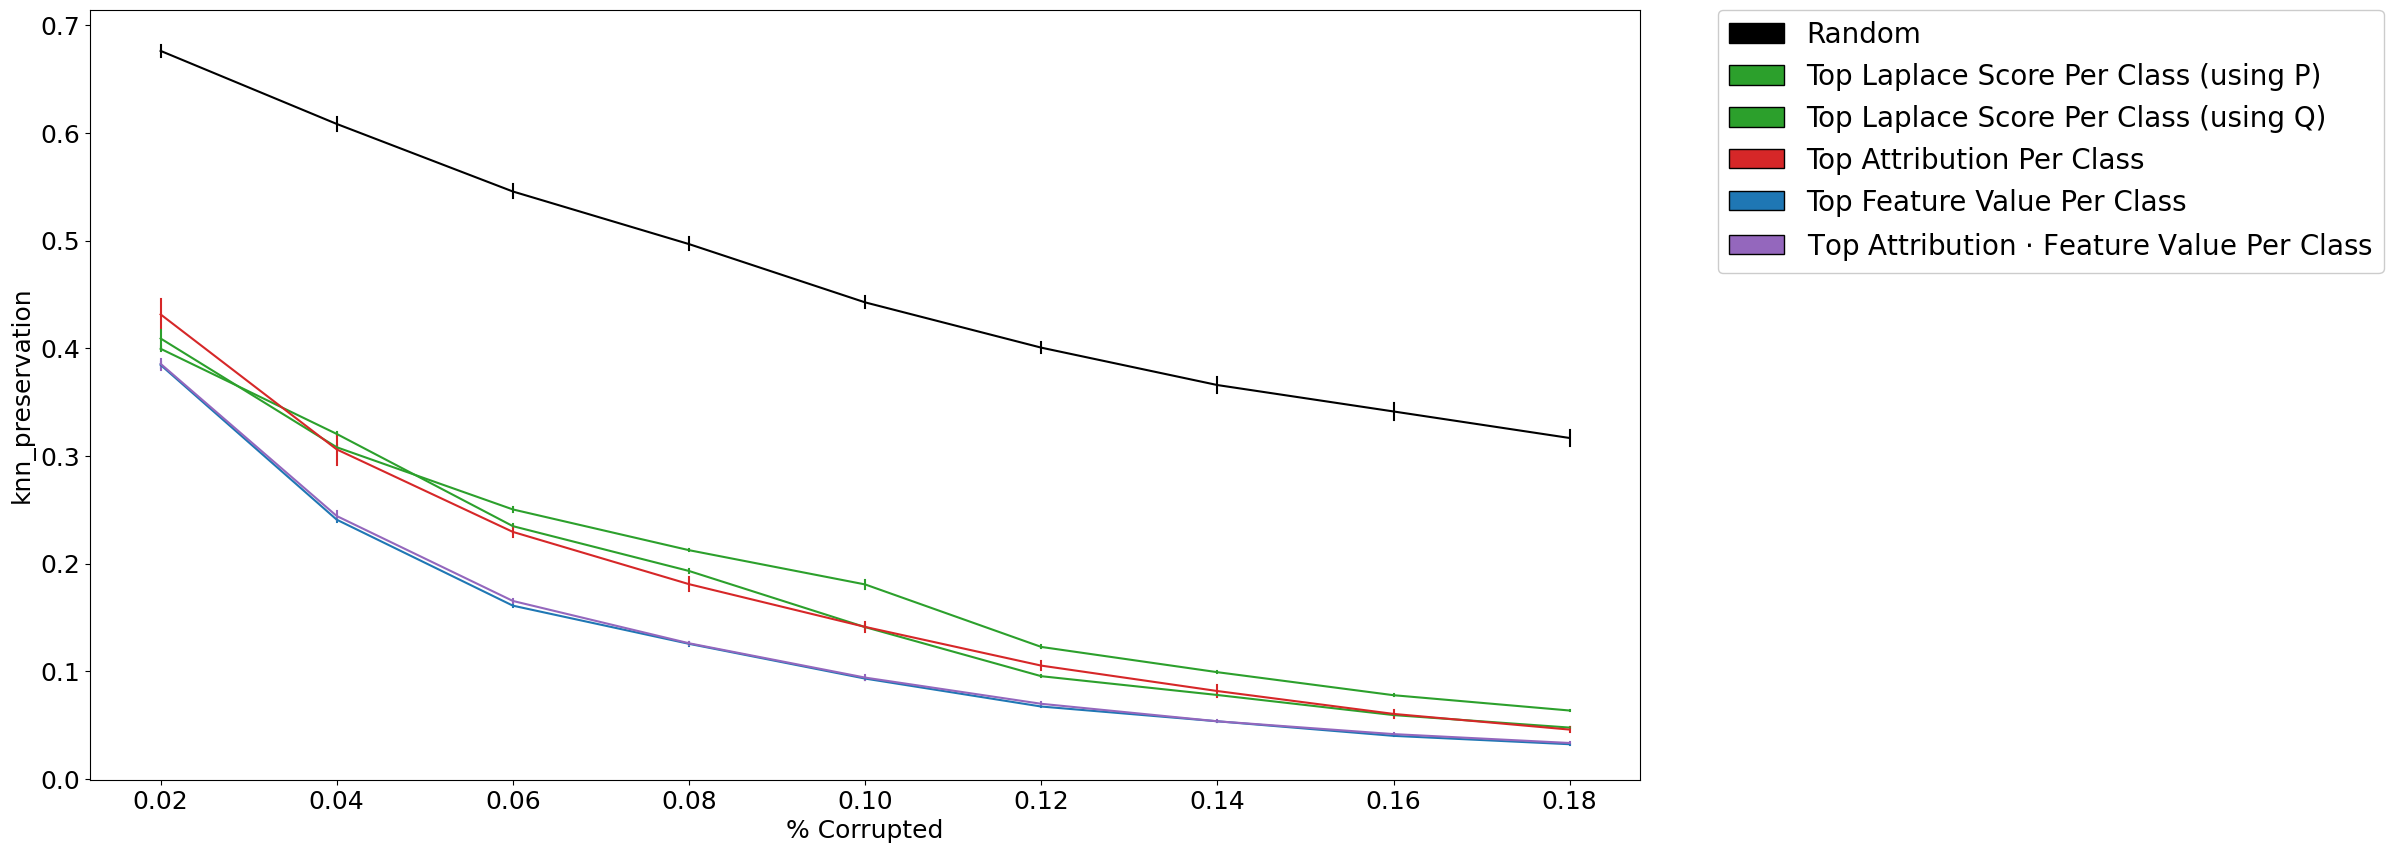

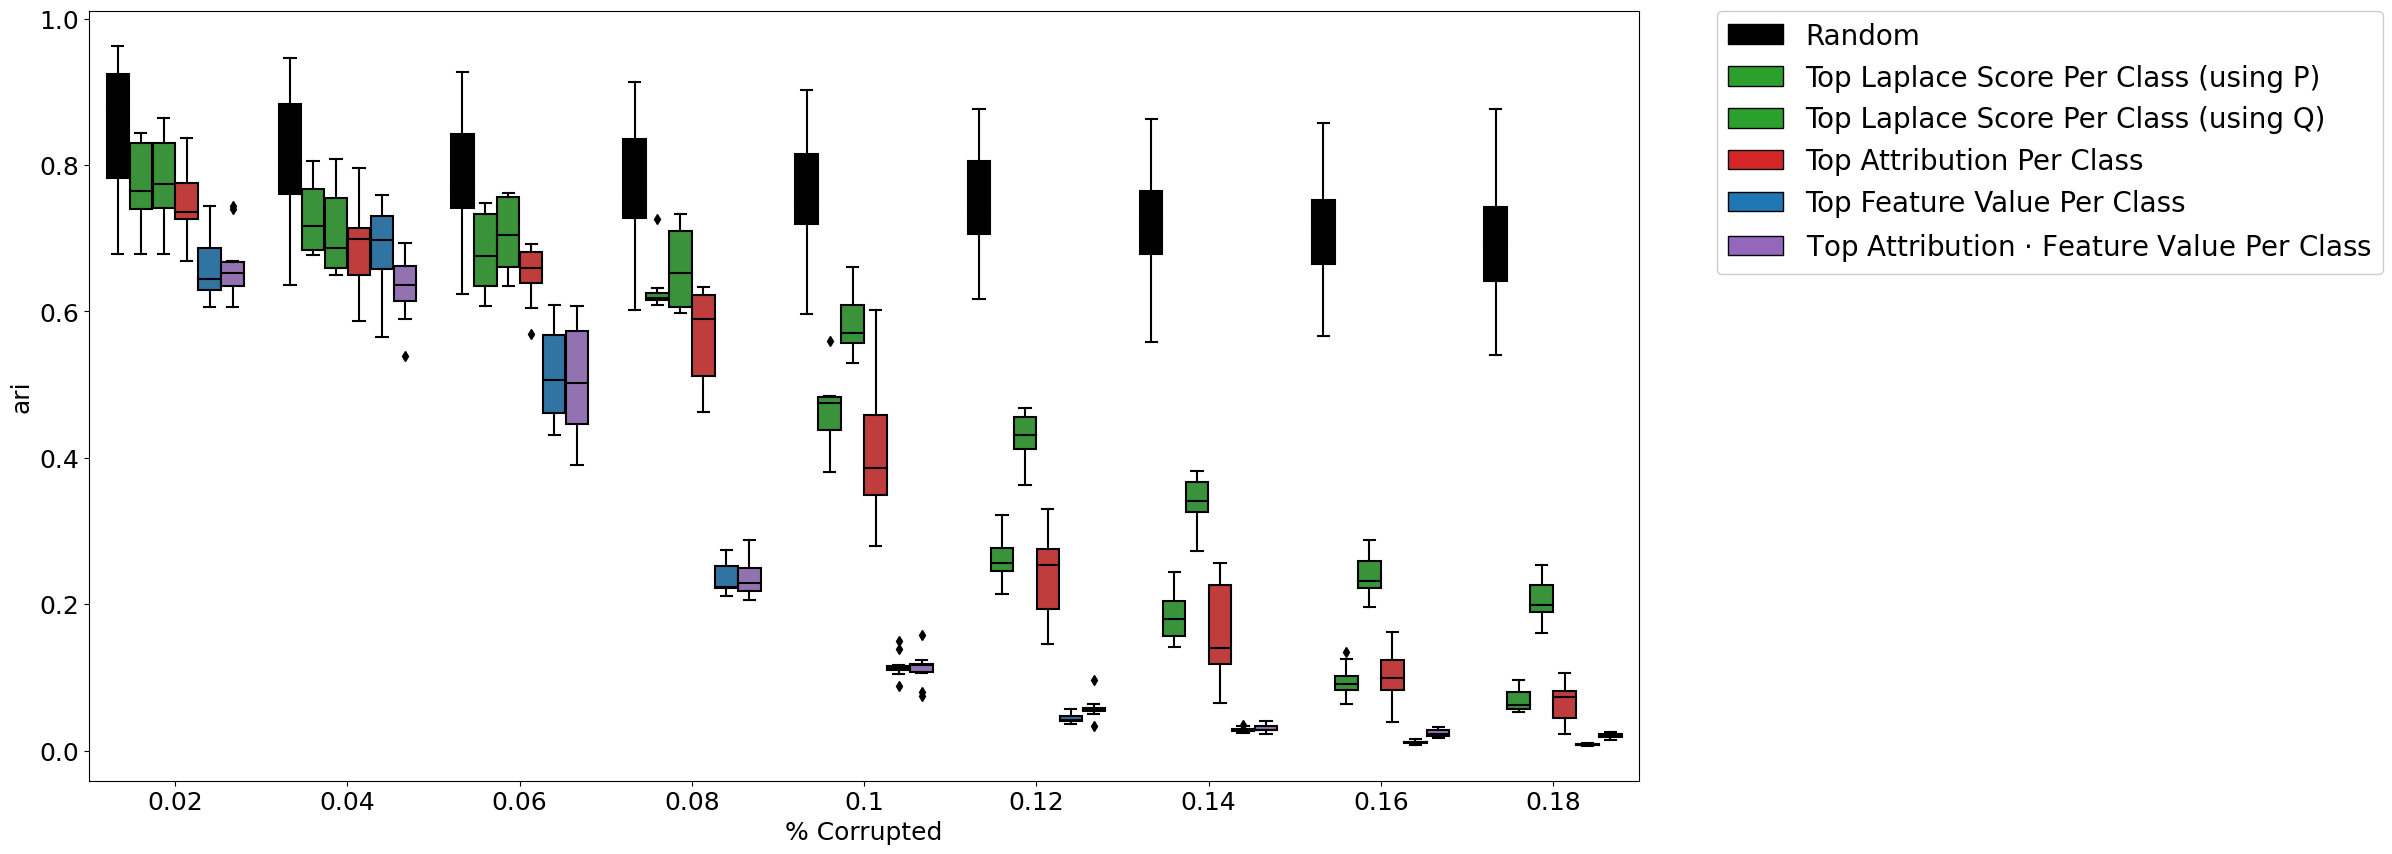

In [12]:
plot_graphs('class', 'permute', 'kl_obj')

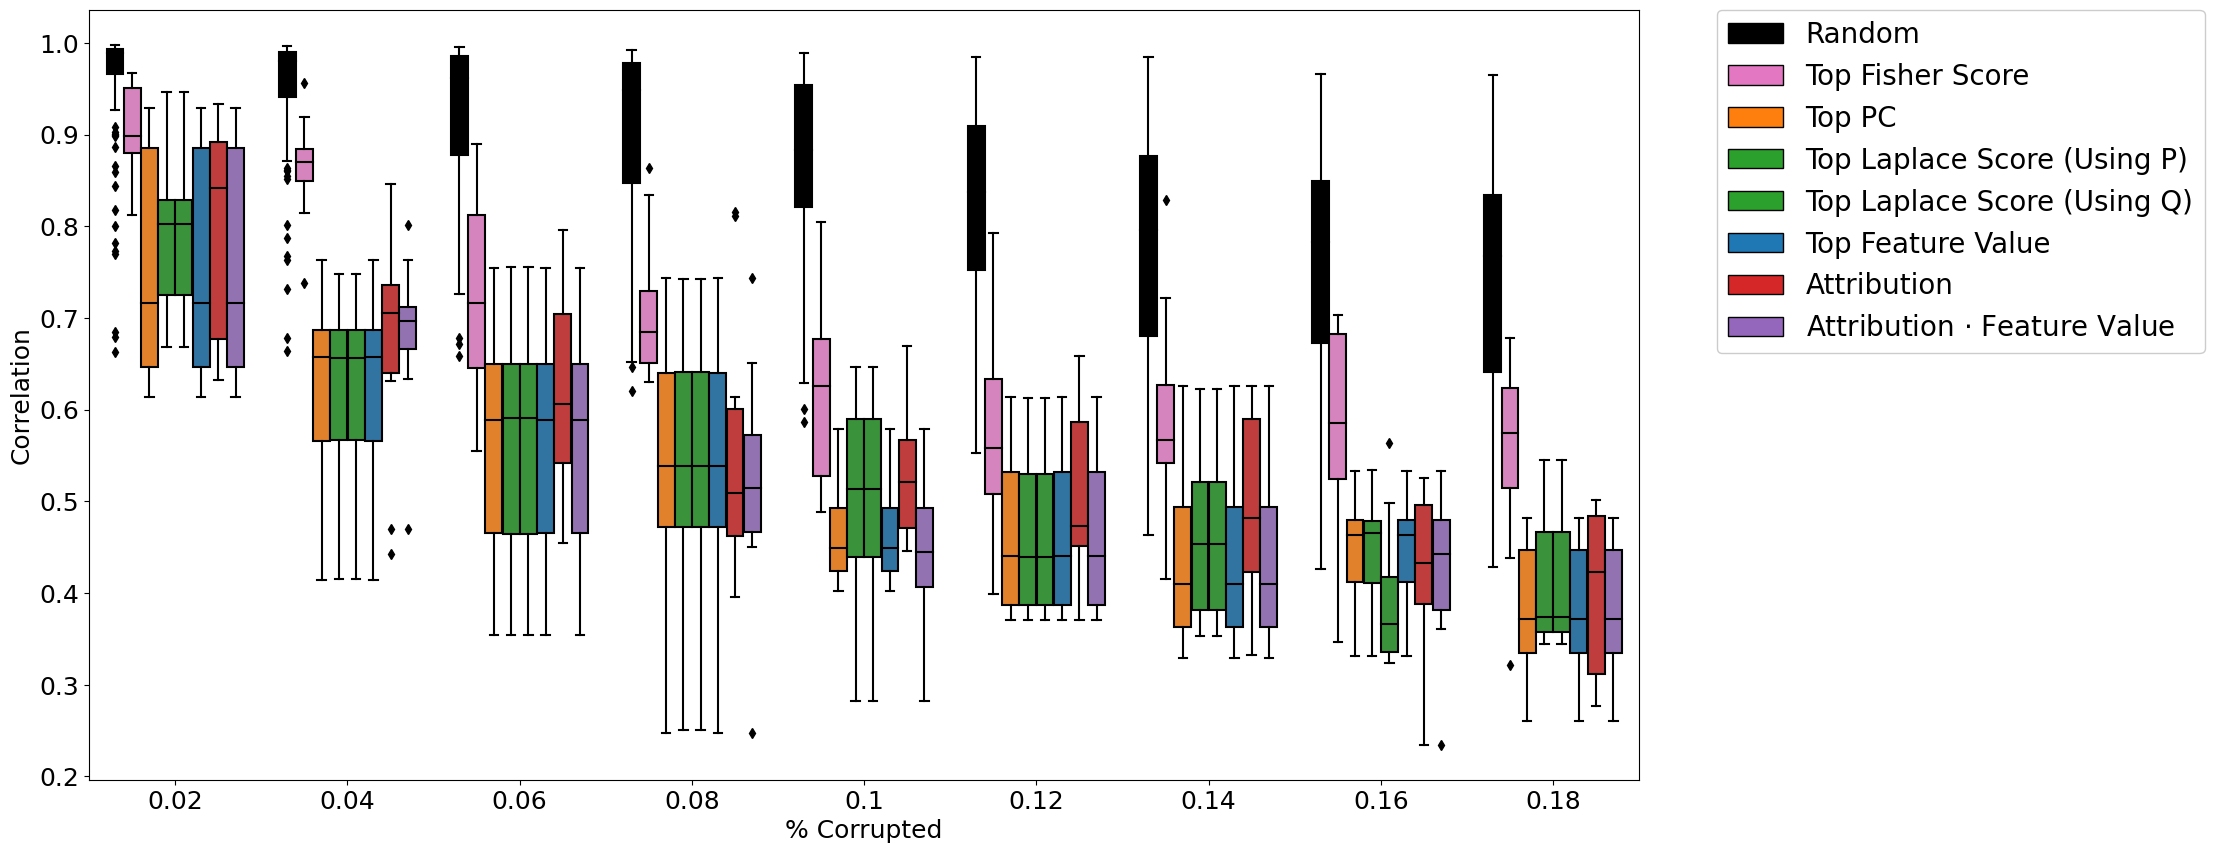

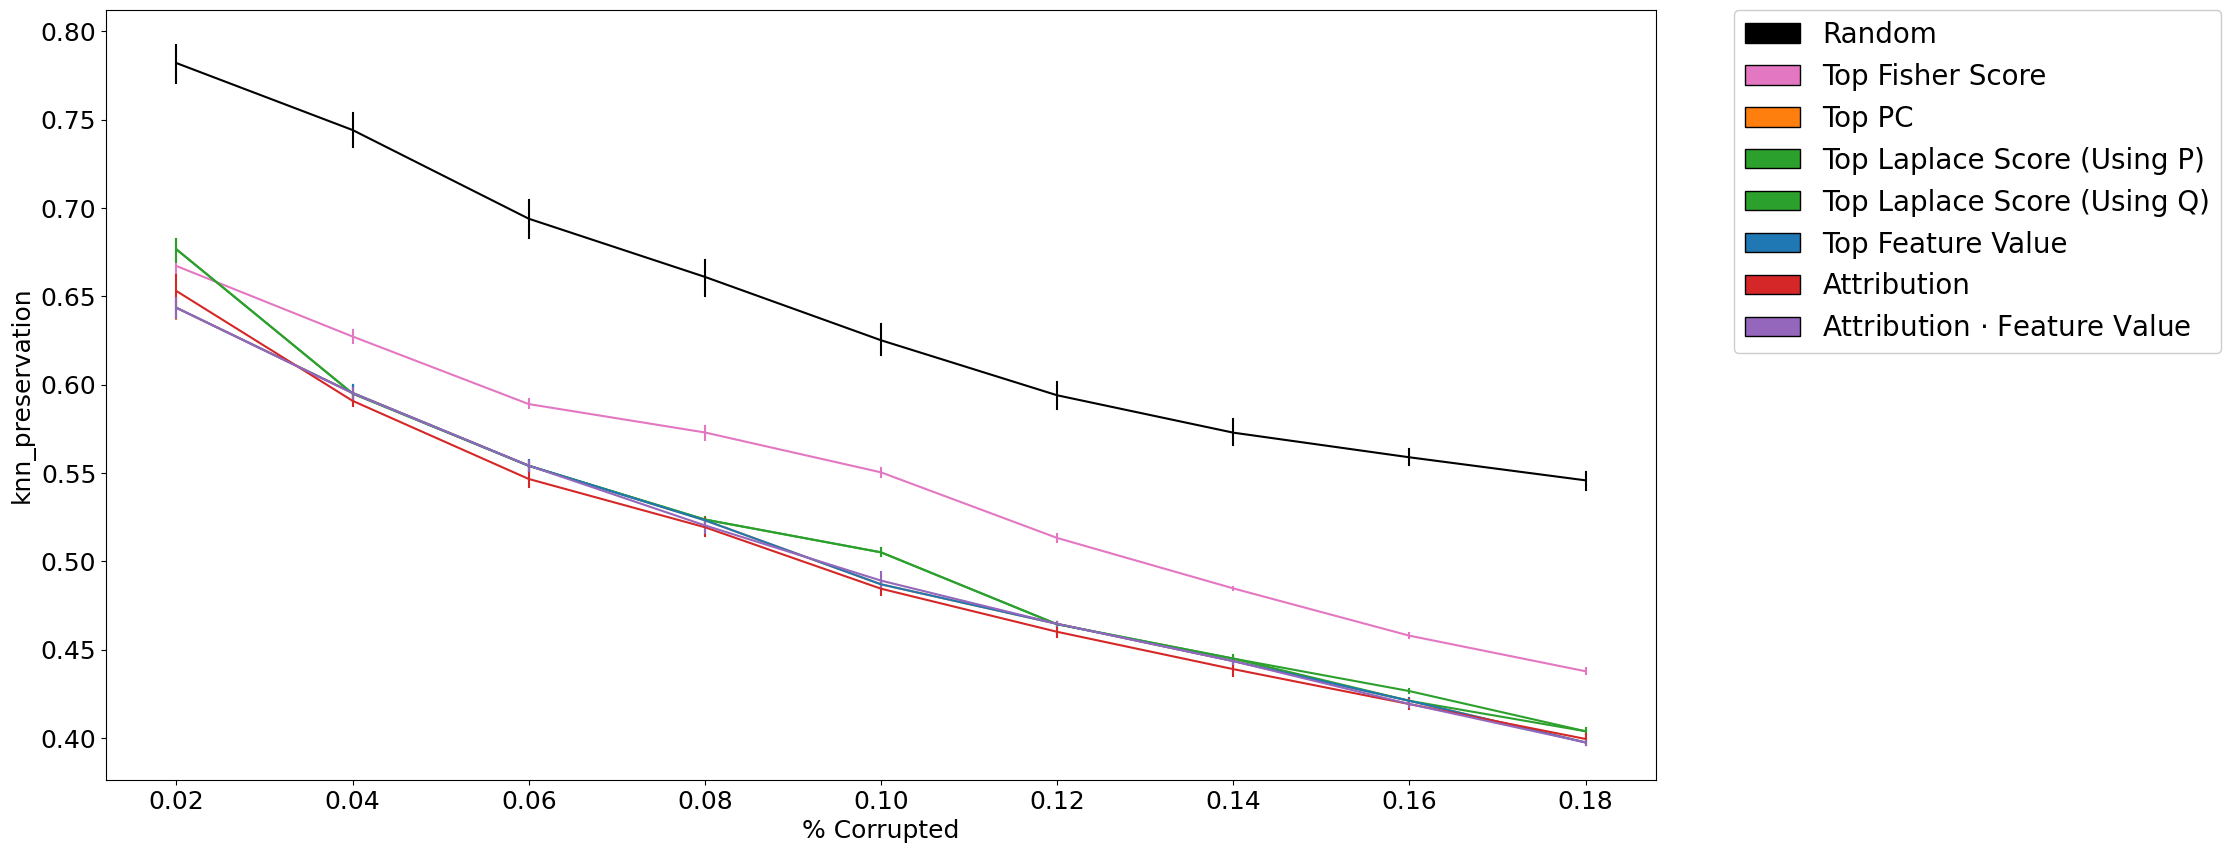

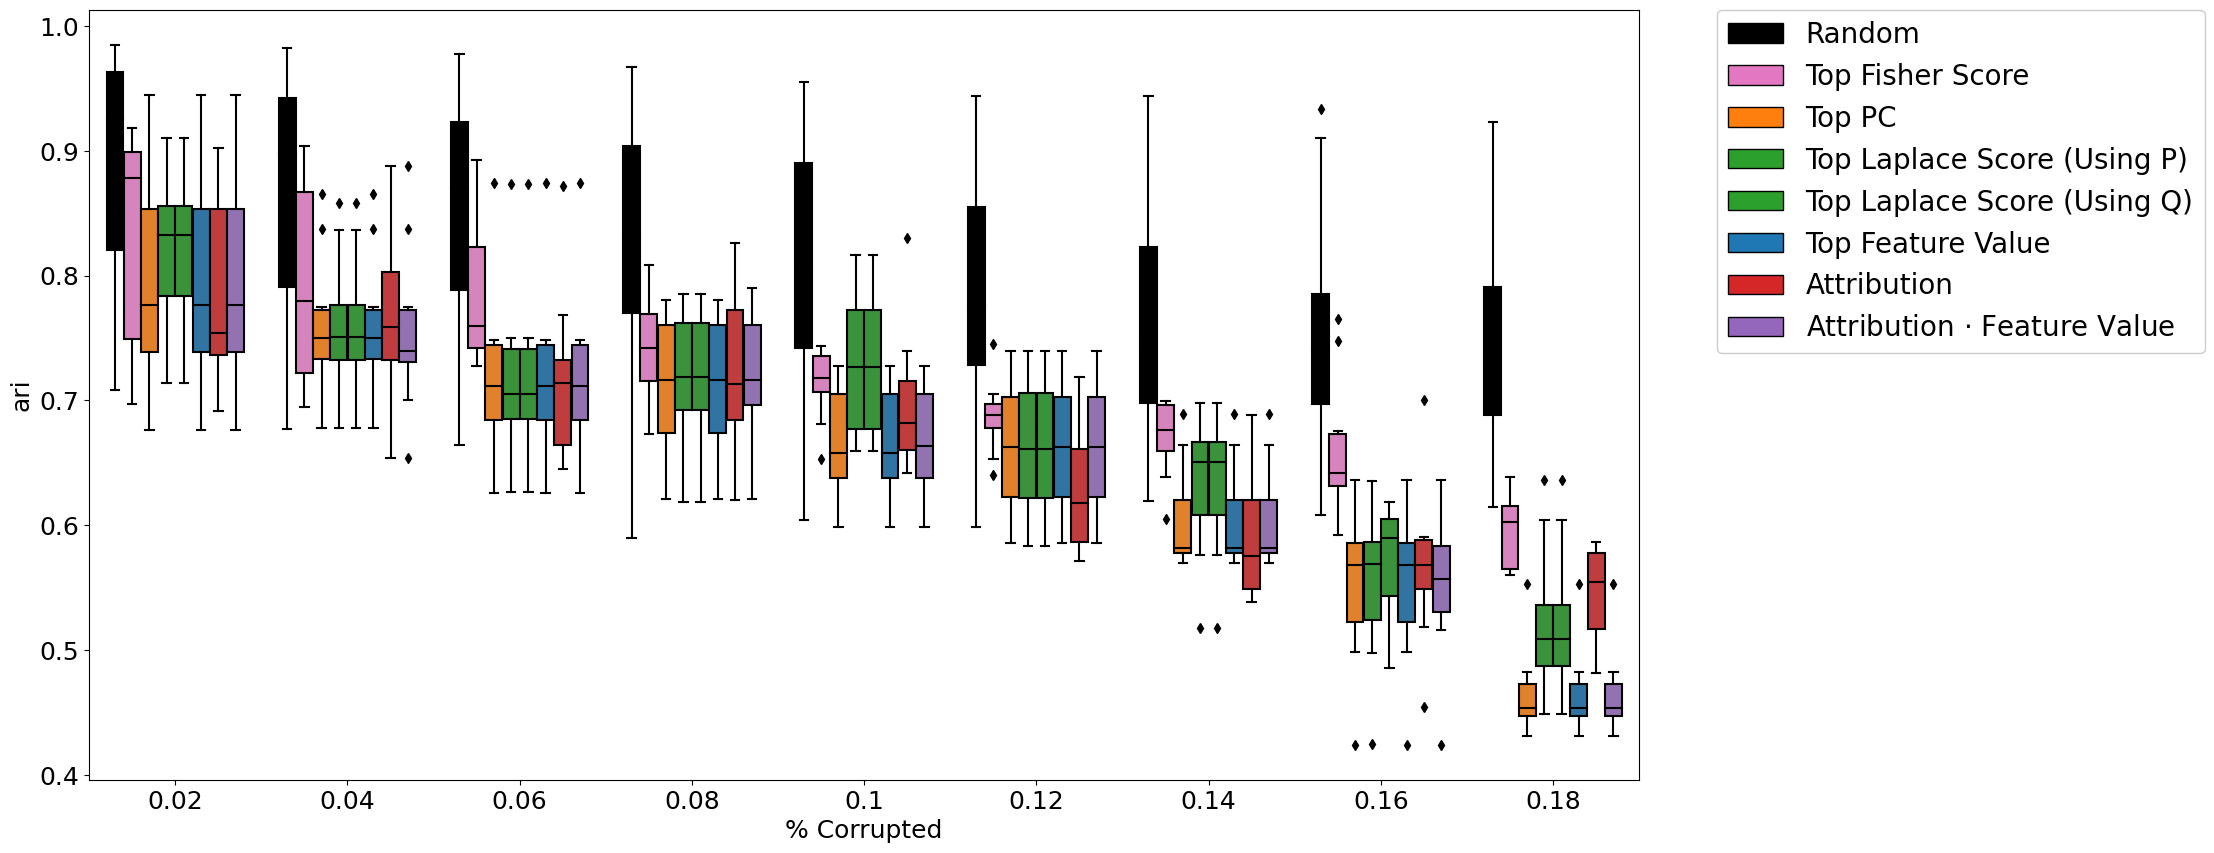

In [13]:
plot_graphs('global', 'remove', 'kl_obj')

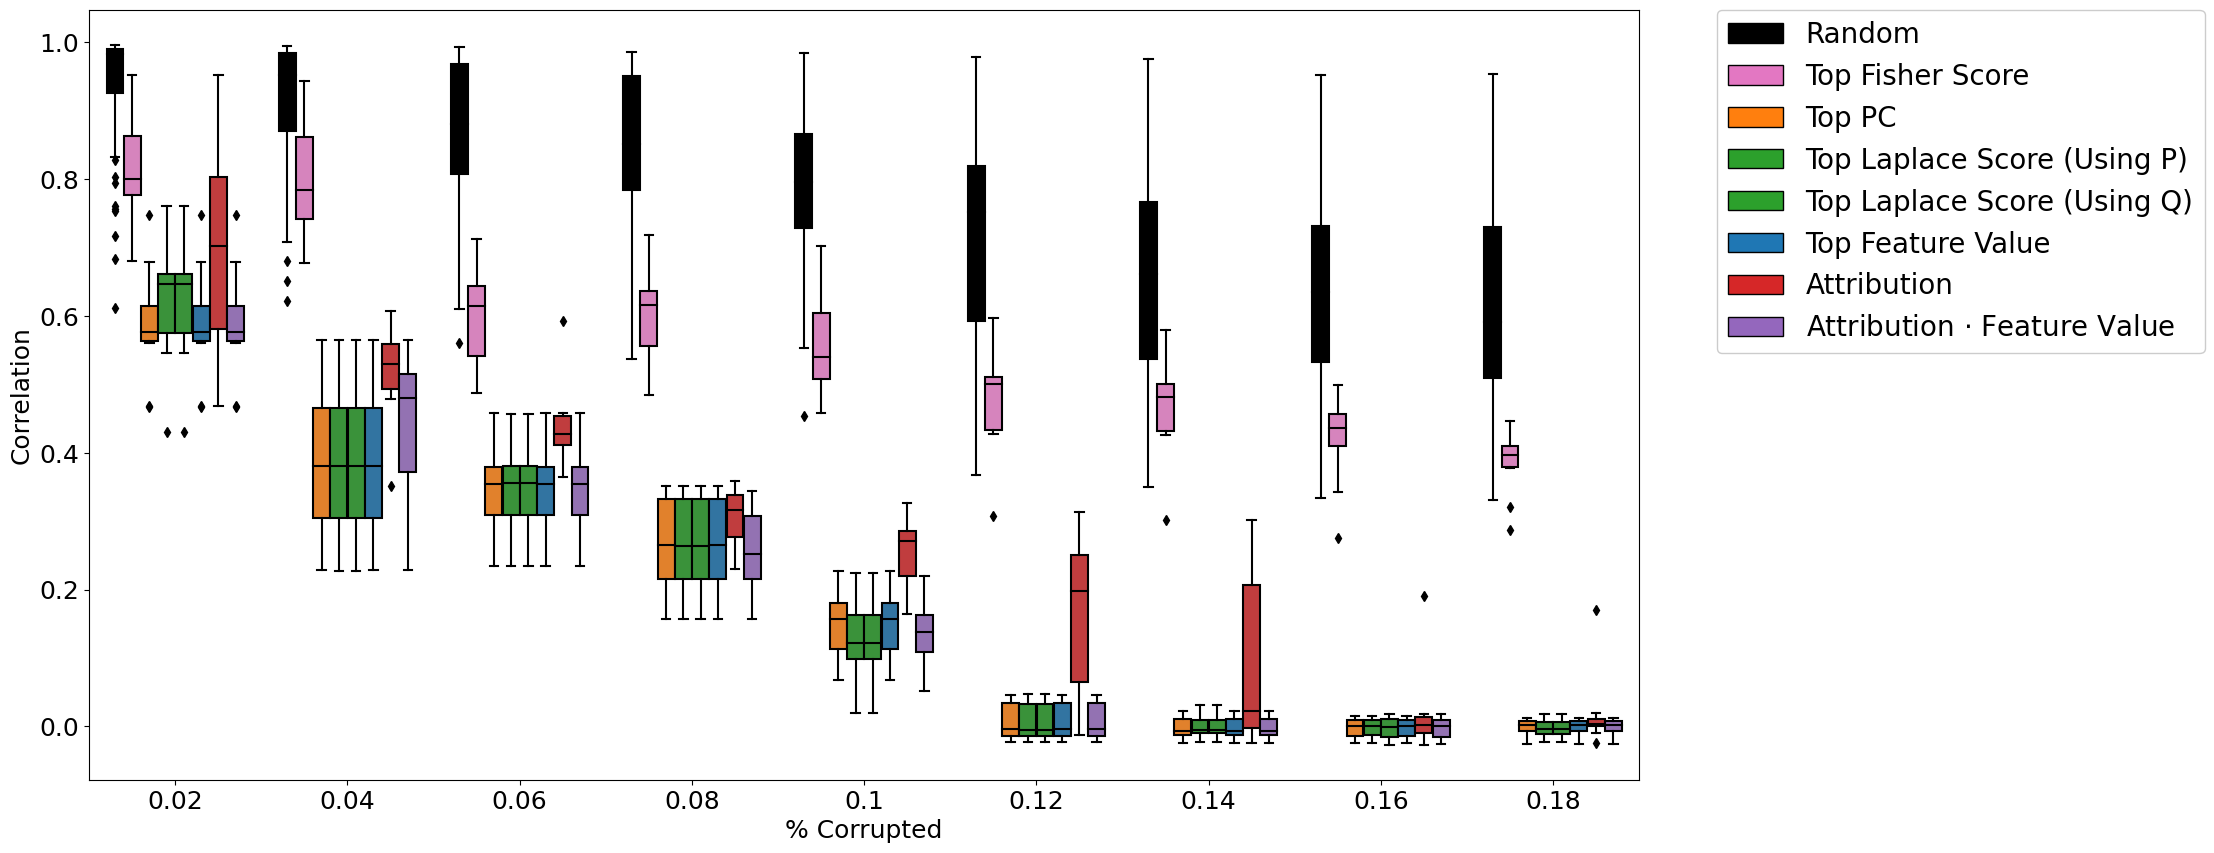

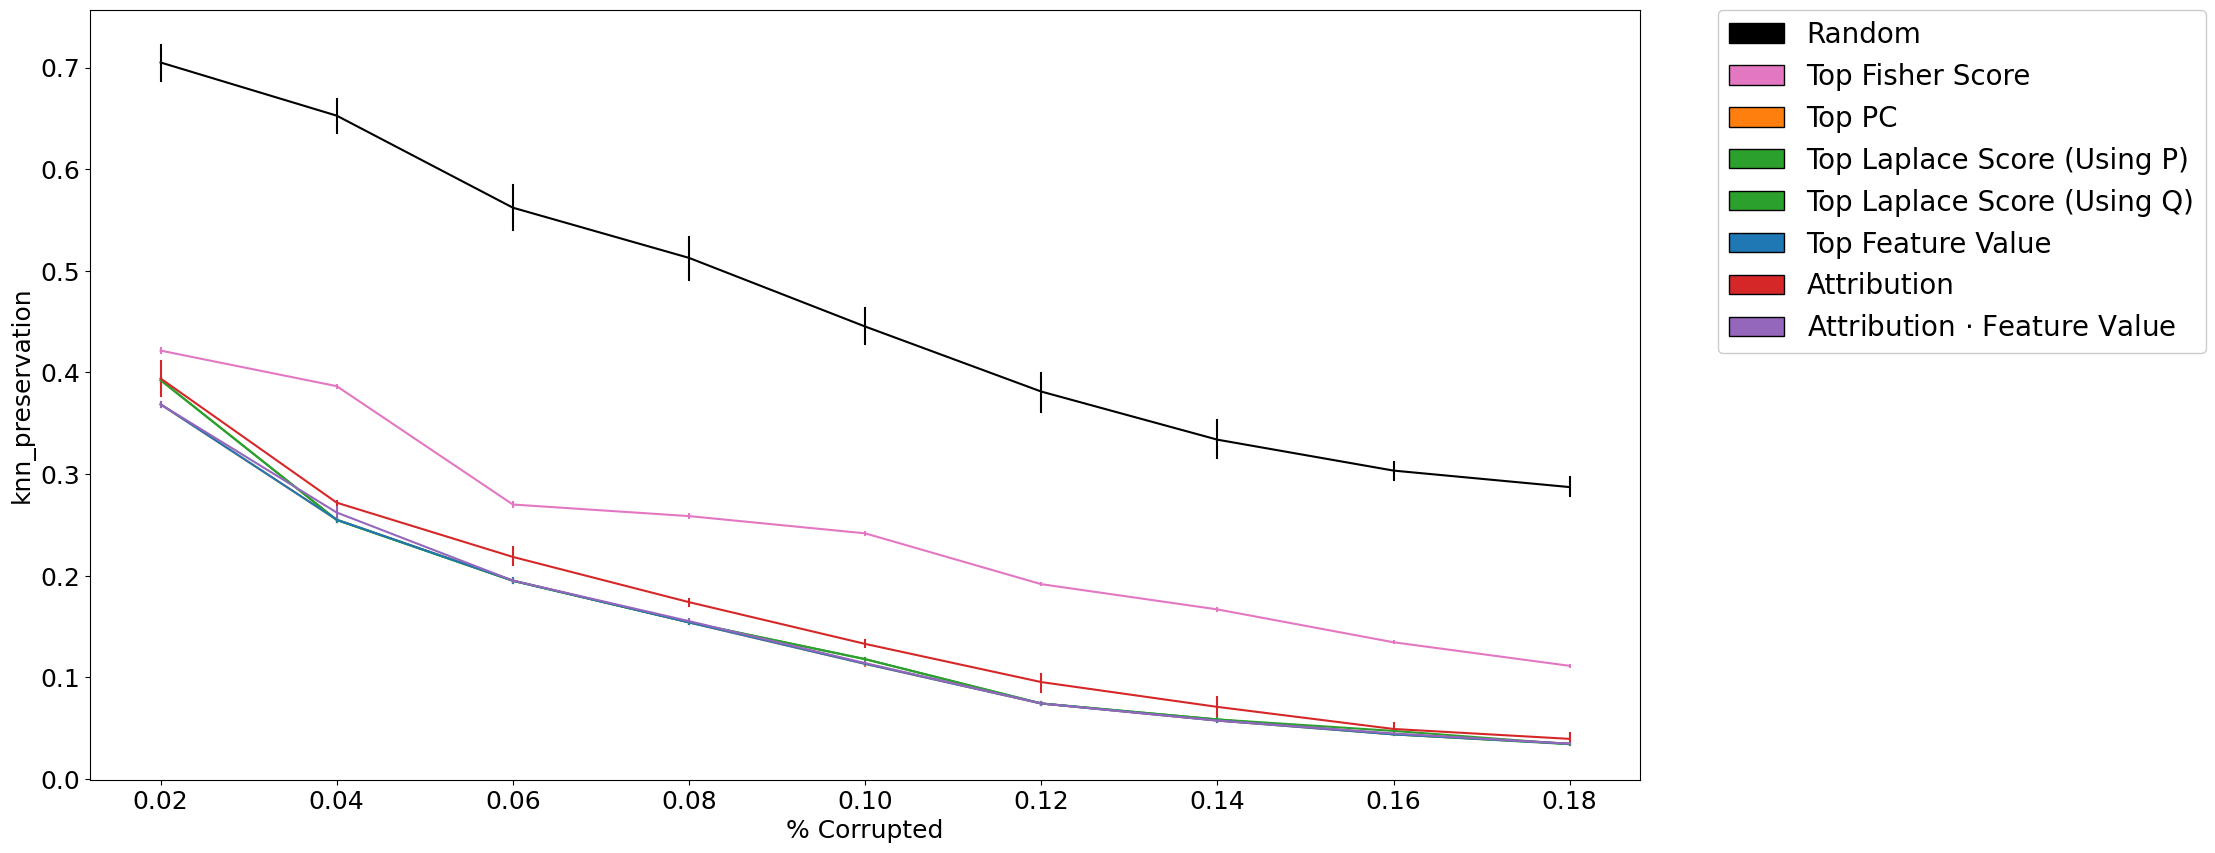

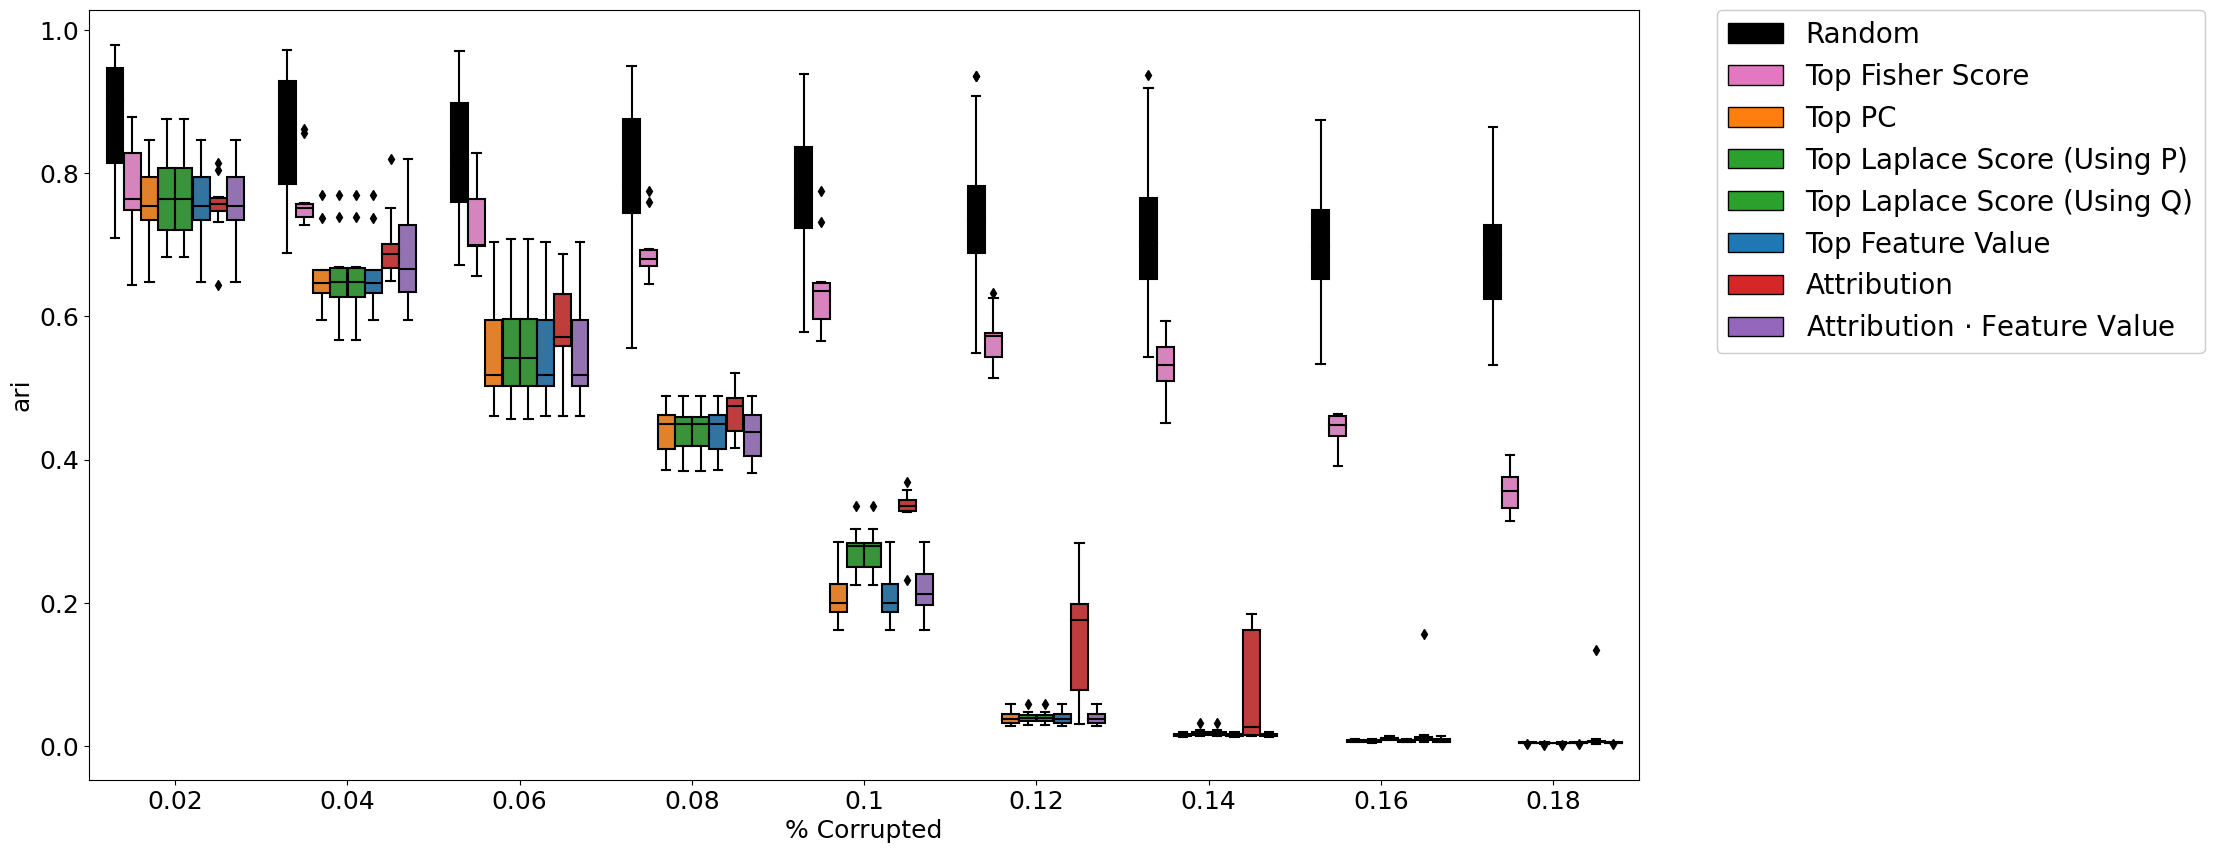

In [14]:
plot_graphs('global', 'permute', 'kl_obj')

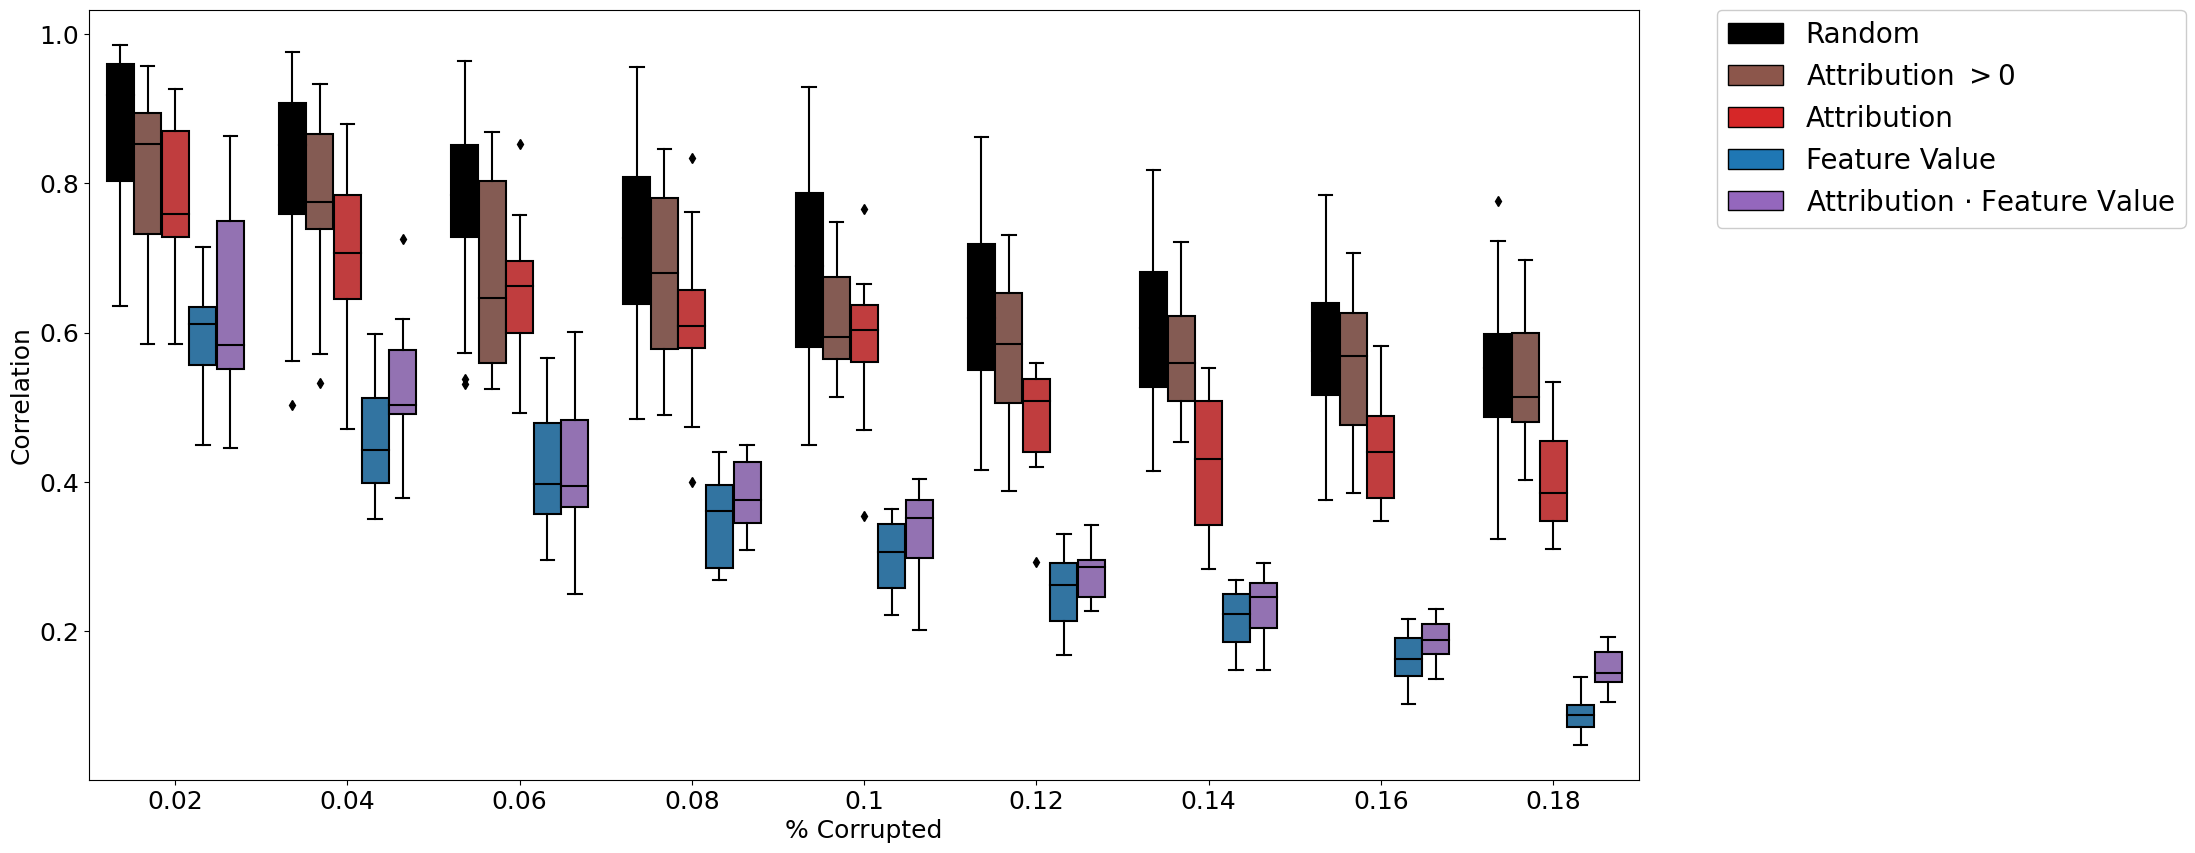

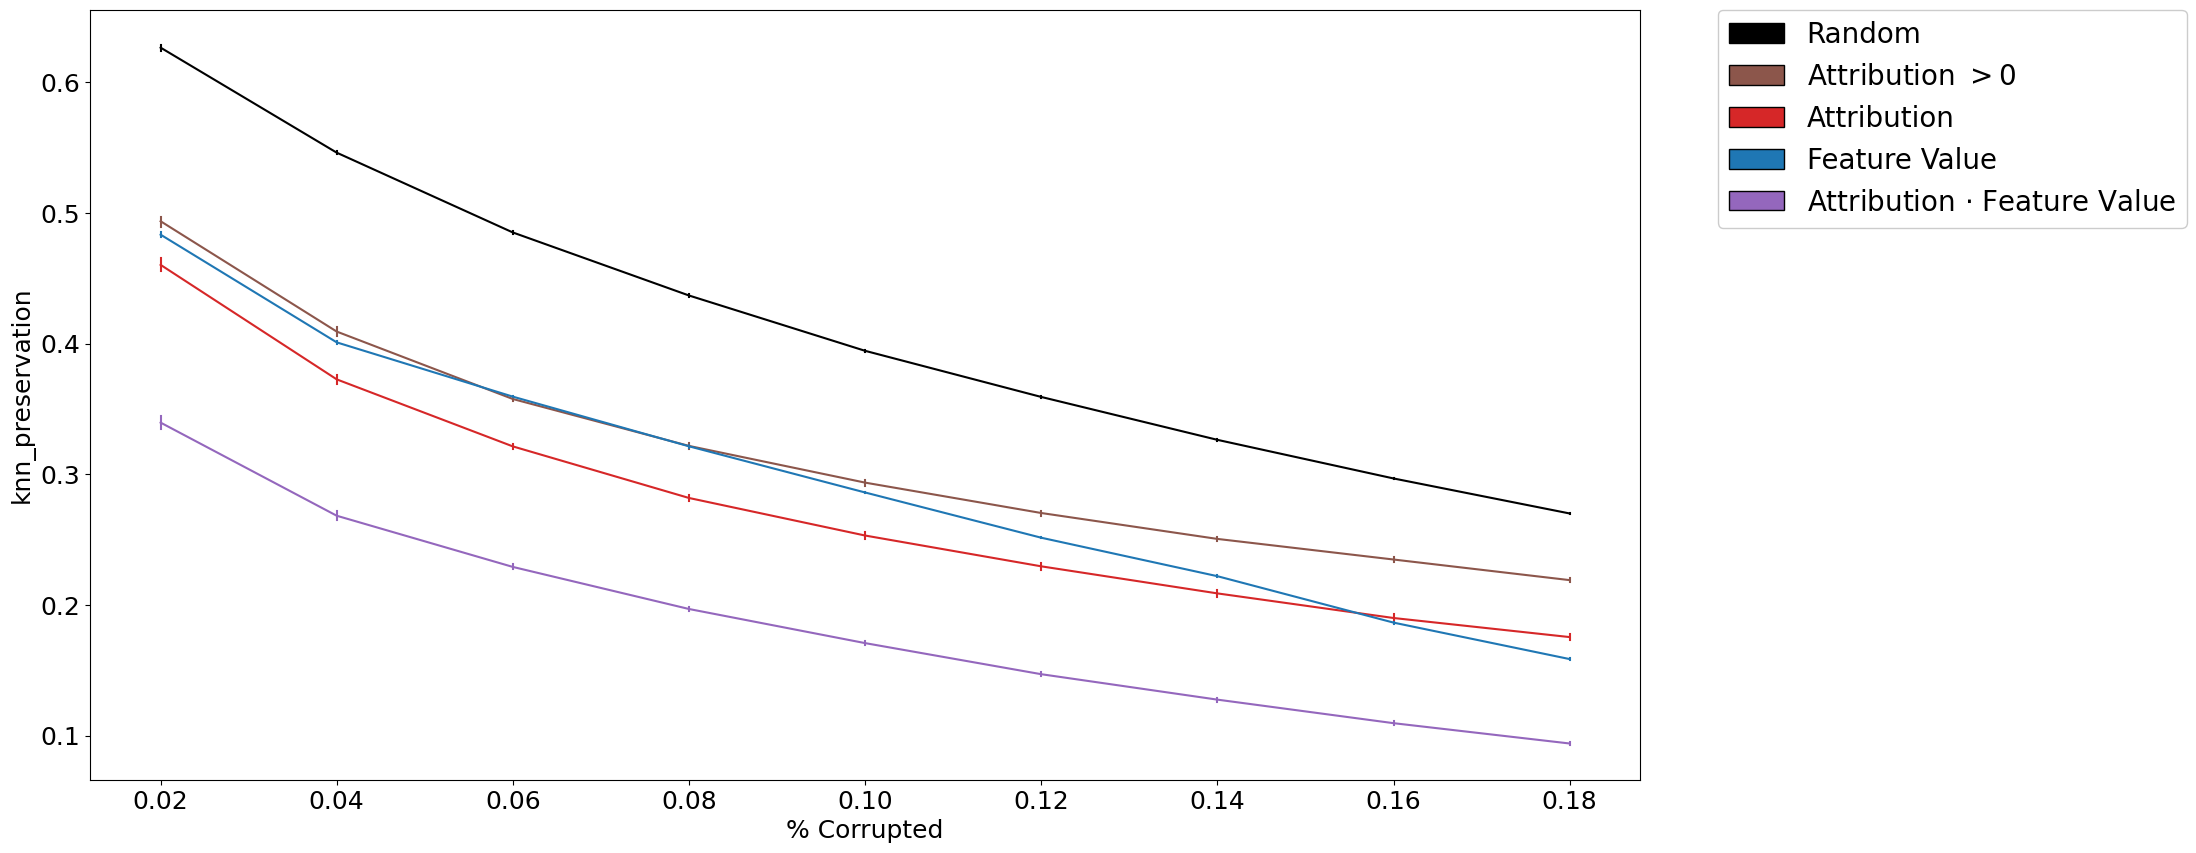

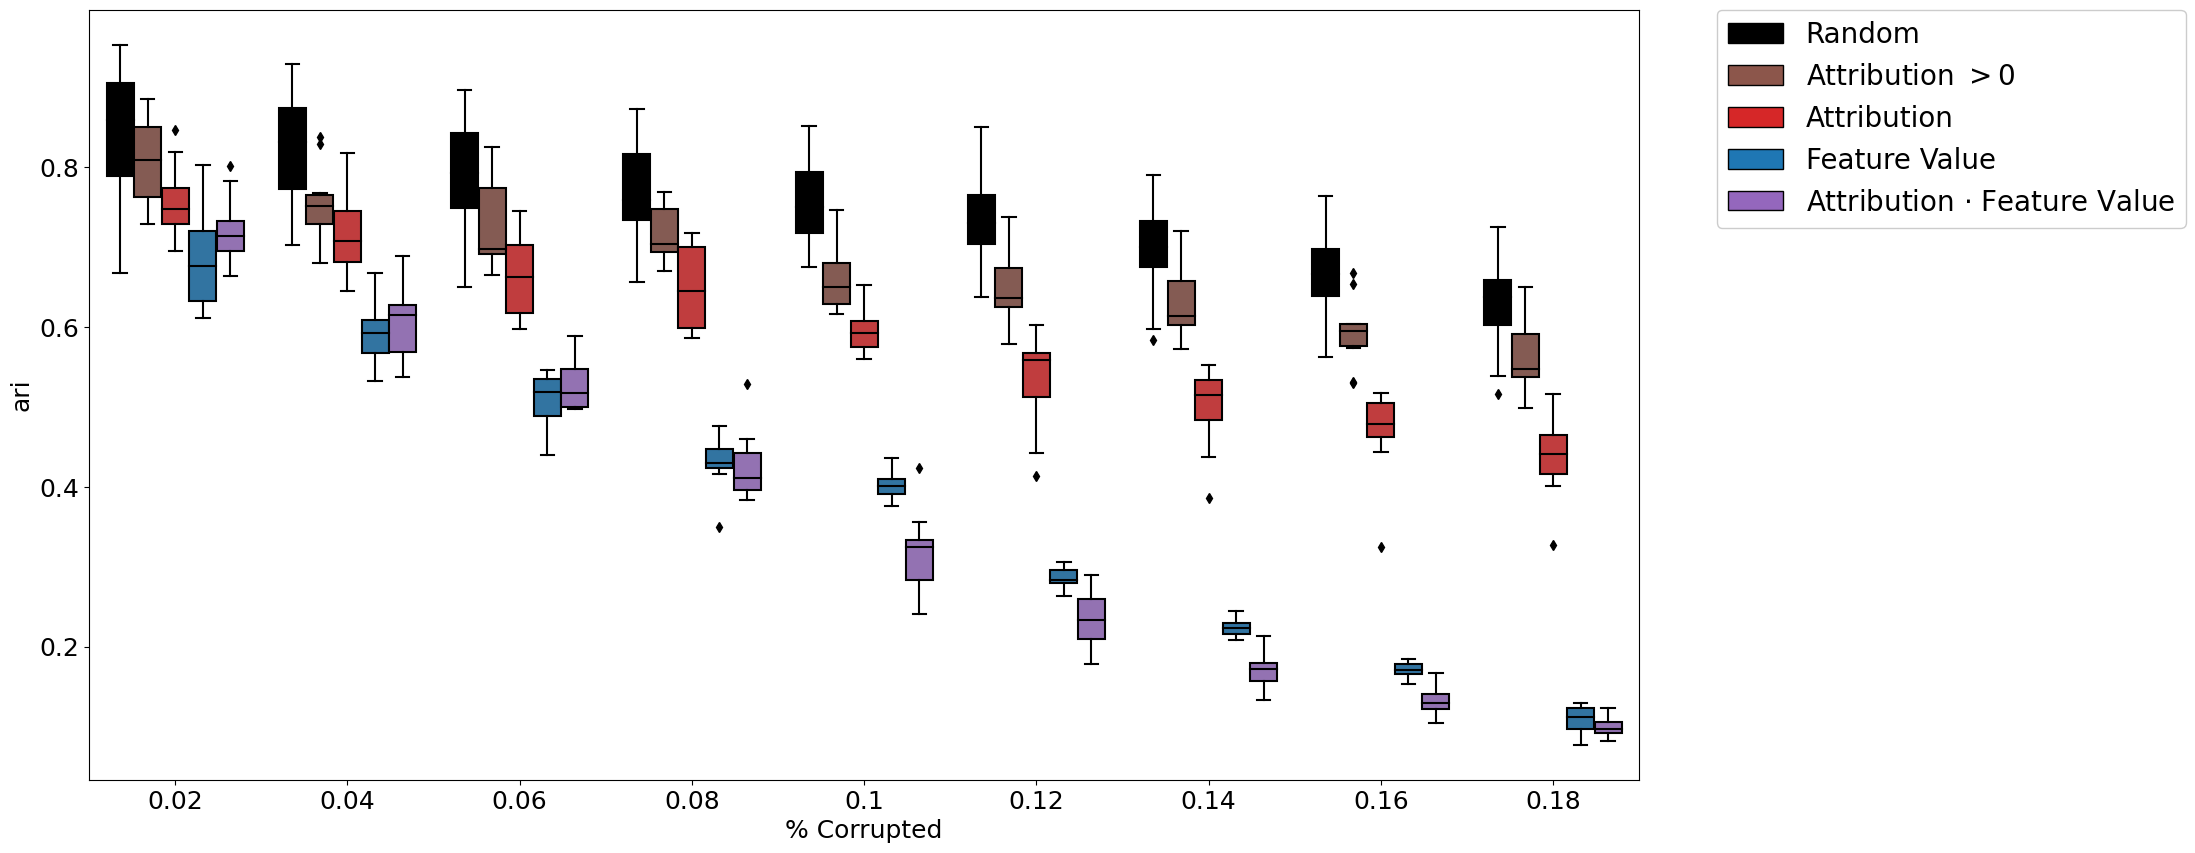

In [15]:
plot_graphs('individual', 'mean', 'kl_obj')

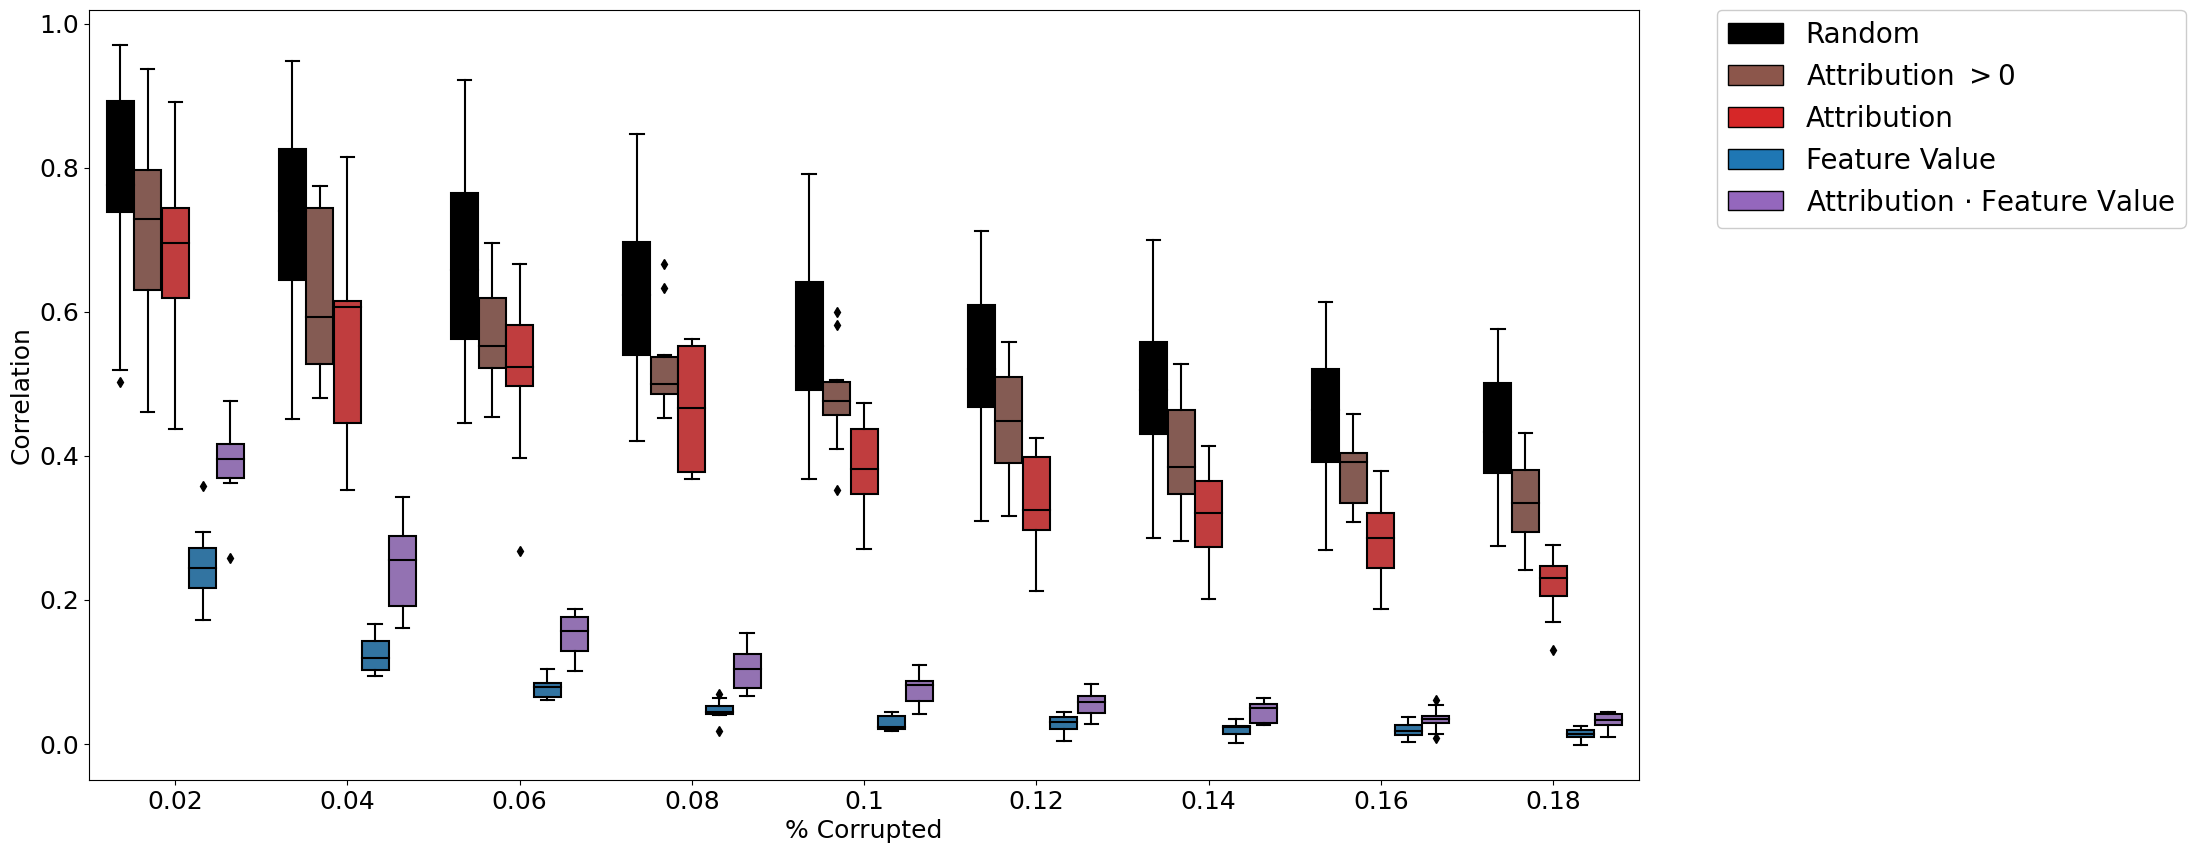

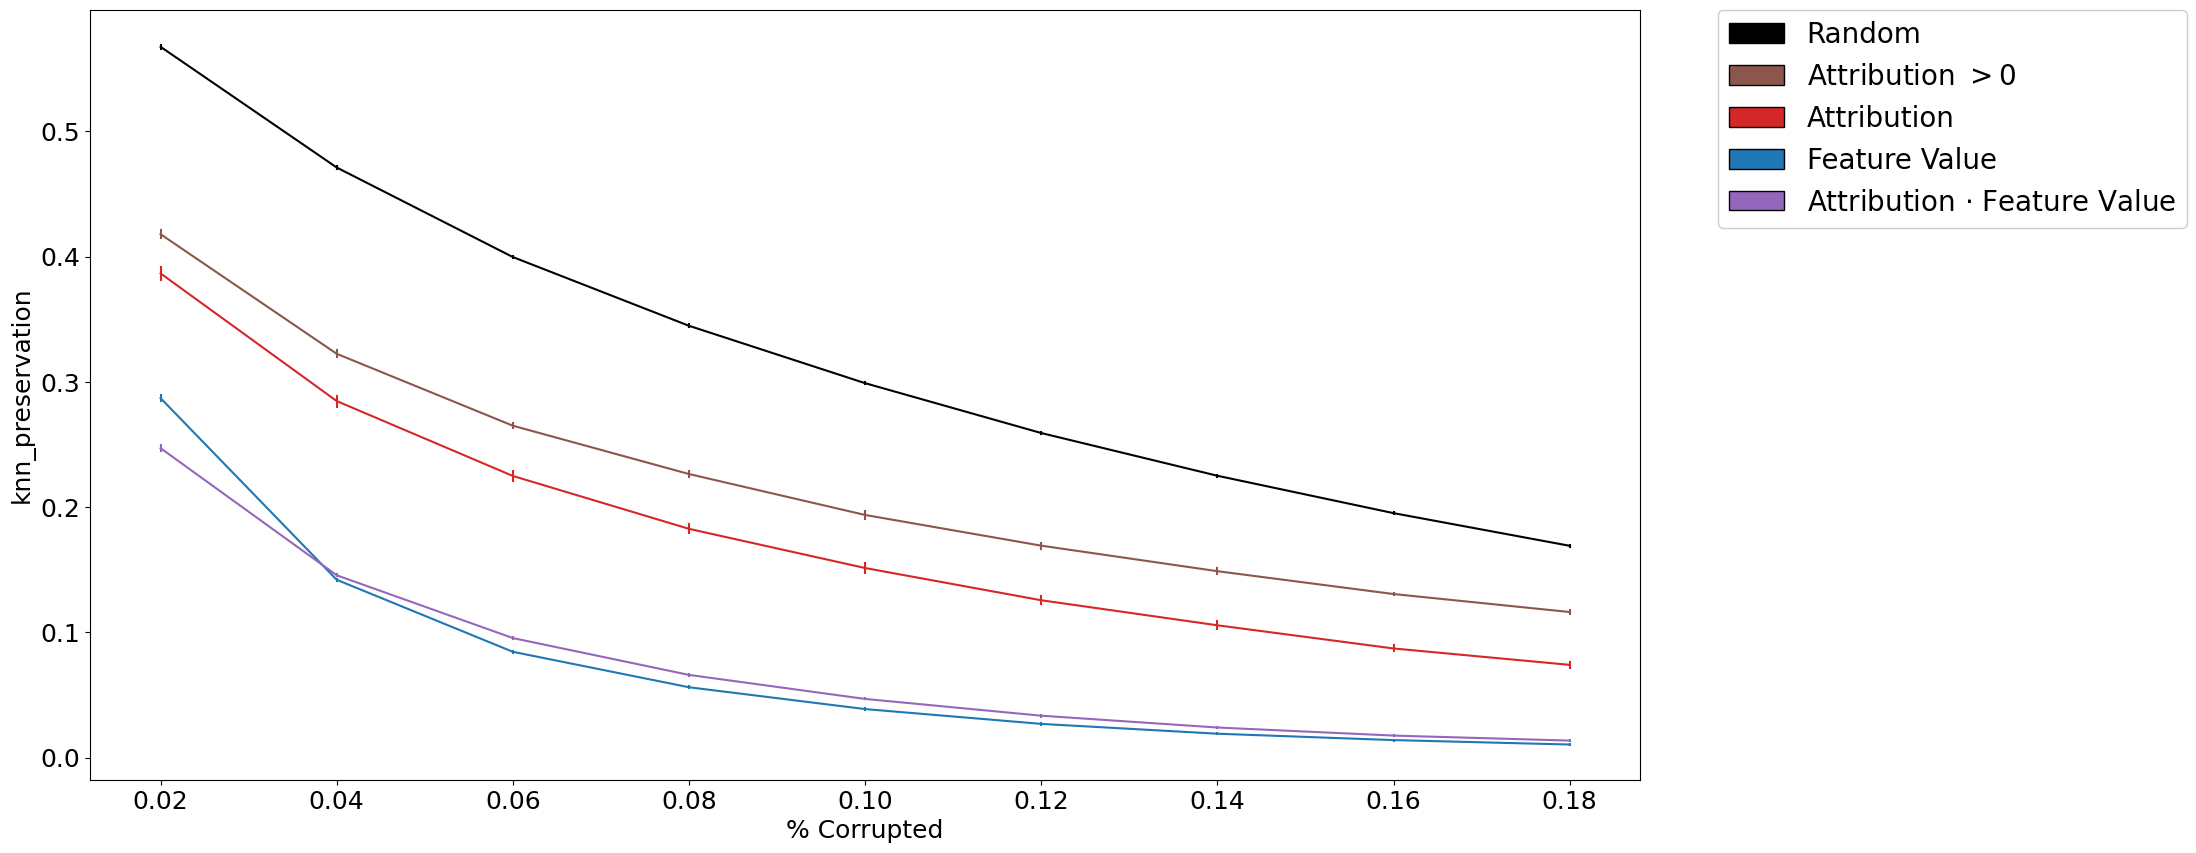

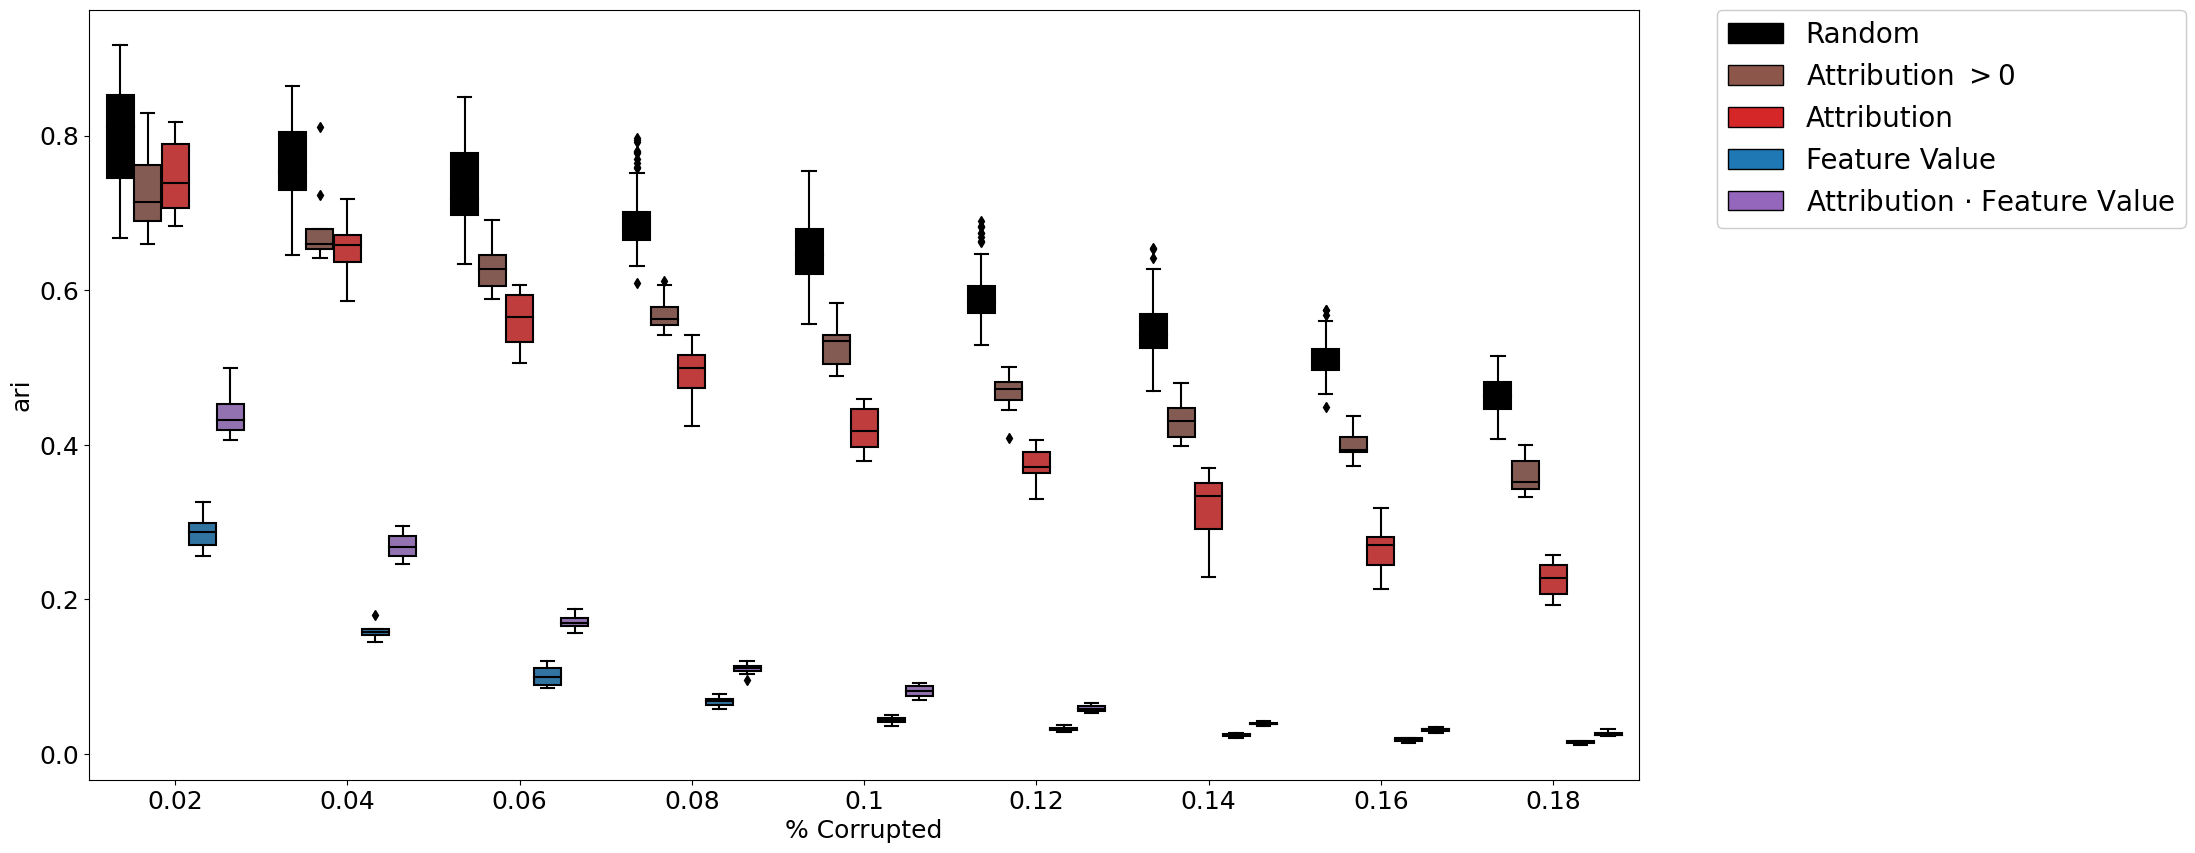

In [16]:
plot_graphs('individual', 'permute', 'kl_obj')

## Make Plot Avg Over % Corrupted

In [17]:
def make_big_summary_df():
    final_df = pd.DataFrame()
    for level in ['class', 'global', 'individual']:
        if level == 'individual':
            lname = 'indv'
        else:
            lname = level
        for method in ['mean', 'remove', 'permute']:
            for grad_style in ['grad_norm', 'kl_obj']:
                try:
                    df = pd.read_csv('../results/{}_feats_method={}_grad_style={}/attr_exp_results_{}_feats_full.csv'.format(lname, method, grad_style, level), 
                                     index_col=0)

                    to_plot = df.groupby(['Index', 'Run_id'])['Correlation', 'knn_preservation', 'ari'].mean()
                    #to_plot = df.groupby(['Index'])['Correlation', 'knn_preservation', 'ari'].mean()
                    #to_plot[['grad_style', 'method']] = df.groupby(['Index'])['grad_style', 'method'].first()
                    to_plot[['grad_style', 'method']] = df.groupby(['Index', 'Run_id'])['grad_style', 'method'].first()
                    to_plot['level'] = level
                    to_plot = to_plot.reset_index().melt(id_vars=['grad_style', 'method', 'level', 'Index', 'Run_id'])
                    final_df = pd.concat([final_df, to_plot])
                    print('Processed ../results/{}_feats_method={}_grad_style={}/attr_exp_results_{}_feats_full.csv'.format(lname, method, grad_style, level))
                except:
                    # Dont worry, not all combinations are valid (e.g. no remove + indv)!
                    print('Could not process ../results/{}_feats_method={}_grad_style={}/attr_exp_results_{}_feats_full.csv'.format(lname, method, grad_style, level))
                    pass

    return final_df

In [18]:
big_df = make_big_summary_df()


Processed ../results/class_feats_method=mean_grad_style=grad_norm/attr_exp_results_class_feats_full.csv
Processed ../results/class_feats_method=mean_grad_style=kl_obj/attr_exp_results_class_feats_full.csv
Could not process ../results/class_feats_method=remove_grad_style=grad_norm/attr_exp_results_class_feats_full.csv
Could not process ../results/class_feats_method=remove_grad_style=kl_obj/attr_exp_results_class_feats_full.csv
Processed ../results/class_feats_method=permute_grad_style=grad_norm/attr_exp_results_class_feats_full.csv
Processed ../results/class_feats_method=permute_grad_style=kl_obj/attr_exp_results_class_feats_full.csv
Could not process ../results/global_feats_method=mean_grad_style=grad_norm/attr_exp_results_global_feats_full.csv
Could not process ../results/global_feats_method=mean_grad_style=kl_obj/attr_exp_results_global_feats_full.csv
Processed ../results/global_feats_method=remove_grad_style=grad_norm/attr_exp_results_global_feats_full.csv
Processed ../results/globa

/tmp/ipykernel_2521997/1011898120.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  to_plot = df.groupby(['Index', 'Run_id'])['Correlation', 'knn_preservation', 'ari'].mean()
/tmp/ipykernel_2521997/1011898120.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  to_plot[['grad_style', 'method']] = df.groupby(['Index', 'Run_id'])['grad_style', 'method'].first()


In [19]:
def make_barplot(df, level, grad_style, method, fig_path=None):
    if level == 'class':
        levels_index=['random', 'top_ls_class_p_matrix', 'top_ls_class_q_matrix', 'top_attr_unif_class', 'top_feat_class', 'top_attr_times_feat_unif_class']
        level_names=['Random', 'Top Laplace Score Per Class (using P)', 'Top Laplace Score Per Class (using Q)', 'Top Attribution Per Class', 'Top Feature Value Per Class', 'Top Attribution $\cdot$ Feature Value Per Class']
    elif level == 'global':
        levels_index=['random', 'top_fs', 'top_pc', 'top_ls_p_matrix', 'top_ls_q_matrix', 'top_feat', 'top_attr_unif', 'top_attr_times_feat_unif']
        level_names=['Random', 'Top Fisher Score', 'Top PC', 'Top Laplace Score (Using P)', 'Top Laplace Score (Using Q)', 'Top Feature Value', 'Attribution', 'Attribution $\cdot$ Feature Value'] 
    elif level == 'individual':
        levels_index=['random', 'top_attr_ge_0', 'top_attr', 'feat_size', 'attr_feat']
        level_names=['Random', 'Attribution $>0$', 'Attribution', 'Feature Value', 'Attribution $\cdot$ Feature Value']
    cmap = {}
    colors = []
    for _level in levels_index:
        cmap[_level] = cmap2[_level]
        colors.append(cmap2[_level])
        
    if level == 'individual':
        lname = 'indv'
    else:
        lname = level
    
    if fig_path is None:
        fig_path='../figures/{}_feats_method={}_grad_style={}/{}_barplots_all.png'.format(lname, method, grad_style, level)

    fig, ax = plt.subplots(figsize=(20, 10))

    legend_elements = [Patch(facecolor=color, edgecolor='black', label='Color Patch') for color in colors]
    
    ax.set_yscale('log')

    # Create the figure
    _ = sns.barplot(data=df[(df['level']==level) & ((df['grad_style']==grad_style) | df['grad_style'].isnull()) & (df['method']==method)],
                    x="variable", 
                    y="value", 
                    hue="Index", 
                    palette=cmap, 
                    hue_order=levels_index, 
                    ax=ax)#,
                    #errorbar=None
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    _ = plt.legend(handles=legend_elements, prop={'size': 20}, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,
                   labels=level_names,
                   framealpha=1)
    fig.savefig(fig_path, dpi=600, bbox_inches='tight')

### Permuting

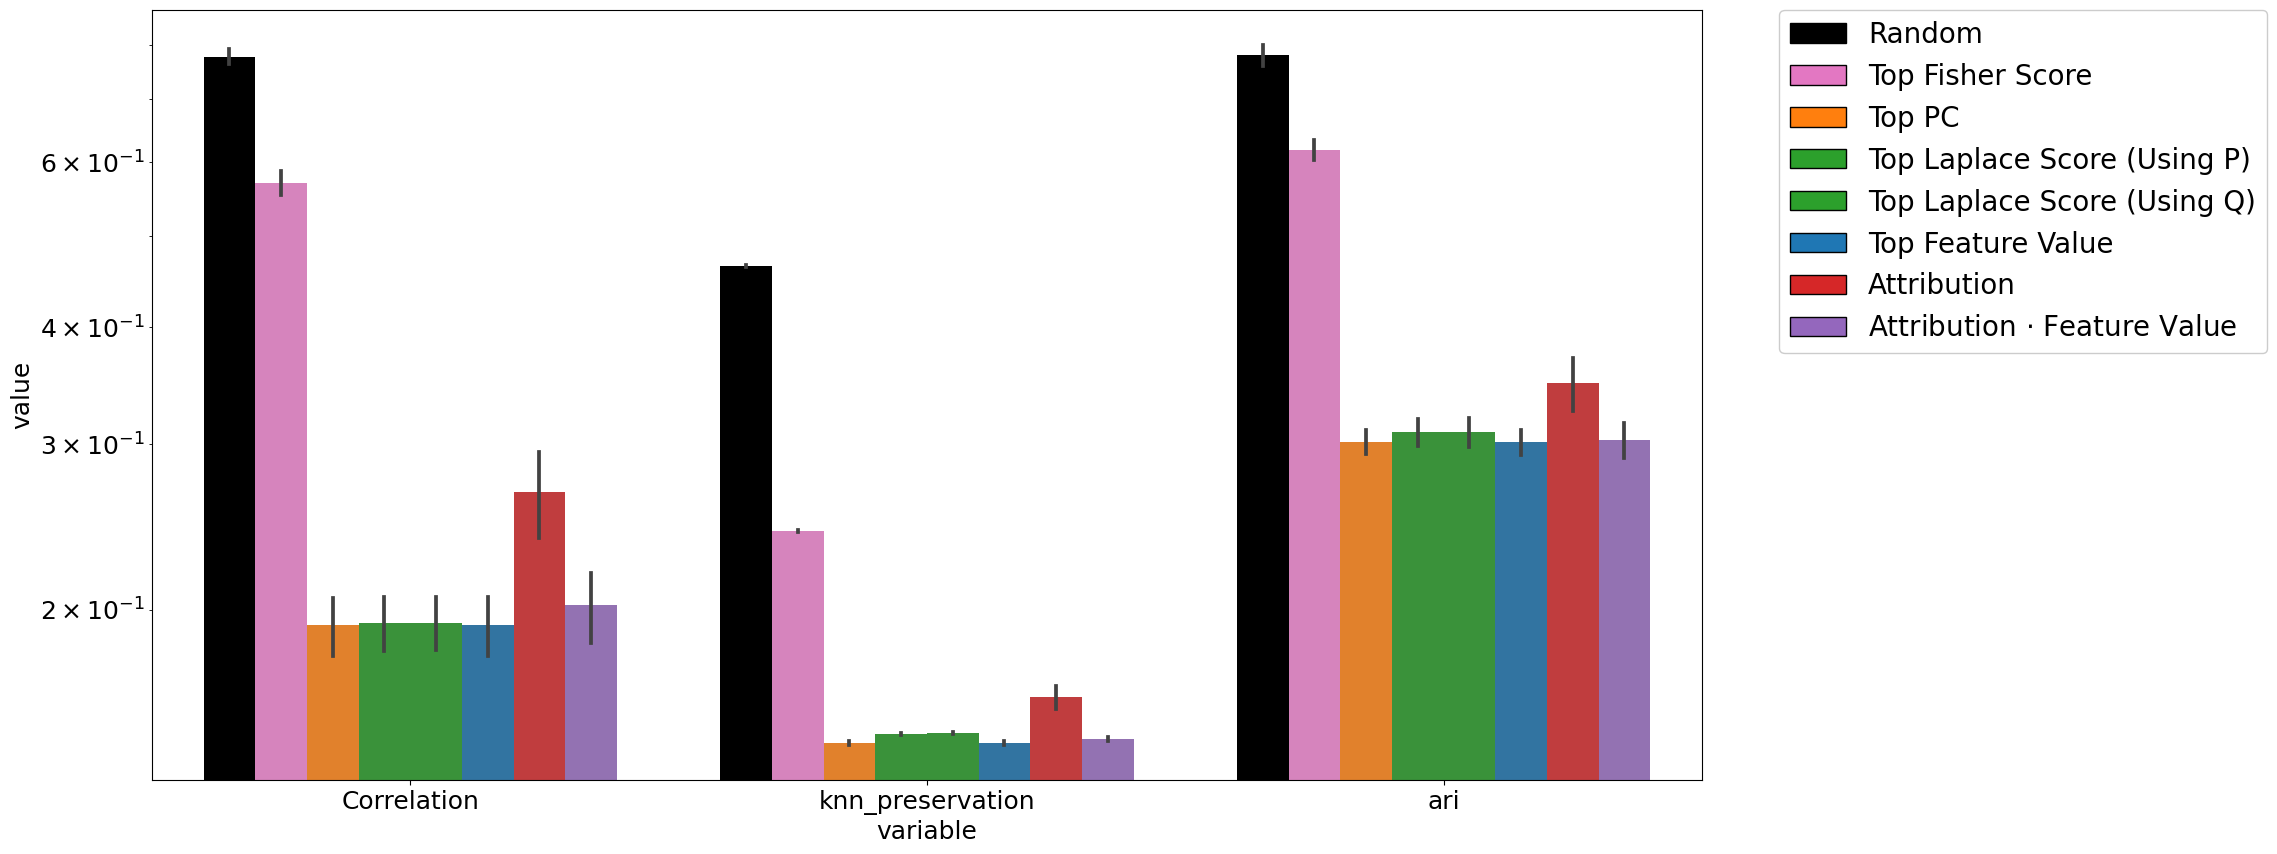

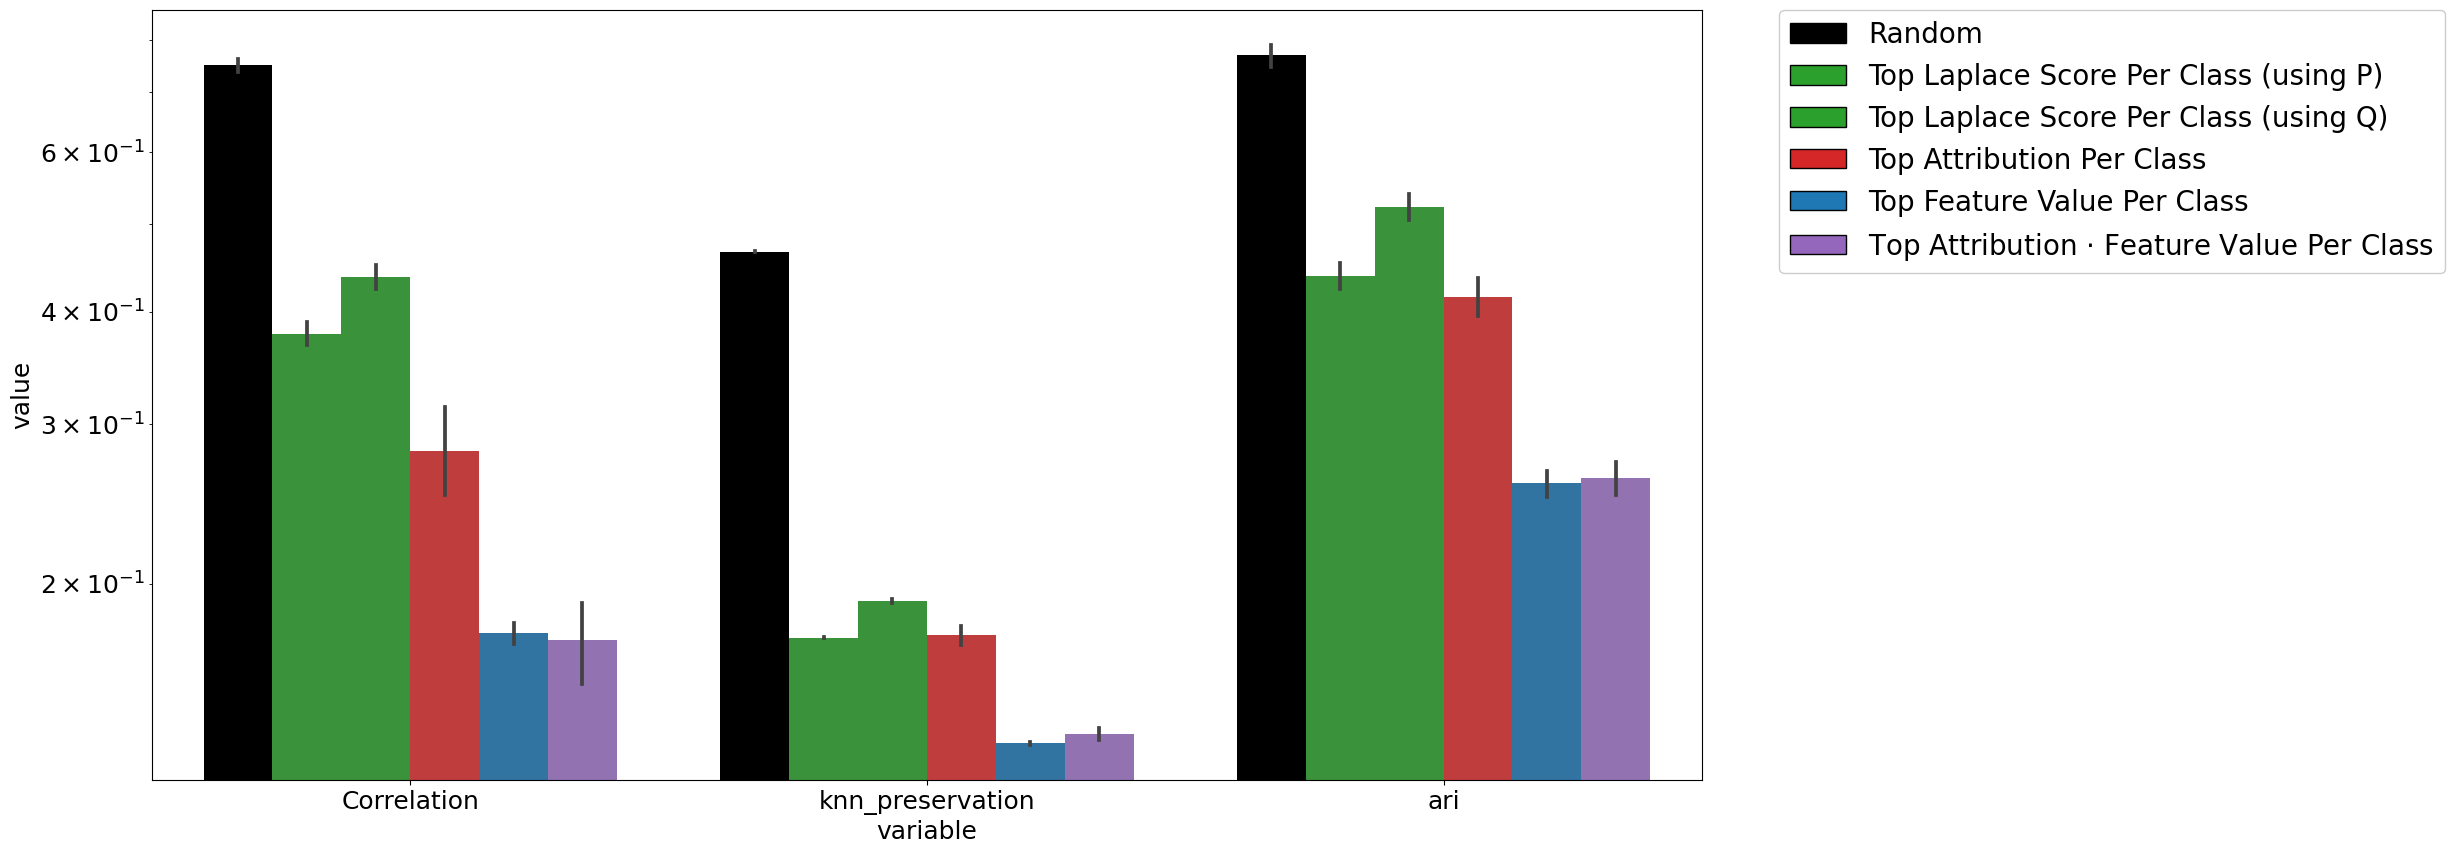

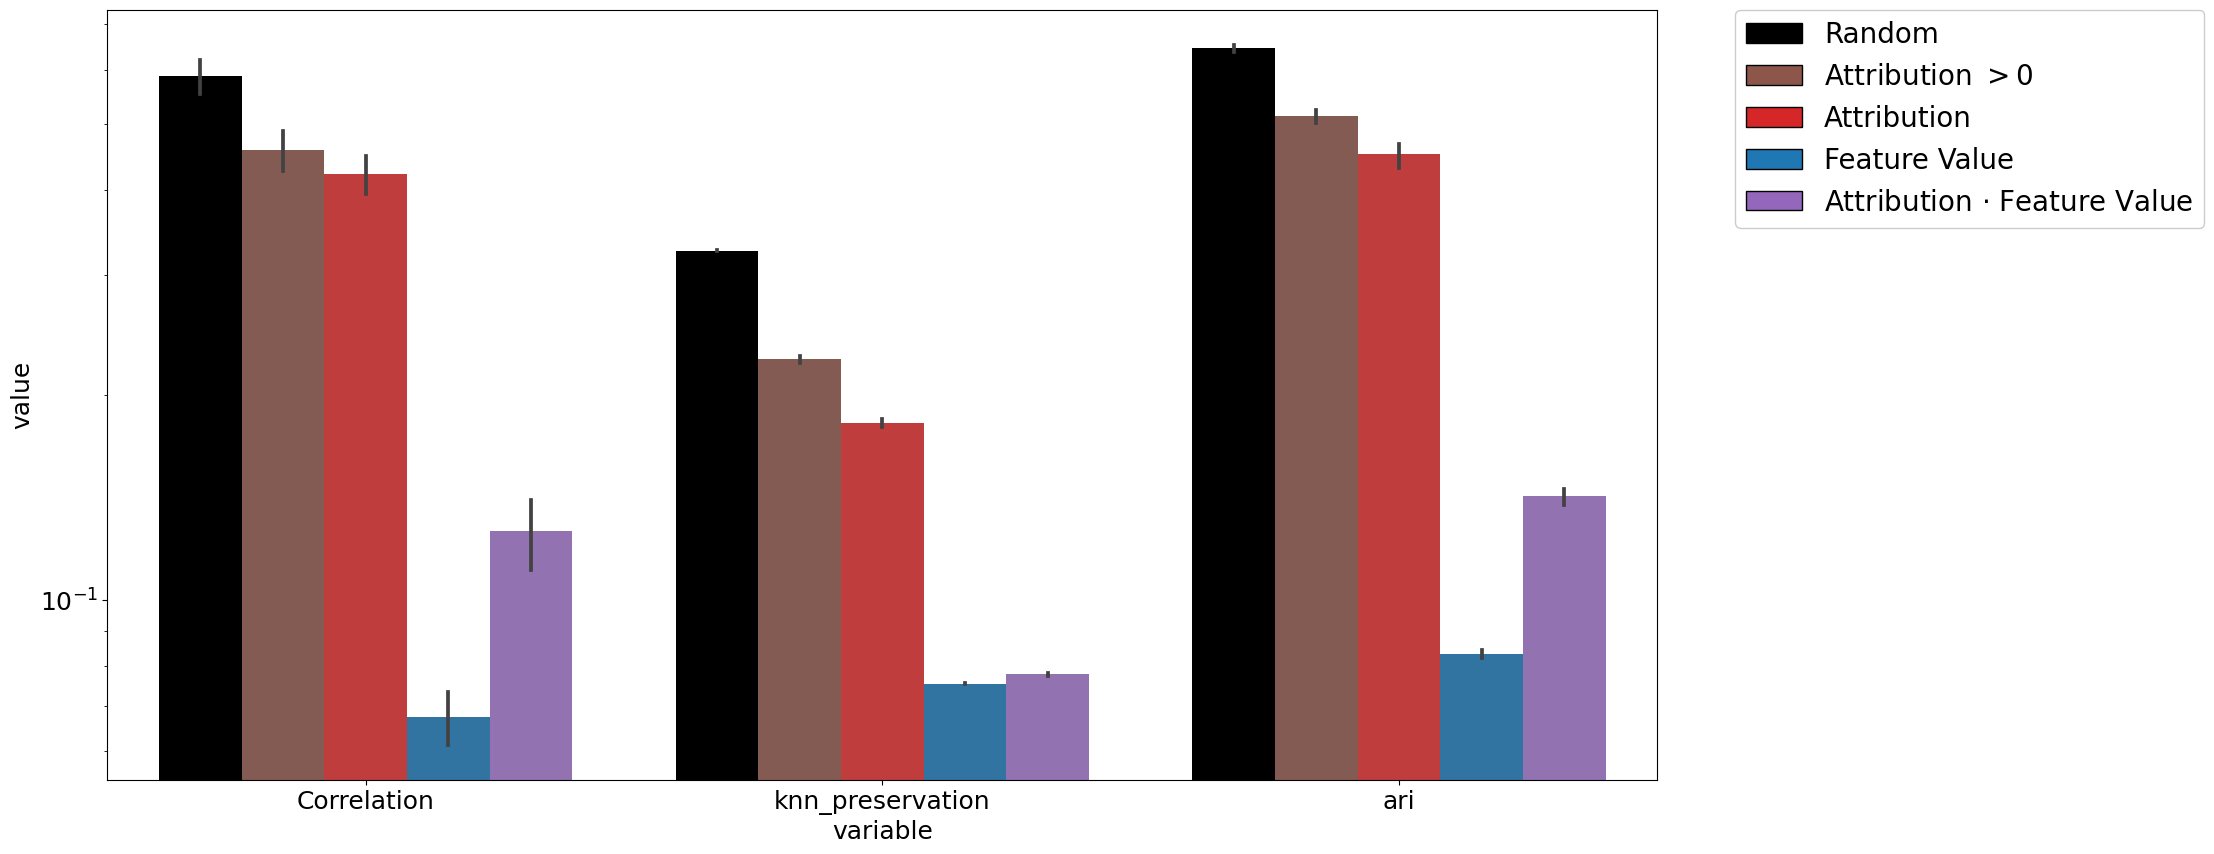

In [20]:
make_barplot(big_df, 'global', 'grad_norm', 'permute')
make_barplot(big_df, 'class', 'grad_norm', 'permute')
make_barplot(big_df, 'individual', 'grad_norm', 'permute')

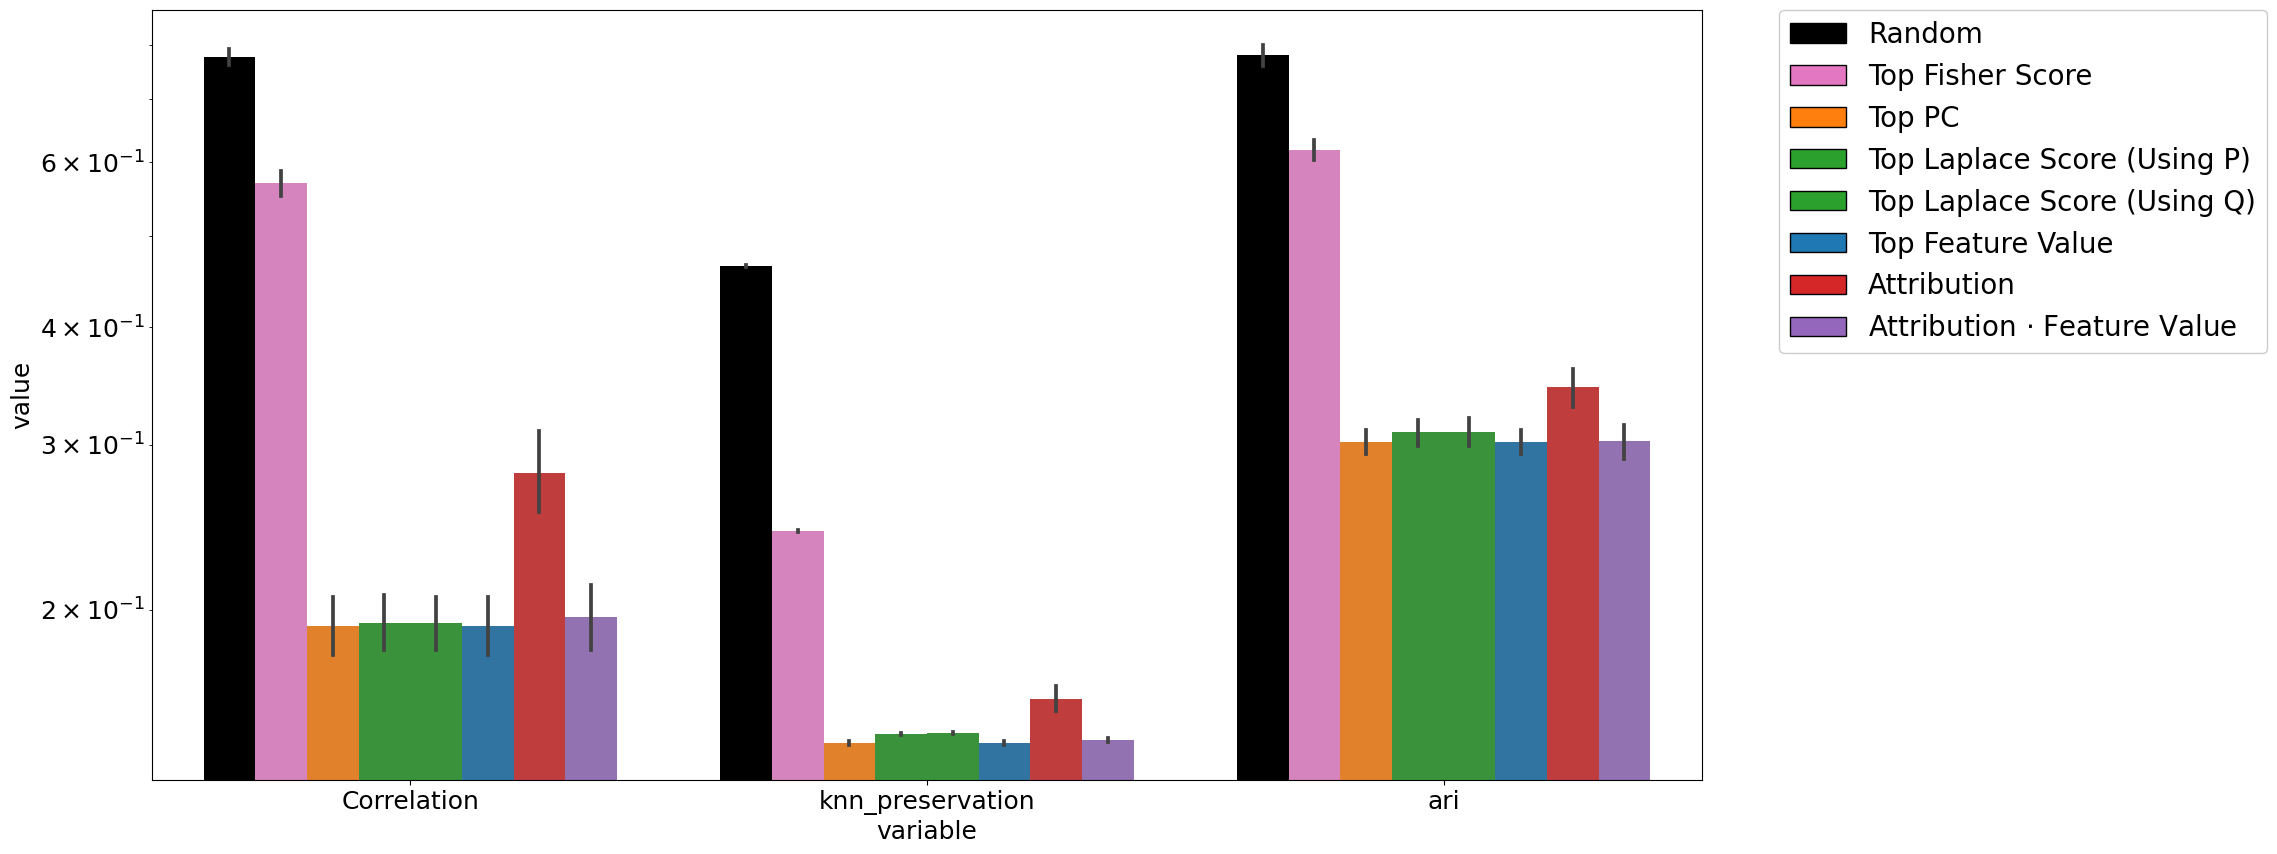

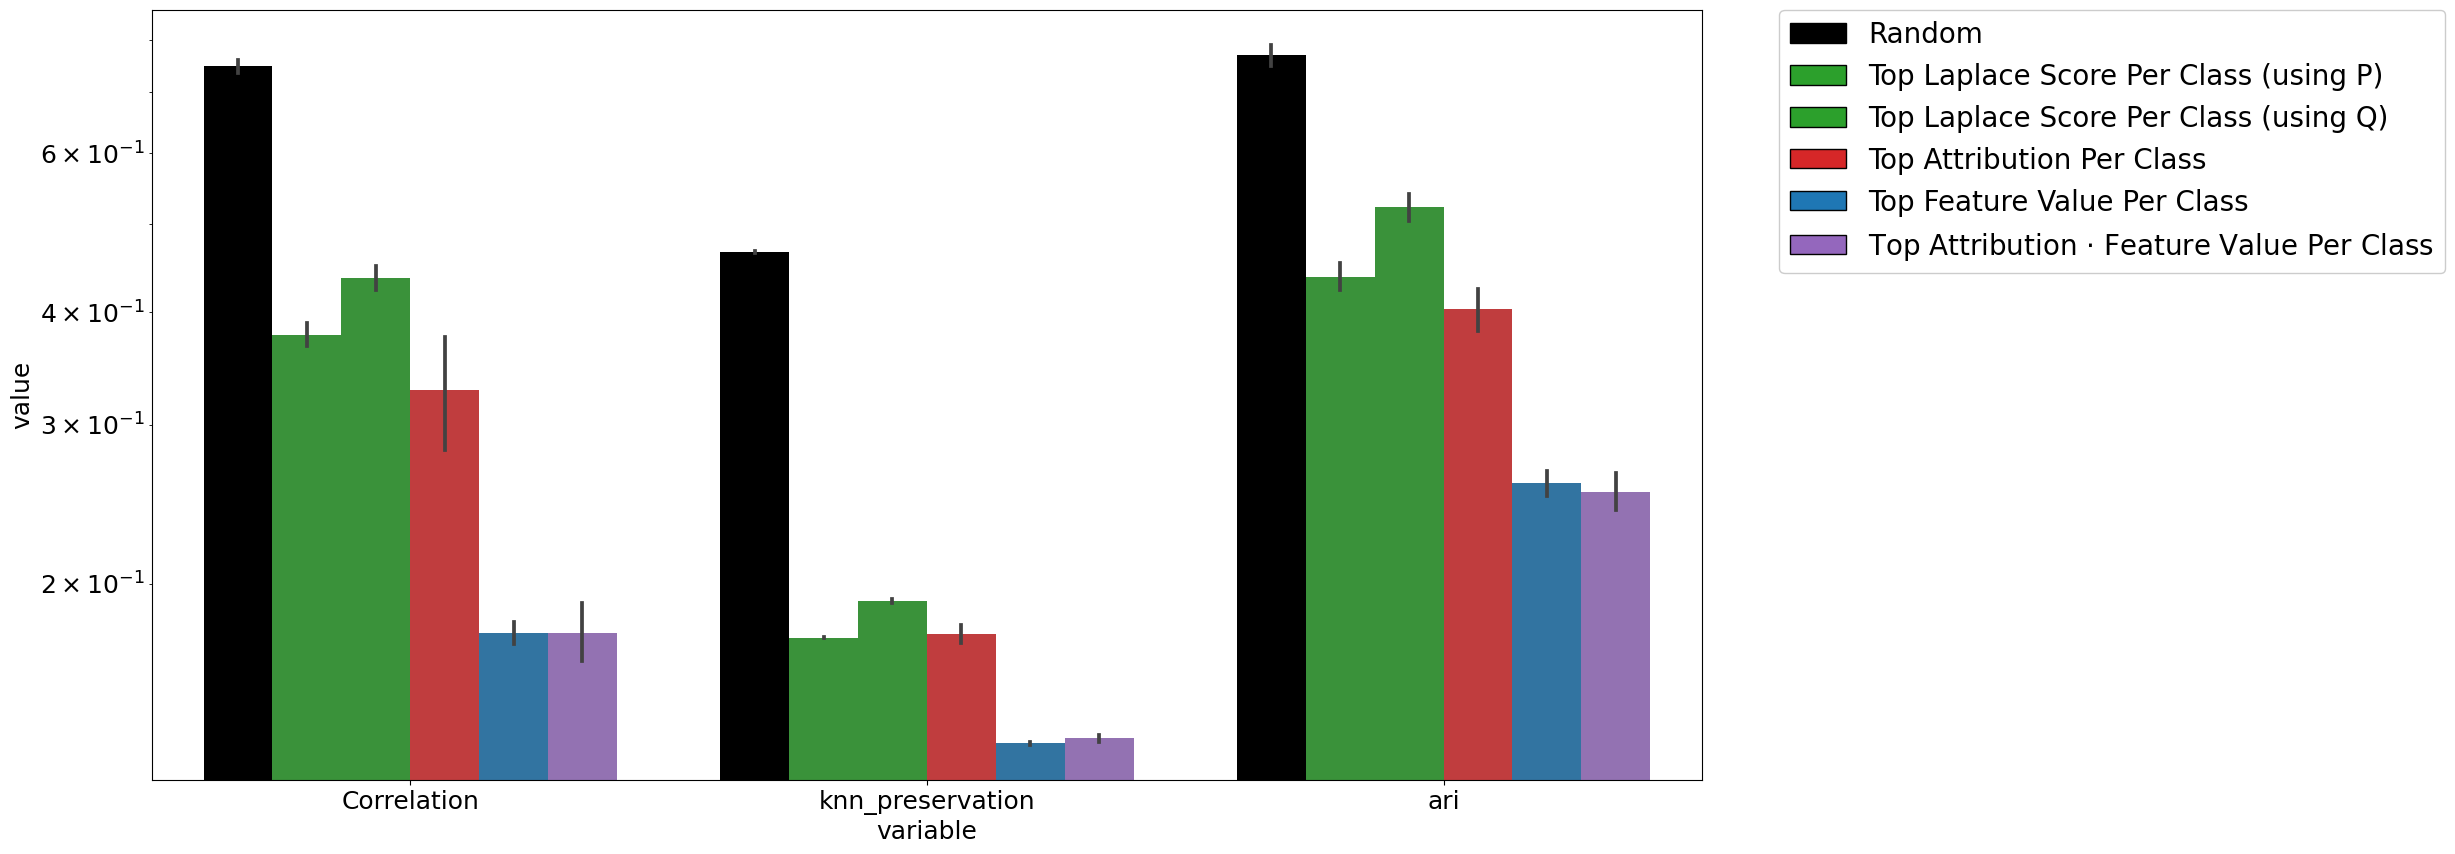

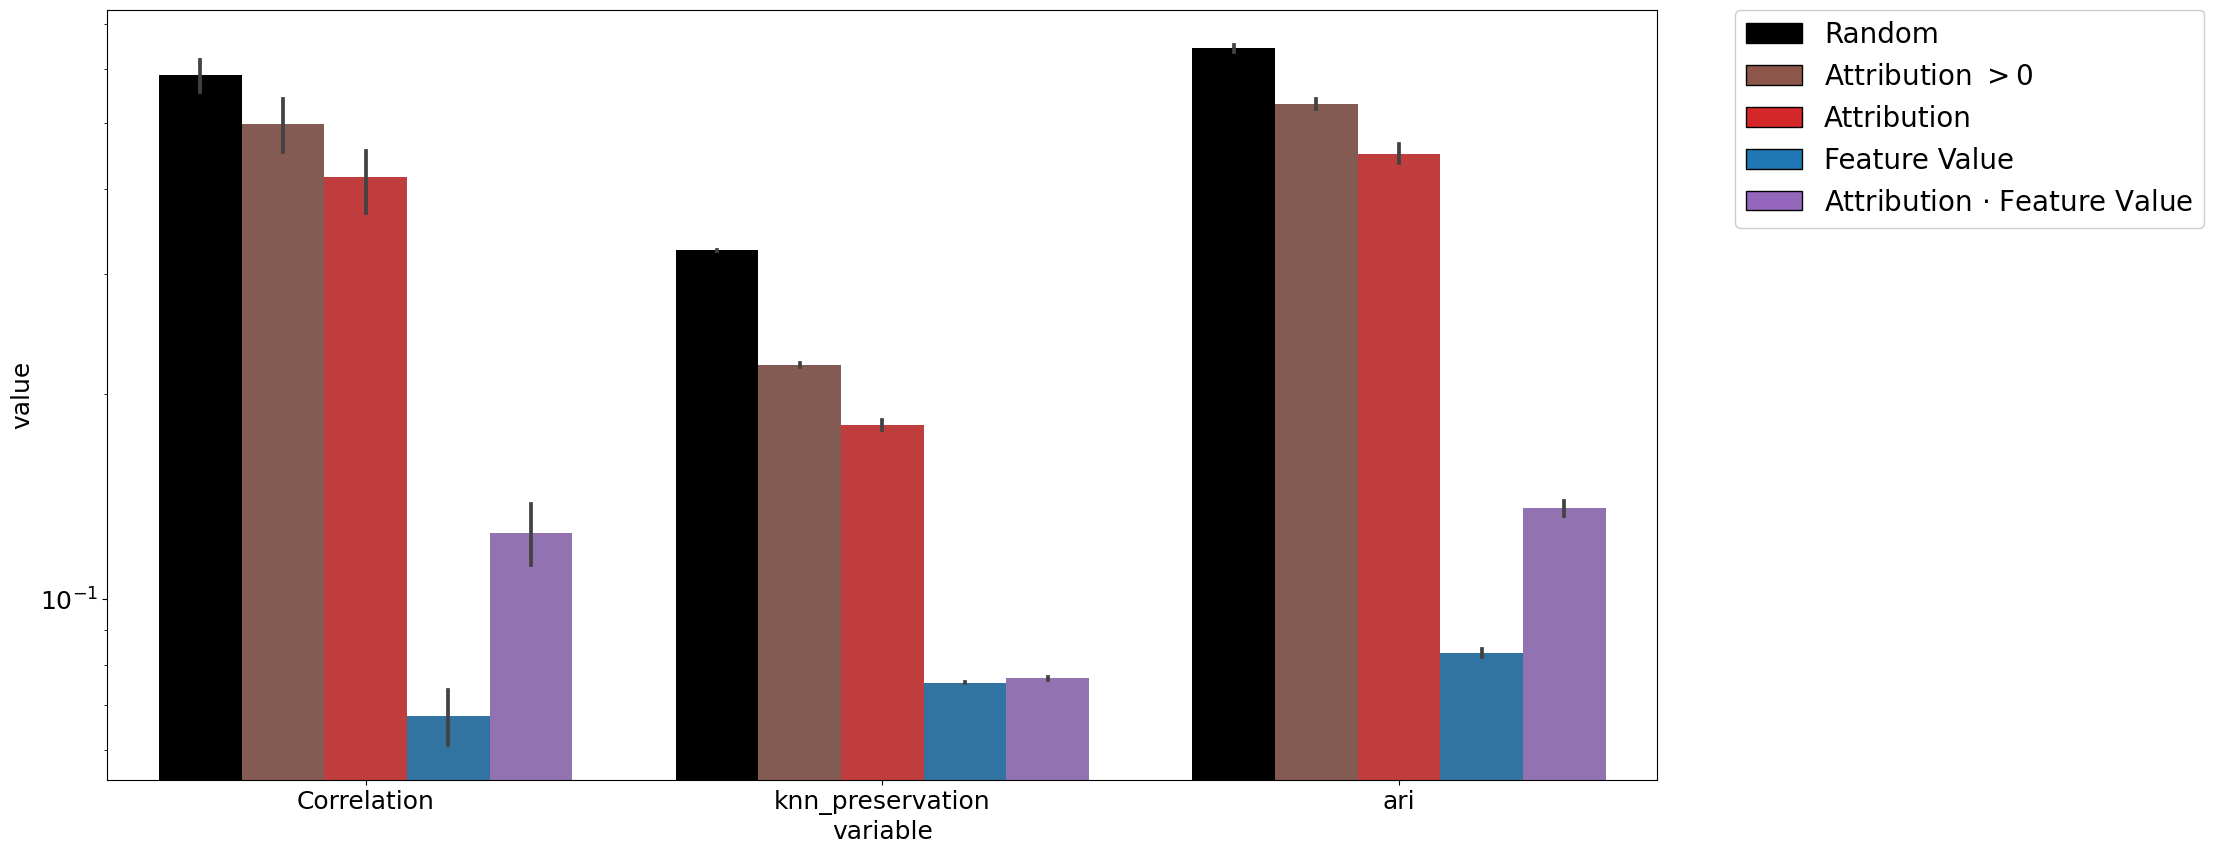

In [21]:
make_barplot(big_df, 'global', 'kl_obj', 'permute')
make_barplot(big_df, 'class', 'kl_obj', 'permute')
make_barplot(big_df, 'individual', 'kl_obj', 'permute')

### Mean / Removing

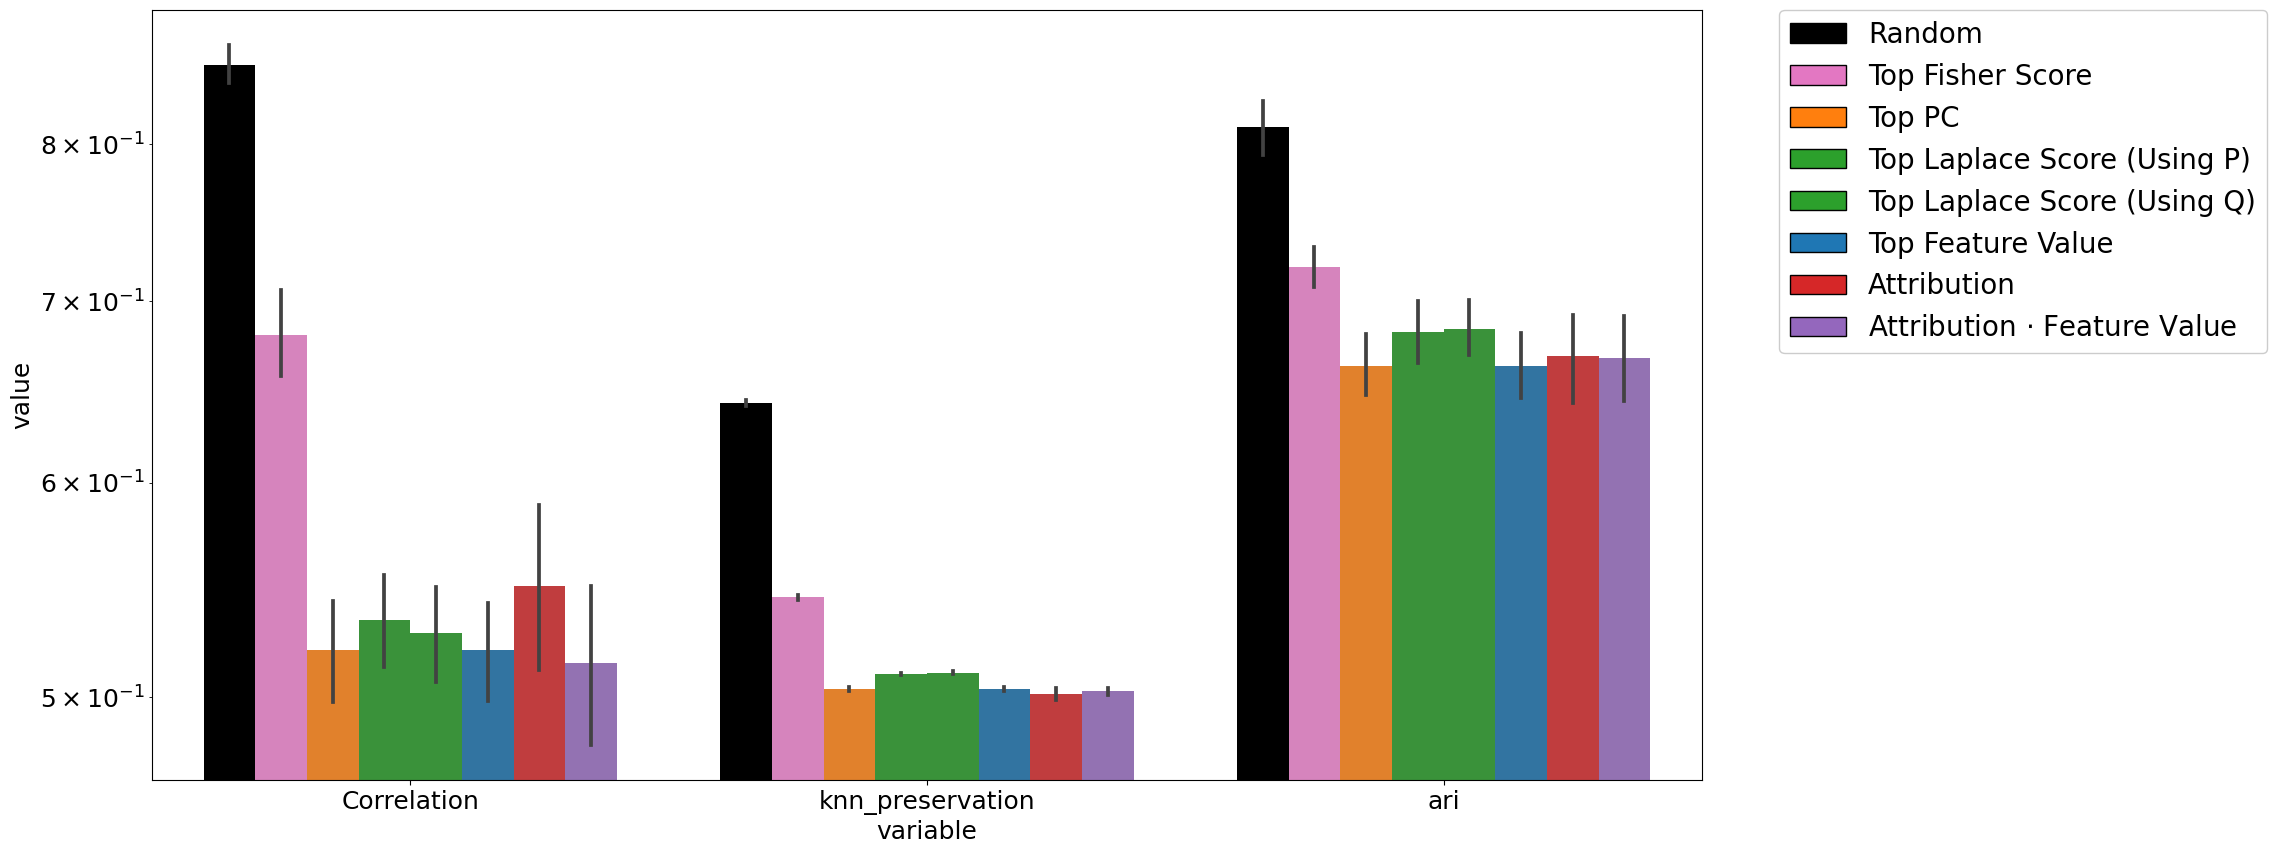

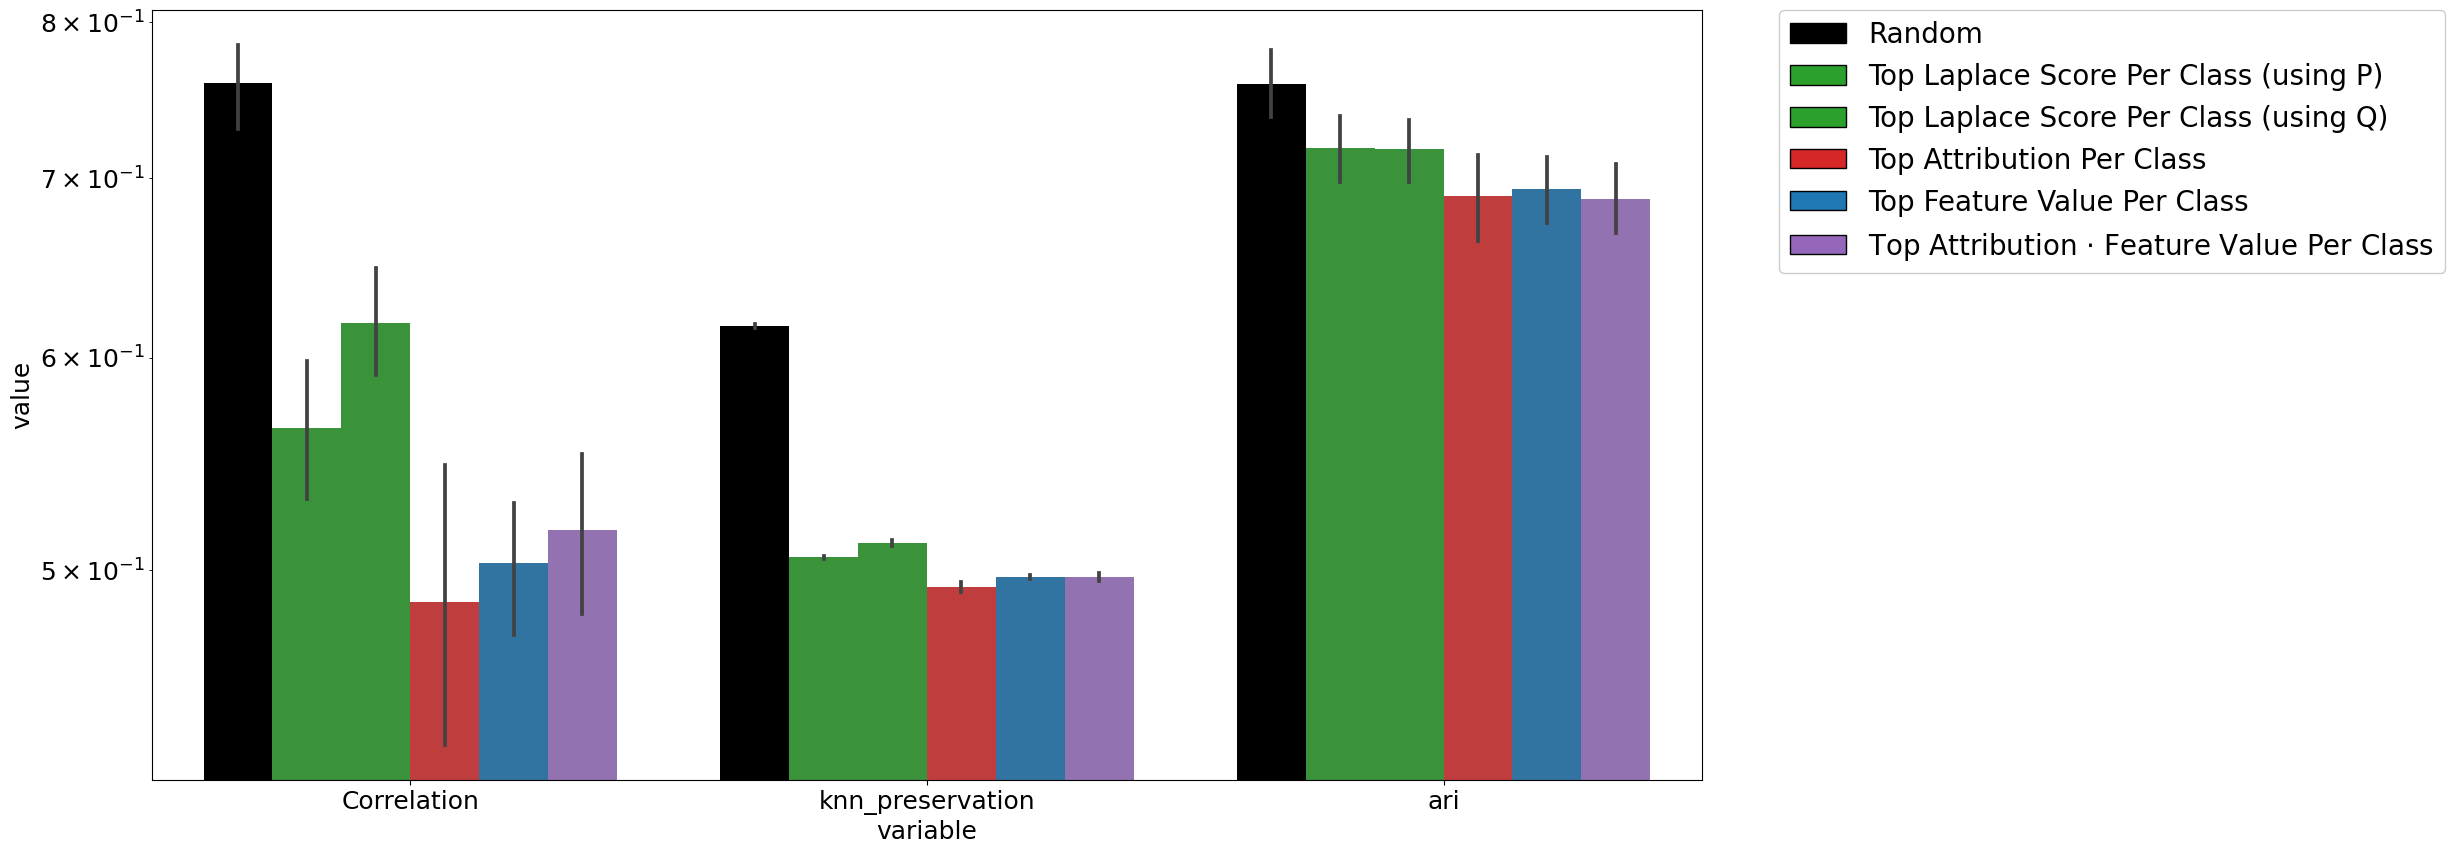

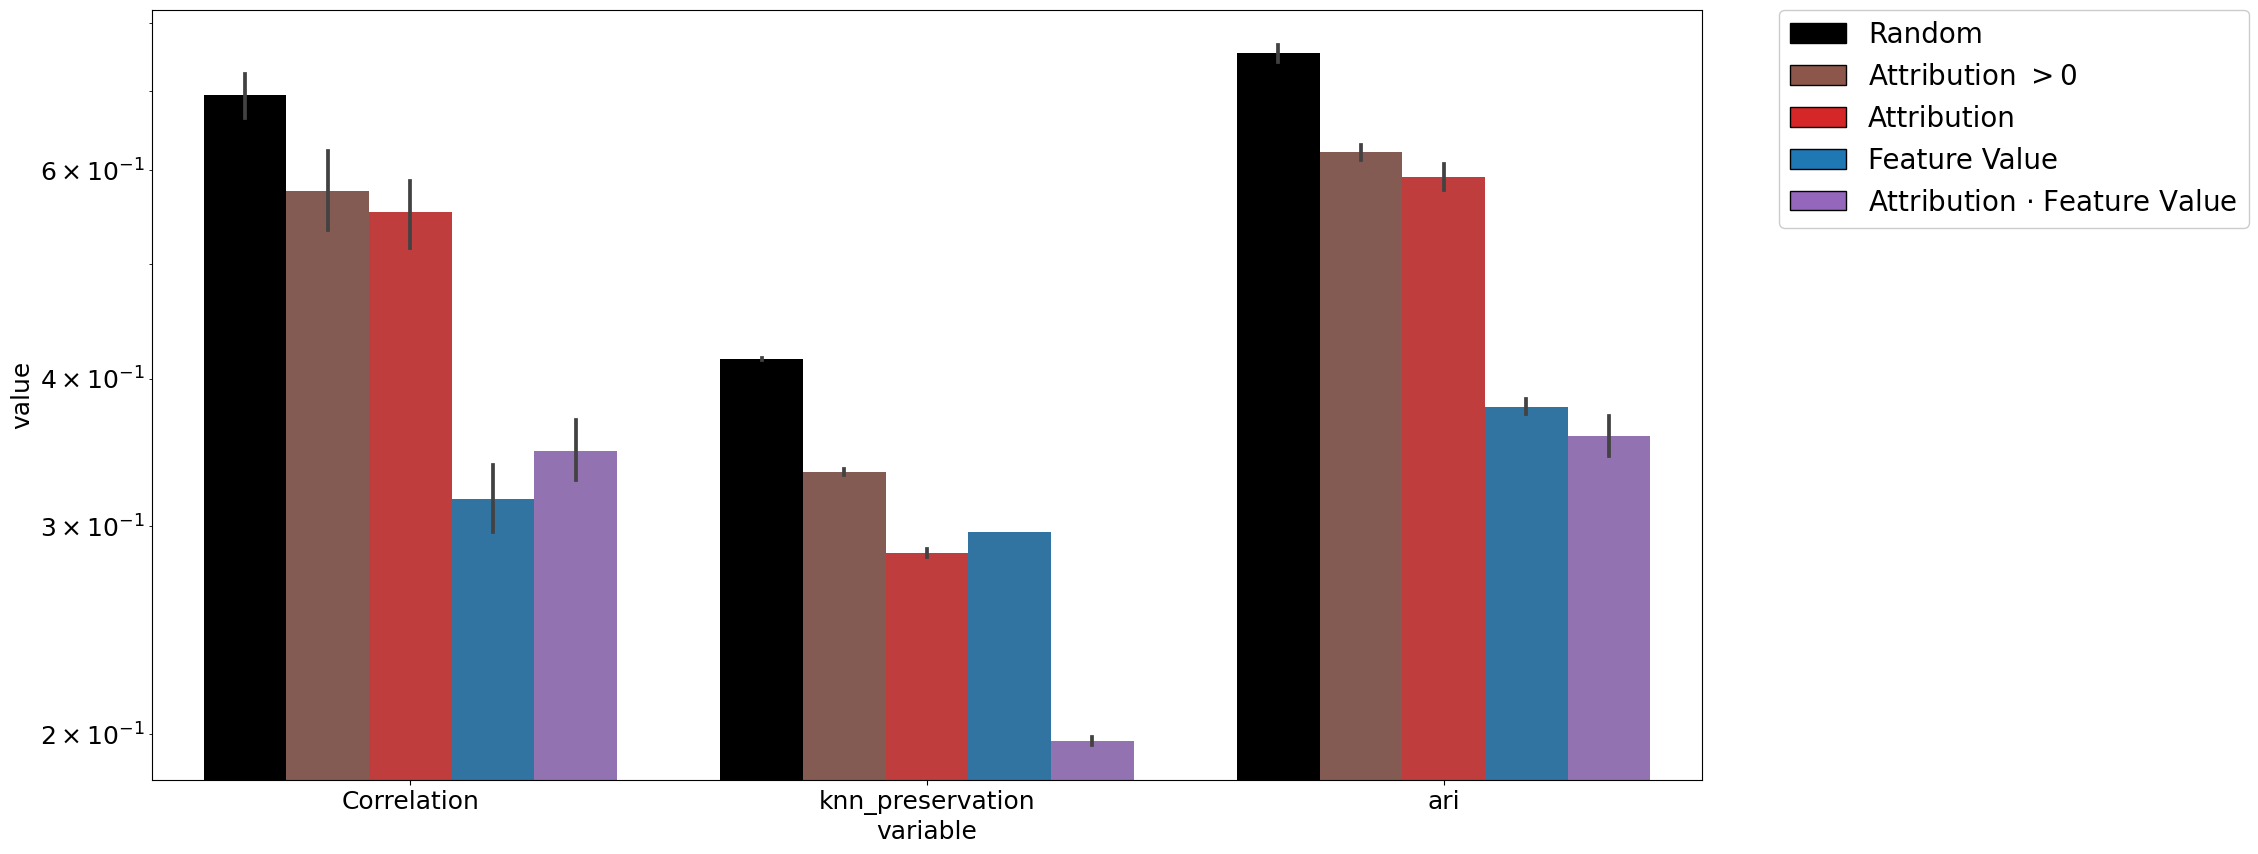

In [22]:
make_barplot(big_df, 'global', 'grad_norm', 'remove')
make_barplot(big_df, 'class', 'grad_norm', 'mean')
make_barplot(big_df, 'individual', 'grad_norm', 'mean')

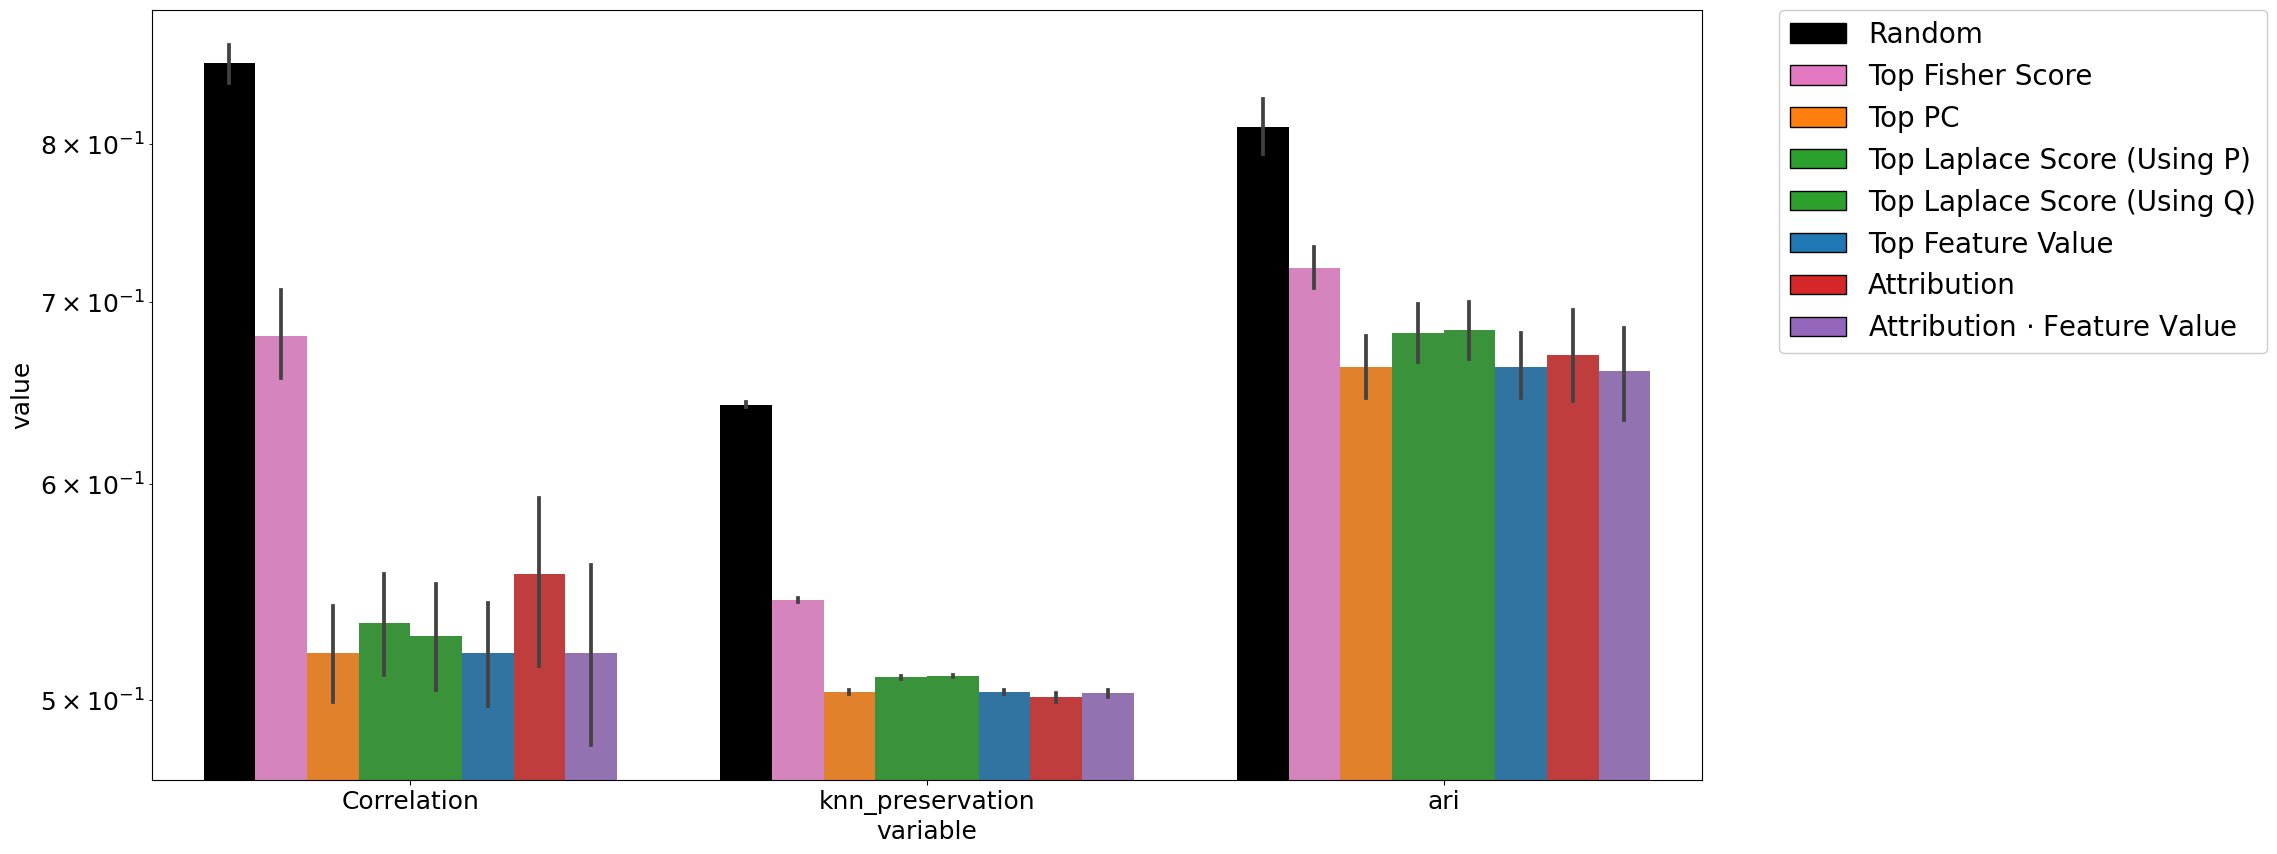

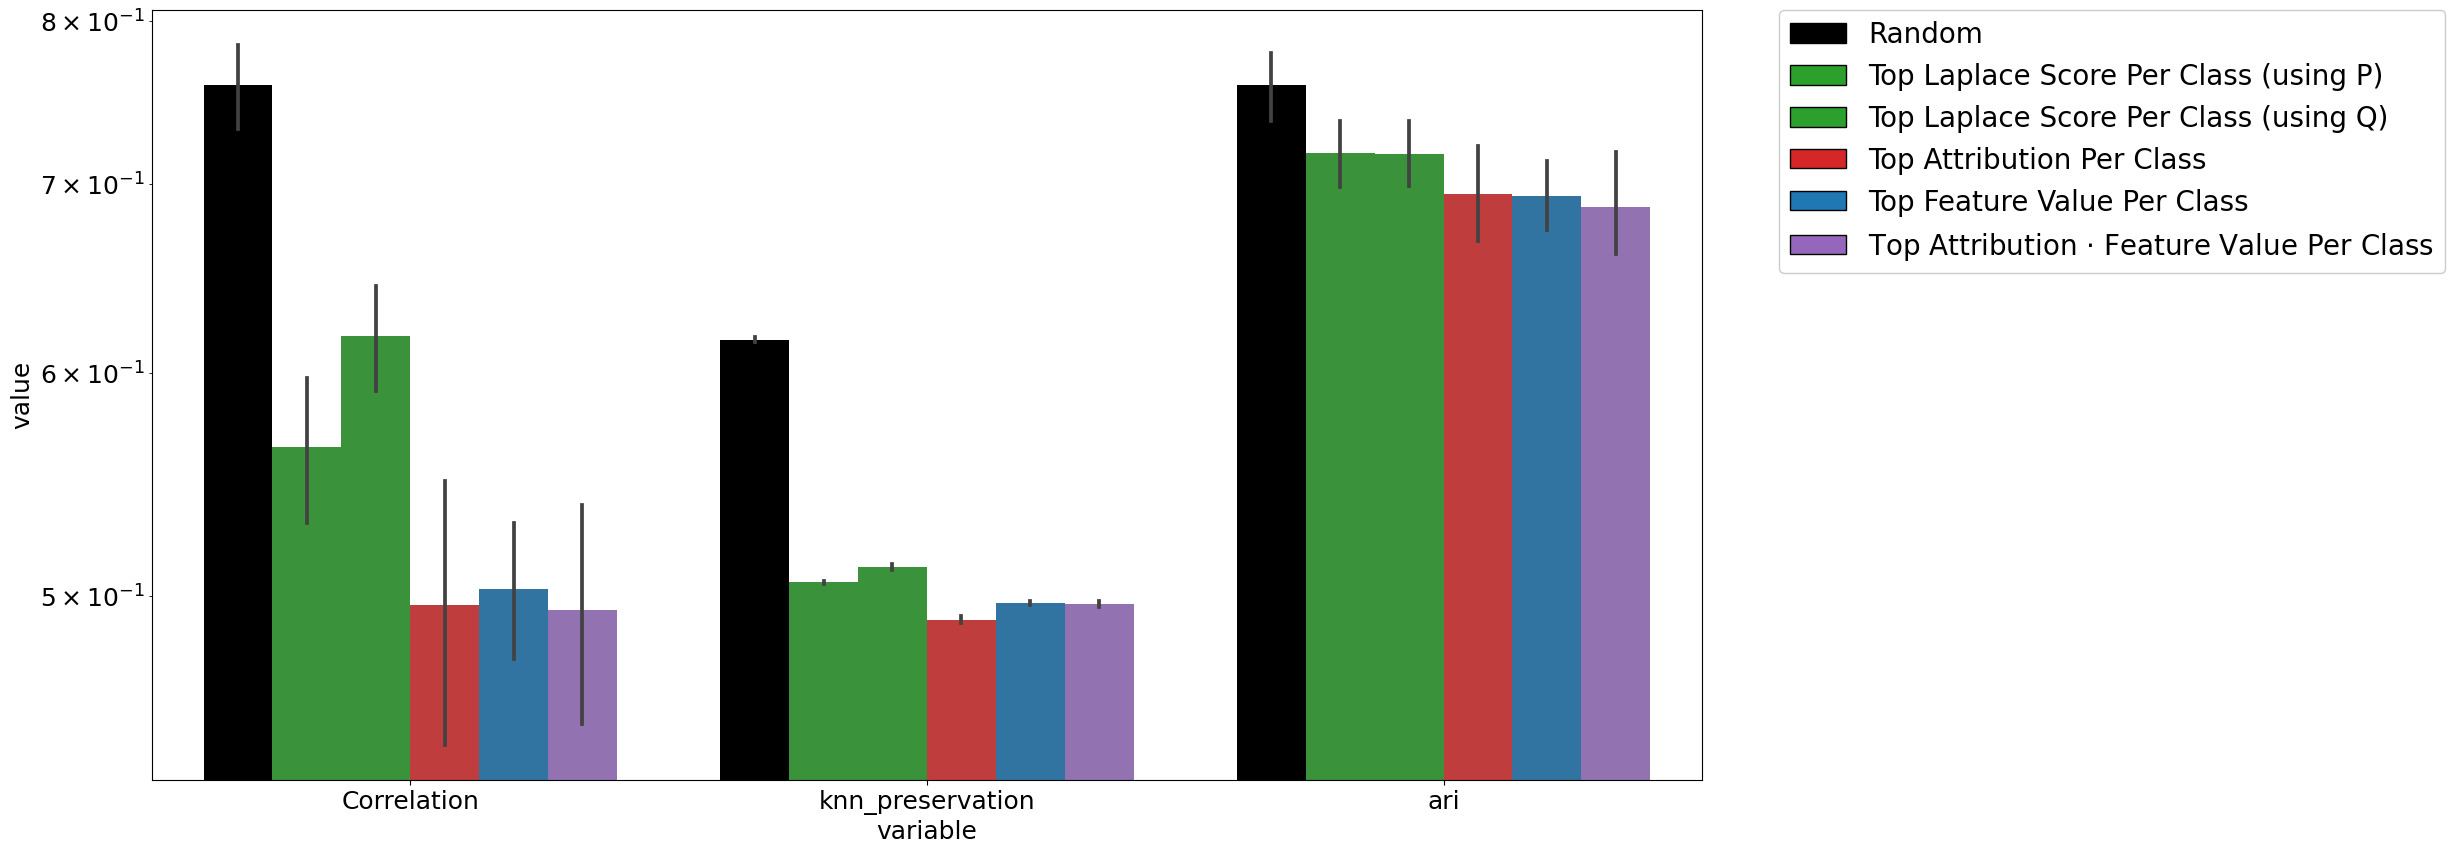

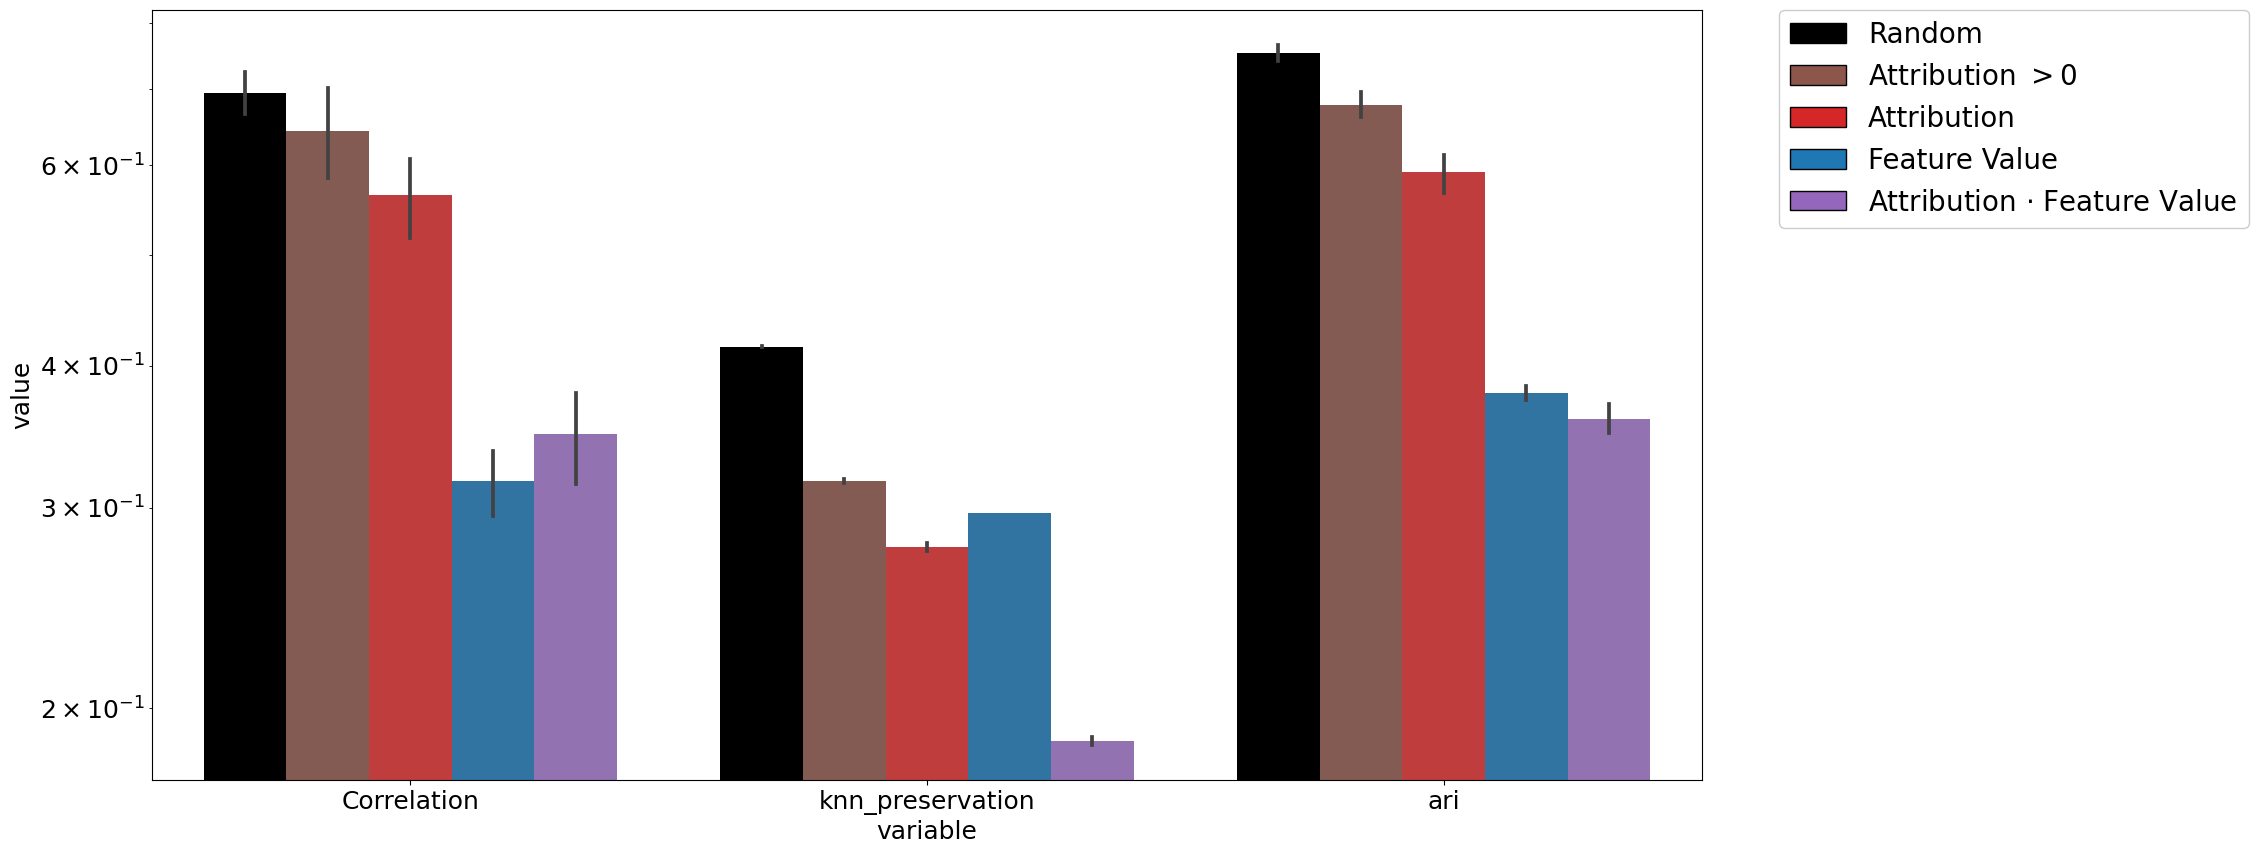

In [23]:
make_barplot(big_df, 'global', 'kl_obj', 'remove')
make_barplot(big_df, 'class', 'kl_obj', 'mean')
make_barplot(big_df, 'individual', 'kl_obj', 'mean')

## Show Table

In [24]:
big_df.index = np.arange(big_df.shape[0])
big_df = big_df.drop_duplicates()


In [25]:
pd.options.display.float_format = '{:.3f}'.format

def make_latex_table(level, method, grad_style):
    tab1 = big_df[(big_df['level']==level) & (big_df['method']==method) & ((big_df['grad_style']==grad_style) | big_df['grad_style'].isnull())][['Index', 'variable', 'value']].pivot_table(values='value', index='Index', columns=['variable'], aggfunc='mean')
    tab2 = big_df[(big_df['level']==level) & (big_df['method']==method) & ((big_df['grad_style']==grad_style) | big_df['grad_style'].isnull())][['Index', 'variable', 'value']].pivot_table(values='value', index='Index', columns=['variable'], aggfunc='std')

    if level == 'class':
        levels_index=['random', 'top_ls_class_p_matrix', 'top_ls_class_q_matrix', 'top_attr_unif_class', 'top_feat_class', 'top_attr_times_feat_unif_class']
        level_names=['Random', 'Top Laplace Score Per Class (using P)', 'Top Laplace Score Per Class (using Q)', 'Top Attribution Per Class', 'Top Feature Value Per Class', 'Top Attribution $\cdot$ Feature Value Per Class']
    elif level == 'global':
        levels_index=['random', 'top_fs', 'top_pc', 'top_ls_p_matrix', 'top_ls_q_matrix', 'top_feat', 'top_attr_unif', 'top_attr_times_feat_unif']
        level_names=['Random', 'Top Fisher Score', 'Top PC', 'Top Laplace Score (Using P)', 'Top Laplace Score (Using Q)', 'Top Feature Value', 'Attribution', 'Attribution $\cdot$ Feature Value'] 
    elif level == 'individual':
        levels_index=['random', 'top_attr_ge_0', 'top_attr', 'feat_size', 'attr_feat']
        level_names=['Random', 'Attribution $>0$', 'Attribution', 'Feature Value', 'Attribution $\cdot$ Feature Value']
    coldict = {'ari': 'Adjusted RAND Index', 'knn_preservation': 'KNN Preservation'}
    inddict = {i:n for i,n in zip(levels_index, level_names)}
    tab1 = tab1.rename(columns=coldict, index=inddict)
    # To get p-values
    #p_vals_df['attr p-val'] = p_vals_df['attr p-val'].apply(lambda x: '$<$ 1e-3' if x < 1e-3 else x)
    #p_vals_df['feat p-val'] = p_vals_df['feat p-val'].apply(lambda x: '$<$ 1e-3' if x < 1e-3 else x)
    tab2 = tab2.rename(columns=coldict, index=inddict)
    ##### reindex or change the order of rows
    tab1 = tab1.reindex(level_names)
    tab2 = tab2.reindex(level_names)

    c1 = tab1['Correlation'].combine(tab2['Correlation'], lambda x, y: '${:.2f} \pm {:.4f}$'.format(x, y))
    c2 = tab1['Adjusted RAND Index'].combine(tab2['Adjusted RAND Index'], lambda x, y: '${:.2f} \pm {:.4f}$'.format(x, y))
    c3 = tab1['KNN Preservation'].combine(tab2['KNN Preservation'], lambda x, y: '${:.2f} \pm {:.4f}$'.format(x, y))
    tab3 = pd.concat([c1, c2, c3], 1)

    #p_vals_df
    print(tab3.to_latex(index=True, escape=False))

In [26]:
make_latex_table('class', 'mean', 'grad_norm')
# "Top Attribution Per Class" seem to be best (outperform all baselines for all metrics except for "Adjusted RAND Index", where it is a very close second)

\begin{tabular}{llll}
\toprule
{} &        Correlation & Adjusted RAND Index &   KNN Preservation \\
Index                                           &                    &                     &                    \\
\midrule
Random                                          &  $0.76 \pm 0.0625$ &   $0.76 \pm 0.0507$ &  $0.62 \pm 0.0029$ \\
Top Laplace Score Per Class (using P)           &  $0.56 \pm 0.0779$ &   $0.72 \pm 0.0475$ &  $0.51 \pm 0.0017$ \\
Top Laplace Score Per Class (using Q)           &  $0.62 \pm 0.0643$ &   $0.72 \pm 0.0444$ &  $0.51 \pm 0.0028$ \\
Top Attribution Per Class                       &  $0.49 \pm 0.0992$ &   $0.69 \pm 0.0435$ &  $0.49 \pm 0.0034$ \\
Top Feature Value Per Class                     &  $0.50 \pm 0.0657$ &   $0.69 \pm 0.0453$ &  $0.50 \pm 0.0019$ \\
Top Attribution $\cdot$ Feature Value Per Class &  $0.52 \pm 0.0589$ &   $0.69 \pm 0.0362$ &  $0.50 \pm 0.0027$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2521997/663488184.py:30: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  tab3 = pd.concat([c1, c2, c3], 1)


In [27]:
make_latex_table('individual', 'mean', 'grad_norm')
# "Attribution $\cdot$ Feature" strongly outperforms all baselines for all metrics except for "Correlation", where it is a distant second

\begin{tabular}{llll}
\toprule
{} &        Correlation & Adjusted RAND Index &   KNN Preservation \\
Index                             &                    &                     &                    \\
\midrule
Random                            &  $0.70 \pm 0.0715$ &   $0.75 \pm 0.0290$ &  $0.42 \pm 0.0017$ \\
Attribution $>0$                  &  $0.58 \pm 0.0772$ &   $0.62 \pm 0.0154$ &  $0.33 \pm 0.0032$ \\
Attribution                       &  $0.55 \pm 0.0587$ &   $0.59 \pm 0.0261$ &  $0.28 \pm 0.0035$ \\
Feature Value                     &  $0.32 \pm 0.0510$ &   $0.38 \pm 0.0129$ &  $0.30 \pm 0.0006$ \\
Attribution $\cdot$ Feature Value &  $0.35 \pm 0.0361$ &   $0.36 \pm 0.0240$ &  $0.20 \pm 0.0024$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2521997/663488184.py:30: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  tab3 = pd.concat([c1, c2, c3], 1)


In [28]:
make_latex_table('global', 'remove', 'grad_norm')
# "Attribution $\cdot$ Feature" outperforms all baselines for "Correlation", in close 3rd for "Adjusted RAND Index" and close 2nd for "KNN Preservation"

\begin{tabular}{llll}
\toprule
{} &        Correlation & Adjusted RAND Index &   KNN Preservation \\
Index                             &                    &                     &                    \\
\midrule
Random                            &  $0.86 \pm 0.0326$ &   $0.81 \pm 0.0458$ &  $0.64 \pm 0.0037$ \\
Top Fisher Score                  &  $0.68 \pm 0.0588$ &   $0.72 \pm 0.0284$ &  $0.54 \pm 0.0026$ \\
Top PC                            &  $0.52 \pm 0.0521$ &   $0.66 \pm 0.0425$ &  $0.50 \pm 0.0020$ \\
Top Laplace Score (Using P)       &  $0.53 \pm 0.0509$ &   $0.68 \pm 0.0408$ &  $0.51 \pm 0.0013$ \\
Top Laplace Score (Using Q)       &  $0.53 \pm 0.0542$ &   $0.68 \pm 0.0386$ &  $0.51 \pm 0.0013$ \\
Top Feature Value                 &  $0.52 \pm 0.0521$ &   $0.66 \pm 0.0425$ &  $0.50 \pm 0.0020$ \\
Attribution                       &  $0.55 \pm 0.0665$ &   $0.67 \pm 0.0434$ &  $0.50 \pm 0.0042$ \\
Attribution $\cdot$ Feature Value &  $0.51 \pm 0.0581$ &   $0.67 \pm 0.0427$ &  $0

/tmp/ipykernel_2521997/663488184.py:30: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  tab3 = pd.concat([c1, c2, c3], 1)


In [29]:
make_latex_table('class', 'permute', 'grad_norm')
# 'Top Attribution $\cdot$ Feature Per Class' outperforms all in 'Correlation' and is second in "Adjusted RAND Index" &  "KNN Preservation"

\begin{tabular}{llll}
\toprule
{} &        Correlation & Adjusted RAND Index &   KNN Preservation \\
Index                                           &                    &                     &                    \\
\midrule
Random                                          &  $0.75 \pm 0.0310$ &   $0.77 \pm 0.0507$ &  $0.47 \pm 0.0018$ \\
Top Laplace Score Per Class (using P)           &  $0.38 \pm 0.0263$ &   $0.44 \pm 0.0350$ &  $0.17 \pm 0.0009$ \\
Top Laplace Score Per Class (using Q)           &  $0.44 \pm 0.0313$ &   $0.52 \pm 0.0413$ &  $0.19 \pm 0.0022$ \\
Top Attribution Per Class                       &  $0.28 \pm 0.0528$ &   $0.42 \pm 0.0346$ &  $0.18 \pm 0.0070$ \\
Top Feature Value Per Class                     &  $0.18 \pm 0.0115$ &   $0.26 \pm 0.0195$ &  $0.13 \pm 0.0010$ \\
Top Attribution $\cdot$ Feature Value Per Class &  $0.17 \pm 0.0301$ &   $0.26 \pm 0.0191$ &  $0.14 \pm 0.0038$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2521997/663488184.py:30: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  tab3 = pd.concat([c1, c2, c3], 1)


In [30]:
make_latex_table('global', 'permute', 'grad_norm')
# 'Top Attribution $\cdot$ Feature Per Class' is 3rd in "Adjusted RAND Index" and "KNN Preservation". It is 5th in "Correlation" (top 4 spots are very close)

\begin{tabular}{llll}
\toprule
{} &        Correlation & Adjusted RAND Index &   KNN Preservation \\
Index                             &                    &                     &                    \\
\midrule
Random                            &  $0.78 \pm 0.0357$ &   $0.78 \pm 0.0483$ &  $0.46 \pm 0.0022$ \\
Top Fisher Score                  &  $0.57 \pm 0.0411$ &   $0.62 \pm 0.0364$ &  $0.24 \pm 0.0016$ \\
Top PC                            &  $0.19 \pm 0.0321$ &   $0.30 \pm 0.0207$ &  $0.14 \pm 0.0014$ \\
Top Laplace Score (Using P)       &  $0.19 \pm 0.0302$ &   $0.31 \pm 0.0240$ &  $0.15 \pm 0.0009$ \\
Top Laplace Score (Using Q)       &  $0.19 \pm 0.0302$ &   $0.31 \pm 0.0240$ &  $0.15 \pm 0.0011$ \\
Top Feature Value                 &  $0.19 \pm 0.0321$ &   $0.30 \pm 0.0207$ &  $0.14 \pm 0.0014$ \\
Attribution                       &  $0.27 \pm 0.0485$ &   $0.35 \pm 0.0401$ &  $0.16 \pm 0.0076$ \\
Attribution $\cdot$ Feature Value &  $0.20 \pm 0.0293$ &   $0.30 \pm 0.0232$ &  $0

/tmp/ipykernel_2521997/663488184.py:30: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  tab3 = pd.concat([c1, c2, c3], 1)


In [31]:
make_latex_table('individual', 'permute', 'grad_norm')
# "Attribution $\cdot$ Feature" is second in all metrics. Top Feature clearly dominates here.

\begin{tabular}{llll}
\toprule
{} &        Correlation & Adjusted RAND Index &   KNN Preservation \\
Index                             &                    &                     &                    \\
\midrule
Random                            &  $0.59 \pm 0.0760$ &   $0.64 \pm 0.0189$ &  $0.33 \pm 0.0011$ \\
Attribution $>0$                  &  $0.46 \pm 0.0535$ &   $0.51 \pm 0.0203$ &  $0.23 \pm 0.0044$ \\
Attribution                       &  $0.42 \pm 0.0457$ &   $0.45 \pm 0.0320$ &  $0.18 \pm 0.0043$ \\
Feature Value                     &  $0.07 \pm 0.0140$ &   $0.08 \pm 0.0026$ &  $0.08 \pm 0.0004$ \\
Attribution $\cdot$ Feature Value &  $0.13 \pm 0.0249$ &   $0.14 \pm 0.0062$ &  $0.08 \pm 0.0006$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_2521997/663488184.py:30: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  tab3 = pd.concat([c1, c2, c3], 1)
